# **Yếu tố ảnh hưởng đến lượng mưa**


1.   **Khí áp**:
  - Các khu áp thấp mưa nhiều, các khu áp cao mưa ít
  - Ở khu khí áp thấp hút gió và tiếp tục đẩy không khí ấm lên cao nên sinh ra mây, mây gặp nhiệt độ thấp sinh ra mưa.
  - Ở các khu khí áp cao, không khí ẩm không bộc lên được, lại chỉ có gió thổi đi, không có gió thổi đến, nên mưa rơi ít hoặc không có mưa.
2.   **Frong**:
  - Miền có frong nhiều nhất là dải hội tụ nhiệt đới đi qua mưa nhiều
3.   **Dòng biển**:
  - Nơi có dòn biển nóng chảy ven bờ mưa nhiều
4.   **Địa hình**:
  - Cùng một dãy núi sườn núi nào đón gió thì mưa nhiều, khuất gió mưa ít, khô
5.   **Gió**:
  - Nếu không có gió từ đại dương thổi vào thì mưa rất ít. Ở đây, mưa chủ yếu là do ngưng kết hơi nước từ ao, hồ, sông,.... bố hơi lên tạo thành mưa.
  - Miền có gió mậu dịch  mưa ít vì gió mậu dịch là gió khô.
  - Miền có gió mùa mưa nhiều.

# **Khí hậu Nước Úc**
Nước úc gồm 6 bang và 2 vùng lãnh thổ mang các đặc trung khí hậu cũng không
có sự khác biệt nhiều. <br>

Tuy diện tích lớn nhưng 80% dân số sống ở các khu vực ven biển với thời tiết ôn hòa dễ chịu. Gần 1\3 nước Úc là khí hậu nhiệt đới và phần còn lại là khu vực khí hậu ôn đới. <br>

Úc cũng là châu lục khô nhất trên trái đất với lượng mưa trung bình hàng năm ít hơn 600 mm. <br>

Thời tiết ở Úc ôn hòa hầu như quanh năm, tuy nhiên khí hậu có thể thay đổi do kích thước rộng lớn của châu lục này.

# **Các muà tại Úc**


*   Mùa Hè: tháng Mười Hai – tháng Hai
*   Mùa Thu: tháng Ba – tháng Năm
*   Mùa Đông: tháng Sáu – tháng Tám
*   Mùa Xuân: tháng Chín – tháng Mười Một
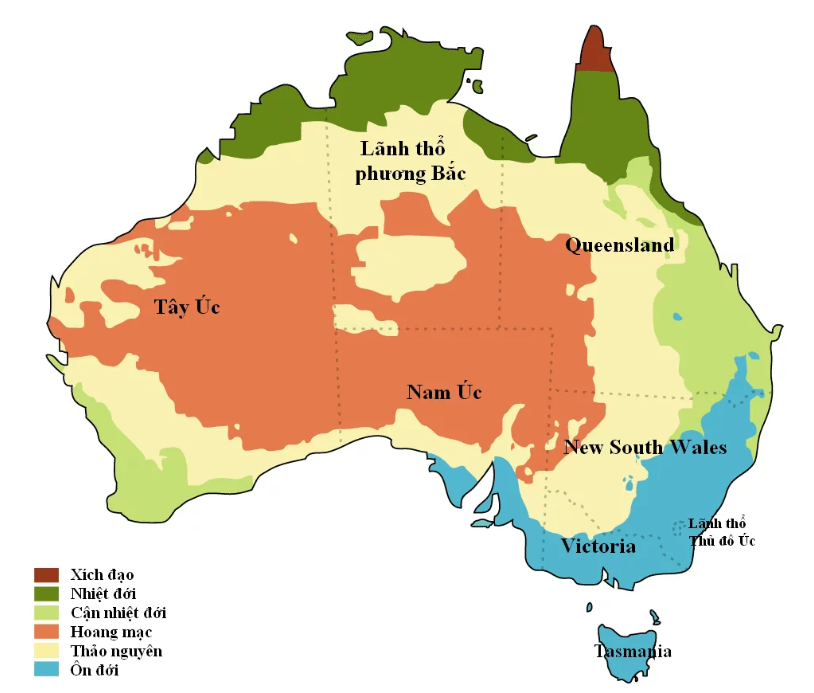

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import calendar

import matplotlib.pyplot as plt
from matplotlib import style
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score,classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, roc_auc_score
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
sns.set_theme()

In [ ]:
df = pd.read_csv('/content/weatherAUS1.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

# **EXPLORATORY DATA**

In [ ]:
# tạo ra 1 bản sao của dữ liệu để khám phá tránh sự sai sót trên tập ban đầu
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null



   **Nhận xét :**

*   Cột "Date" không cần chuyển đổi sang kiểu dữ liệu datetime
*   Có 2 kiểu dữ liệu: object và float64
*   Xuất hiện khá nhiều giá trị null ở nhiều thuộc tính


In [ ]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

**Nhận xét :**


*   Evaporation, Sunshine, Cloud9am, Cloud3pm có giá trị null trên 35%
*   Ngoài Date và Location, tất cả các thuộc tính còn lại đều có giá trị null



In [ ]:
size_before = len(data)
data = data.drop_duplicates()
size_after = len(data)
print(str(size_before - size_after) + " dòng đã xóa")

0 dòng đã xóa


In [ ]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

**Nhận xét :**


*   Nhiều cột có giá trị ngoại lai một cách rõ rệt
*   Không thấy có bất kỳ giá trị nào gây ảnh hưởng tiêu cực đến thuộc tính



In [ ]:
data.describe(include='object')

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [ ]:
#Check unique values for all columns in a DataFrame
for column in df.columns:
     unique_values = data[column].unique()
     print(f"Column '{column}' has {len(unique_values)} unique values:")
     print(unique_values)
     print("\n")

Column 'Date' has 3436 unique values:
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']


Column 'Location' has 49 unique values:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


Column 'MinTemp' has 390 unique values:
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6

In [ ]:
# thống kê top 5 tần suất xuất hiện nhiều nhất của từng columns
for col in data.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(data[col].value_counts(normalize=True).head())



Date
---------------
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
Name: Date, dtype: float64


Location
---------------
Canberra     0.023622
Sydney       0.022989
Darwin       0.021951
Melbourne    0.021951
Brisbane     0.021951
Name: Location, dtype: float64


MinTemp
---------------
11.0    0.006244
10.2    0.006237
9.6     0.006223
10.5    0.006140
9.0     0.006057
Name: MinTemp, dtype: float64


MaxTemp
---------------
20.0    0.006137
19.0    0.005846
19.8    0.005825
20.4    0.005784
19.9    0.005707
Name: MaxTemp, dtype: float64


Rainfall
---------------
0.0    0.640511
0.2    0.061611
0.4    0.026597
0.6    0.018228
0.8    0.014459
Name: Rainfall, dtype: float64


Evaporation
---------------
4.0    0.040390
8.0    0.031559
2.2    0.025342
2.0    0.024580
2.4    0.024229
Name: Evaporation, dtype: float64


Sunshine
---------------
0.0     0.031193
10.7    0.014559
11.0    0.014466
10.8    0.014136
10.5    

**Nhận xét :**


*   Có sự **ngắt kết nối** giữa số lượng giá trị Rainfall và số lượng giá trị RainToday / RainTomorrow. Trong khi khoảng 64% các quan sát có giá trị bằng 0 đối với Rainfall, khoảng 77,5% số ngày không có lượng mưa của RainToday / RainTomorrow. Sự khác biệt này có thể là do sự khác biệt về số lượng giá trị bị thiếu cho mỗi cột

In [ ]:
print(f"Ngày bắt đầu của thuộc tính Date: '{data['Date'].min()}'")
print(f"Ngày kết thúc của thuộc tính Date: '{data['Date'].max()}'")

Ngày bắt đầu của thuộc tính Date: '2007-11-01'
Ngày kết thúc của thuộc tính Date: '2017-06-25'


In [ ]:
values_location = data['Location'].unique()

for locations in values_location:
  date_start = data[data['Location'].values==locations]['Date'].min()
  date_end = data[data['Location'].values==locations]['Date'].max()
  print(f"Ngày bắt đầu khảo sát của ' {locations}': {date_start}")
  print(f"Ngày kết thúc khảo sát của ' {locations}': {date_end}")
  print('\n')

Ngày bắt đầu khảo sát của ' Albury': 2008-12-01
Ngày kết thúc khảo sát của ' Albury': 2017-06-25


Ngày bắt đầu khảo sát của ' BadgerysCreek': 2009-01-01
Ngày kết thúc khảo sát của ' BadgerysCreek': 2017-06-25


Ngày bắt đầu khảo sát của ' Cobar': 2009-01-01
Ngày kết thúc khảo sát của ' Cobar': 2017-06-25


Ngày bắt đầu khảo sát của ' CoffsHarbour': 2009-01-01
Ngày kết thúc khảo sát của ' CoffsHarbour': 2017-06-25


Ngày bắt đầu khảo sát của ' Moree': 2009-01-01
Ngày kết thúc khảo sát của ' Moree': 2017-06-25


Ngày bắt đầu khảo sát của ' Newcastle': 2008-12-01
Ngày kết thúc khảo sát của ' Newcastle': 2017-06-24


Ngày bắt đầu khảo sát của ' NorahHead': 2009-01-01
Ngày kết thúc khảo sát của ' NorahHead': 2017-06-25


Ngày bắt đầu khảo sát của ' NorfolkIsland': 2009-01-01
Ngày kết thúc khảo sát của ' NorfolkIsland': 2017-06-25


Ngày bắt đầu khảo sát của ' Penrith': 2008-12-01
Ngày kết thúc khảo sát của ' Penrith': 2017-06-25


Ngày bắt đầu khảo sát của ' Richmond': 2009-01-01
Ngày kết 

In [ ]:
#Để truy xuất tọa độ chính xác với Nominatim,
#chúng ta cần tên thành phố được viết chính xác
badly_named = {"AliceSprings":"Alice Springs",
               "BadgerysCreek":"Badgerys Creek",
               "CoffsHarbour": "Coffs Harbour",
               "GoldCoast": "Gold Coast",
               "MelbourneAirport": "Melbourne Airport",
               "MountGambier": "Mount Gambier",
               "MountGinini": "Mount Ginini",
               "NorahHead": "Norah Head",
               "NorfolkIsland": "Norfolk Island",
               "PearceRAAF": "Pearce RAAF",
               "PerthAirport": "Perth Airport",
               "SalmonGums": "Salmon Gums",
               "SydneyAirport": "Sydney Airport",
               "WaggaWagga": "Wagga Wagga"}
data["Location"] = data["Location"].apply(lambda x: badly_named[x] if x in badly_named.keys() else x)

In [ ]:
geolocator = Nominatim(user_agent="null")
#
latitude = []
longitude = []
#
for k in data["Location"].unique():
    search_ = k + ", Australia"
    location = geolocator.geocode(search_)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
#
latitude = dict(zip(data["Location"].unique(), latitude))
longitude = dict(zip(data["Location"].unique(), longitude))

In [ ]:
data["longitude"] = data["Location"].map(longitude)
data["latitude"] = data["Location"].map(latitude)

In [ ]:
center_location = [-25.3455545, 131.036961]
m = folium.Map(location=center_location, control_scale=True, zoom_start=4)#, tiles="Stamen terrain")

In [ ]:
heatmap_data = data[['latitude', 'longitude', 'Rainfall']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist()
gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}
HeatMap(data=heatmap_data, radius=15, gradient=gradient, max_zoom=1).add_to(m)
m

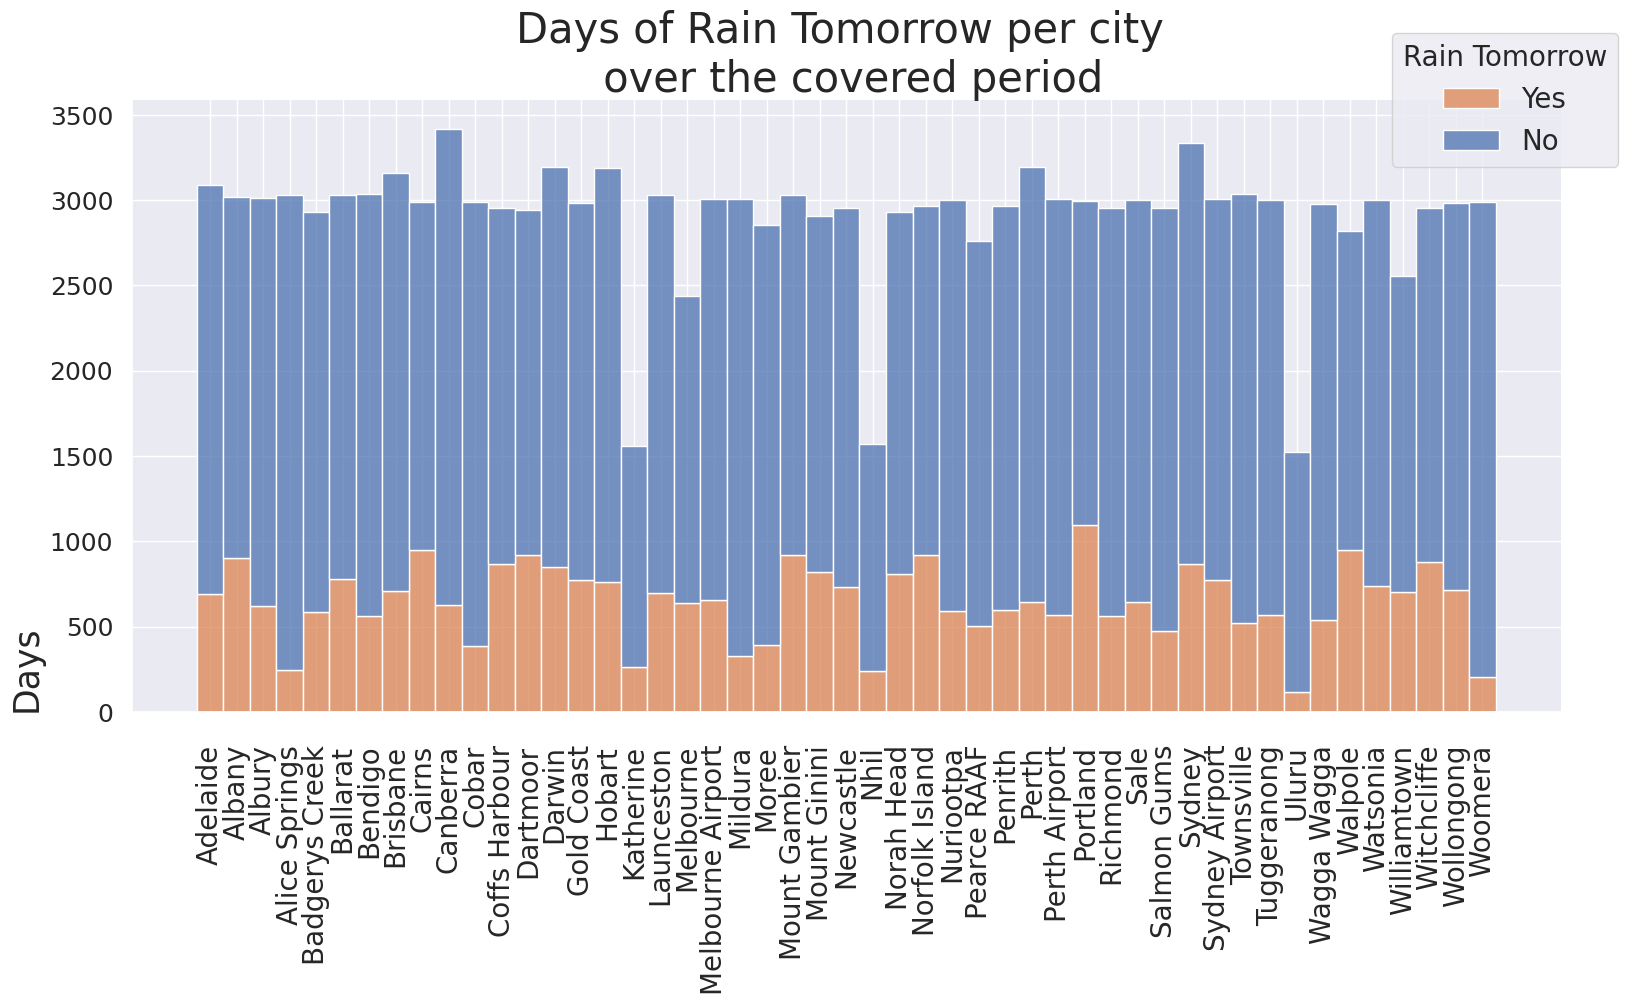

In [ ]:
def barplot_rainTomorrow(df):
    df.sort_values(by="Location", inplace=True)
    ax = sns.displot(data=df,x="Location", hue="RainTomorrow",multiple="stack", aspect=2.2, height=7, legend=False);
    plt.tick_params(axis='y', rotation=0, size=10, labelsize=18)
    plt.xlabel("", fontdict={"fontsize":25})
    plt.ylabel("Days", fontdict={"fontsize":25}, loc="bottom")
    plt.tick_params(axis='x', rotation=90, size=20, labelsize=20, top=False)
    plt.tick_params(axis='y', right=False)
    plt.legend(["Yes","No"], title="Rain Tomorrow", title_fontsize=20, fontsize=20, loc='right', bbox_to_anchor=(1.05, 1));
    plt.title("Days of Rain Tomorrow per city \n over the covered period", fontsize=30);

barplot_rainTomorrow(data)

**Nhận xét :**


*   Có tới 49 vùng được khảo sát trên toàn bộ nước úc.
*   49 vùng này có ngày bắt đầu khảo sát không giống nhau.



In [ ]:
data.RainToday = data.RainToday.map({'No': 0, 'Yes': 1})
data.RainTomorrow = data.RainTomorrow.map({'No': 0, 'Yes': 1})

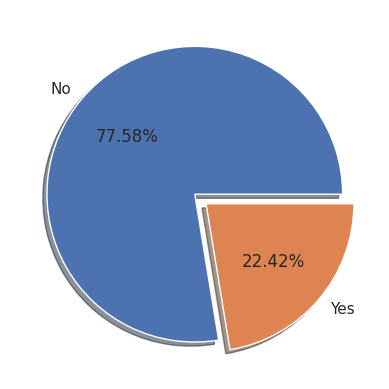

In [ ]:
sizes = [data.RainTomorrow[data['RainTomorrow']==0].count(),data.RainTomorrow[data['RainTomorrow']==1].count()]
labels = ['No', 'Yes']
plt.pie(sizes, labels = labels, explode = (0,0.1), shadow=True, autopct='%.2f%%')
plt.show()

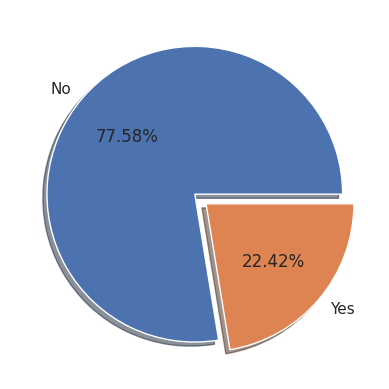

In [ ]:
sizes = [data.RainToday[data['RainToday']==0].count(),data.RainToday[data['RainToday']==1].count()]
labels = ['No', 'Yes']
plt.pie(sizes, labels = labels, explode = (0,0.1), shadow=True, autopct='%.2f%%')
plt.show()

In [ ]:
import plotly.express as px
def create_custom_bar_plot(df, x, y, color1, color2):
    # Calculate percentages
    percentages = (
        df.groupby([x, y])[y]
        .count()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
        .reset_index(name='Percentage')
    )

    # Generate the title
    title = f'{x} vs. {y}'

    # Create the bar plot
    fig = px.bar(
        percentages,
        x=x,
        y='Percentage',
        color=y,
        title=title,
        labels={'Percentage': 'Percentage of Total'},
        color_discrete_sequence=[color1, color2],  # Custom colors
    )

    # Update the layout
    fig.update_xaxes(categoryorder='array')  # Sort x-axis categories by percentage
    fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')
    fig.update_layout(
    title_font=dict(size=18),
    legend_title=dict(text=y),
    legend_font=dict(size=12),
    legend=dict(orientation='h', x=0.5, y=1.15))
    # Show the plot
    fig.show()


In [ ]:
create_custom_bar_plot(data, 'RainToday', 'RainTomorrow',  '#08306B', '#98F5FF')

<ipython-input-141-ae450b01a9b7>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



**Nhận xét :**
- Nhìn 2 biểu tròn, cho ta thấy số lượng No và Yes của từng biến RainTomorrow và RainToday là như sau.<br>
- Mặc dù như vậy nhưng nhìn vào biểu đồ cột thì không thể nội suy từ biến RainToday để điền giá trị null cho biến RainTomorrow<br>
- Ngày hôm nay không có mưa thì ngày mai khoảng 84.81% sẽ không mưa.
- Ngày hôm nay có mưa thì ngày mai khoảng 53.59% sẽ không mưa.

**Visualazition**

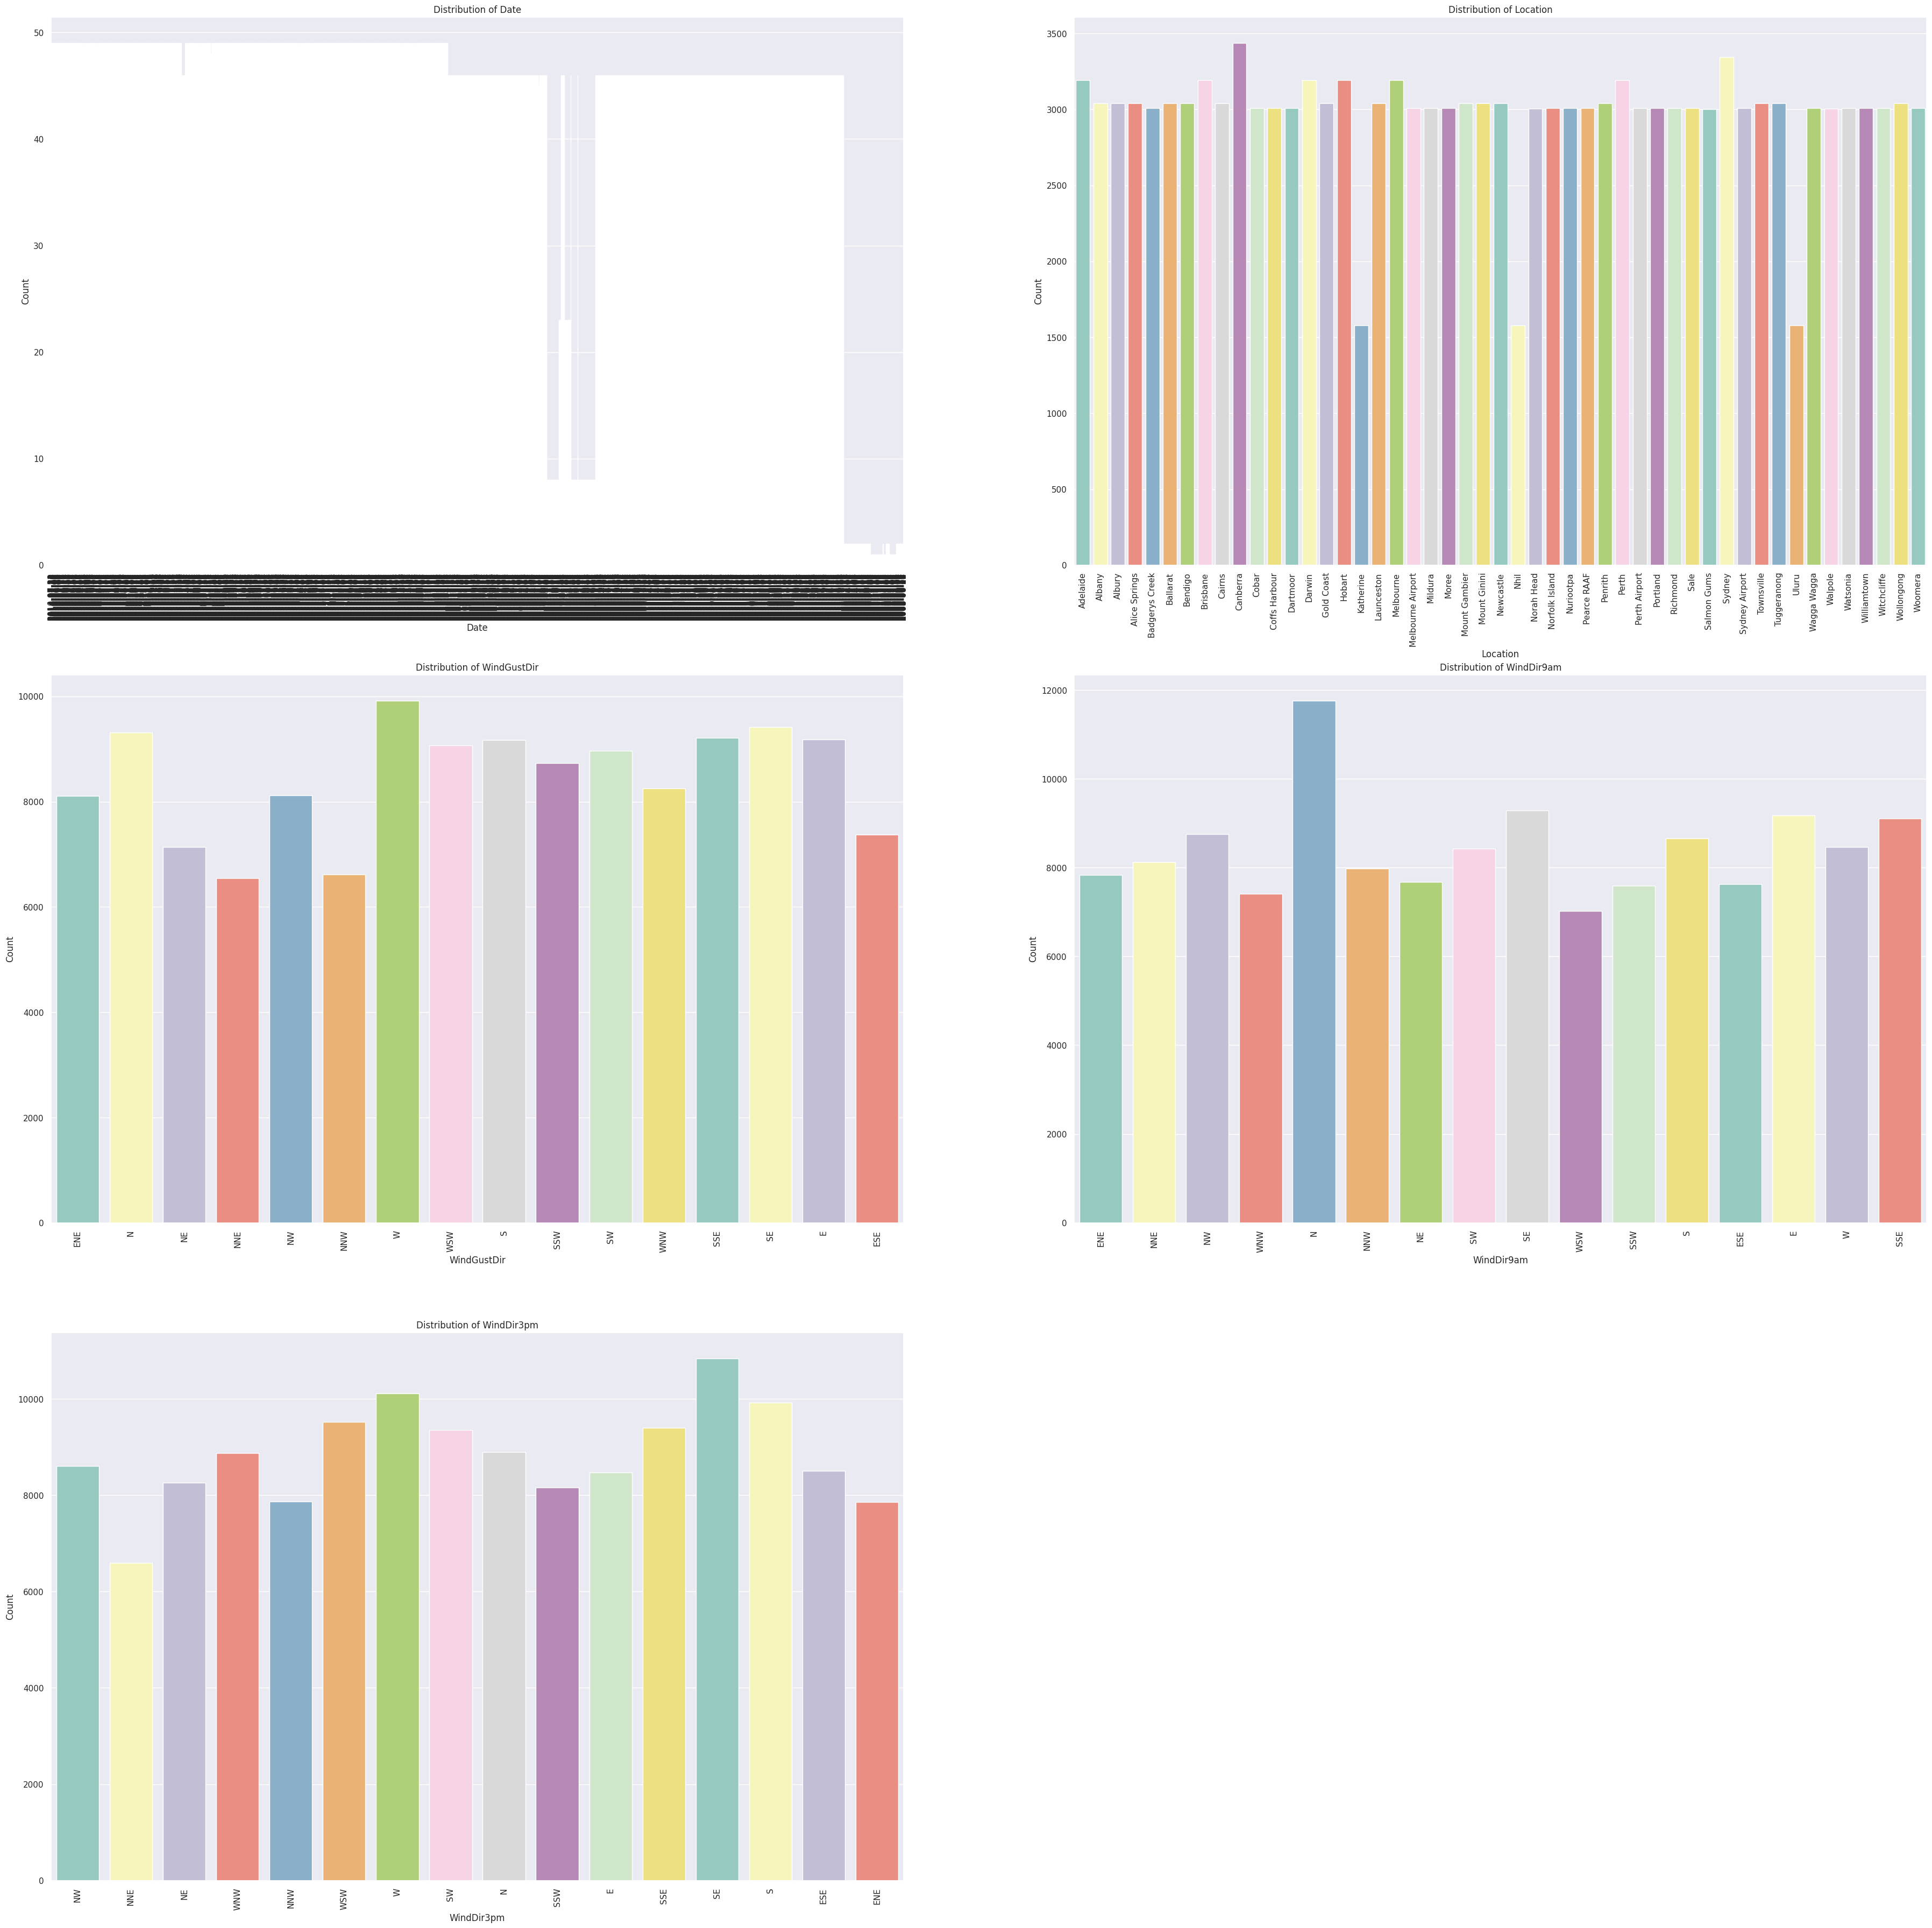

In [ ]:
categorical_attributes = data.select_dtypes(include=['object']).columns
num_rows_cat = (len(categorical_attributes) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(45, 15 * num_rows_cat))
for i, attr in enumerate(categorical_attributes):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.countplot(data=data, x=attr, palette='Set3')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')
    plt.xticks(rotation=90)

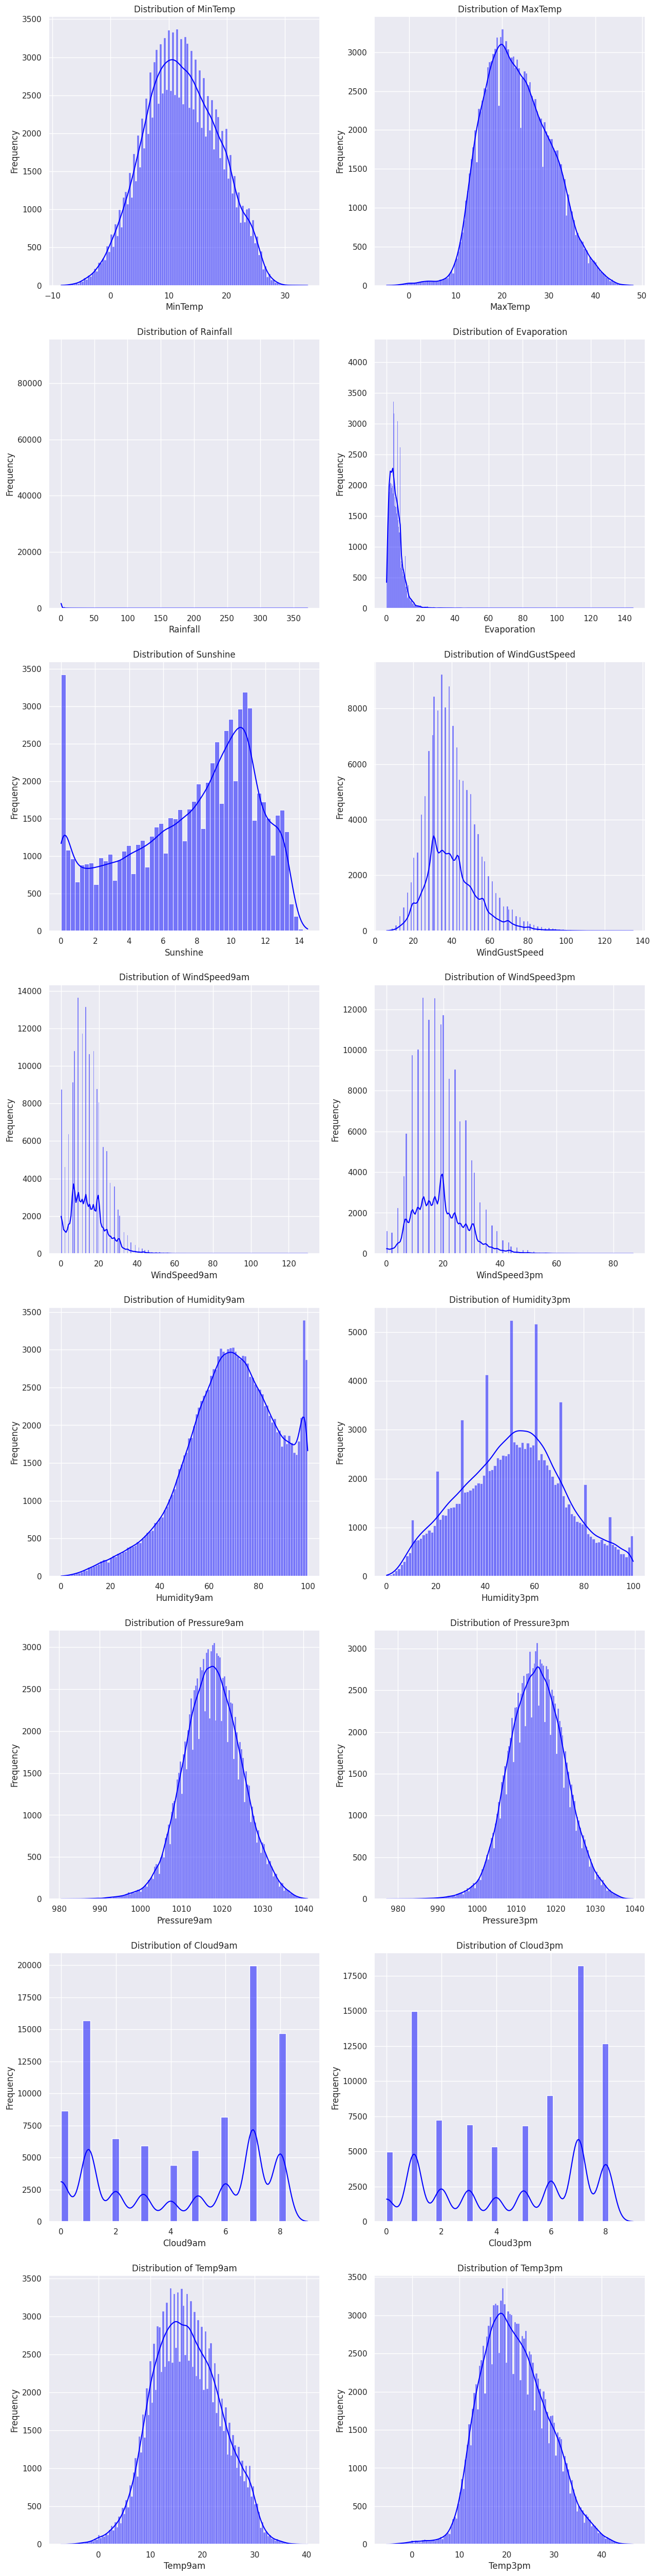

In [ ]:
#The distribution of both numerical and categorical attributes
# Get the list of numerical attributes
numerical_attributes = df.select_dtypes(include=['number']).columns
num_rows_num = (len(numerical_attributes) - 1) // 2 + 1

# Create subplots for numerical attributes
plt.figure(figsize=(15, 8 * num_rows_num))
for i, attr in enumerate(numerical_attributes):
    plt.subplot(num_rows_num, 2, i + 1)
    sns.histplot(df[attr], kde=True, color='blue')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attr}')

**Nhận xét :**



*   Hầu hết các thuộc tính đều phân phối chuẩn như mong đợi
*   Sự phân bộ của Rainfall cần được xem xét vì sự ngoại lai khá nhiều và rõ rệt.
*   Sự phân bố của SunSshine rất thú vị:
  * Tần suất xuất hiện của giá trị 0 cao hơn đều đó có nghĩa là có nhiều ngày bị mây che mờ
  * Sự suy giảm đột ngột các giá trị sau 11 giờ là sự hạn chế của những ngày trong năm.
* Sự phân bố của Humidity9am có sự chuyển biến mạnh mẽ, tăng đột ngột 100%

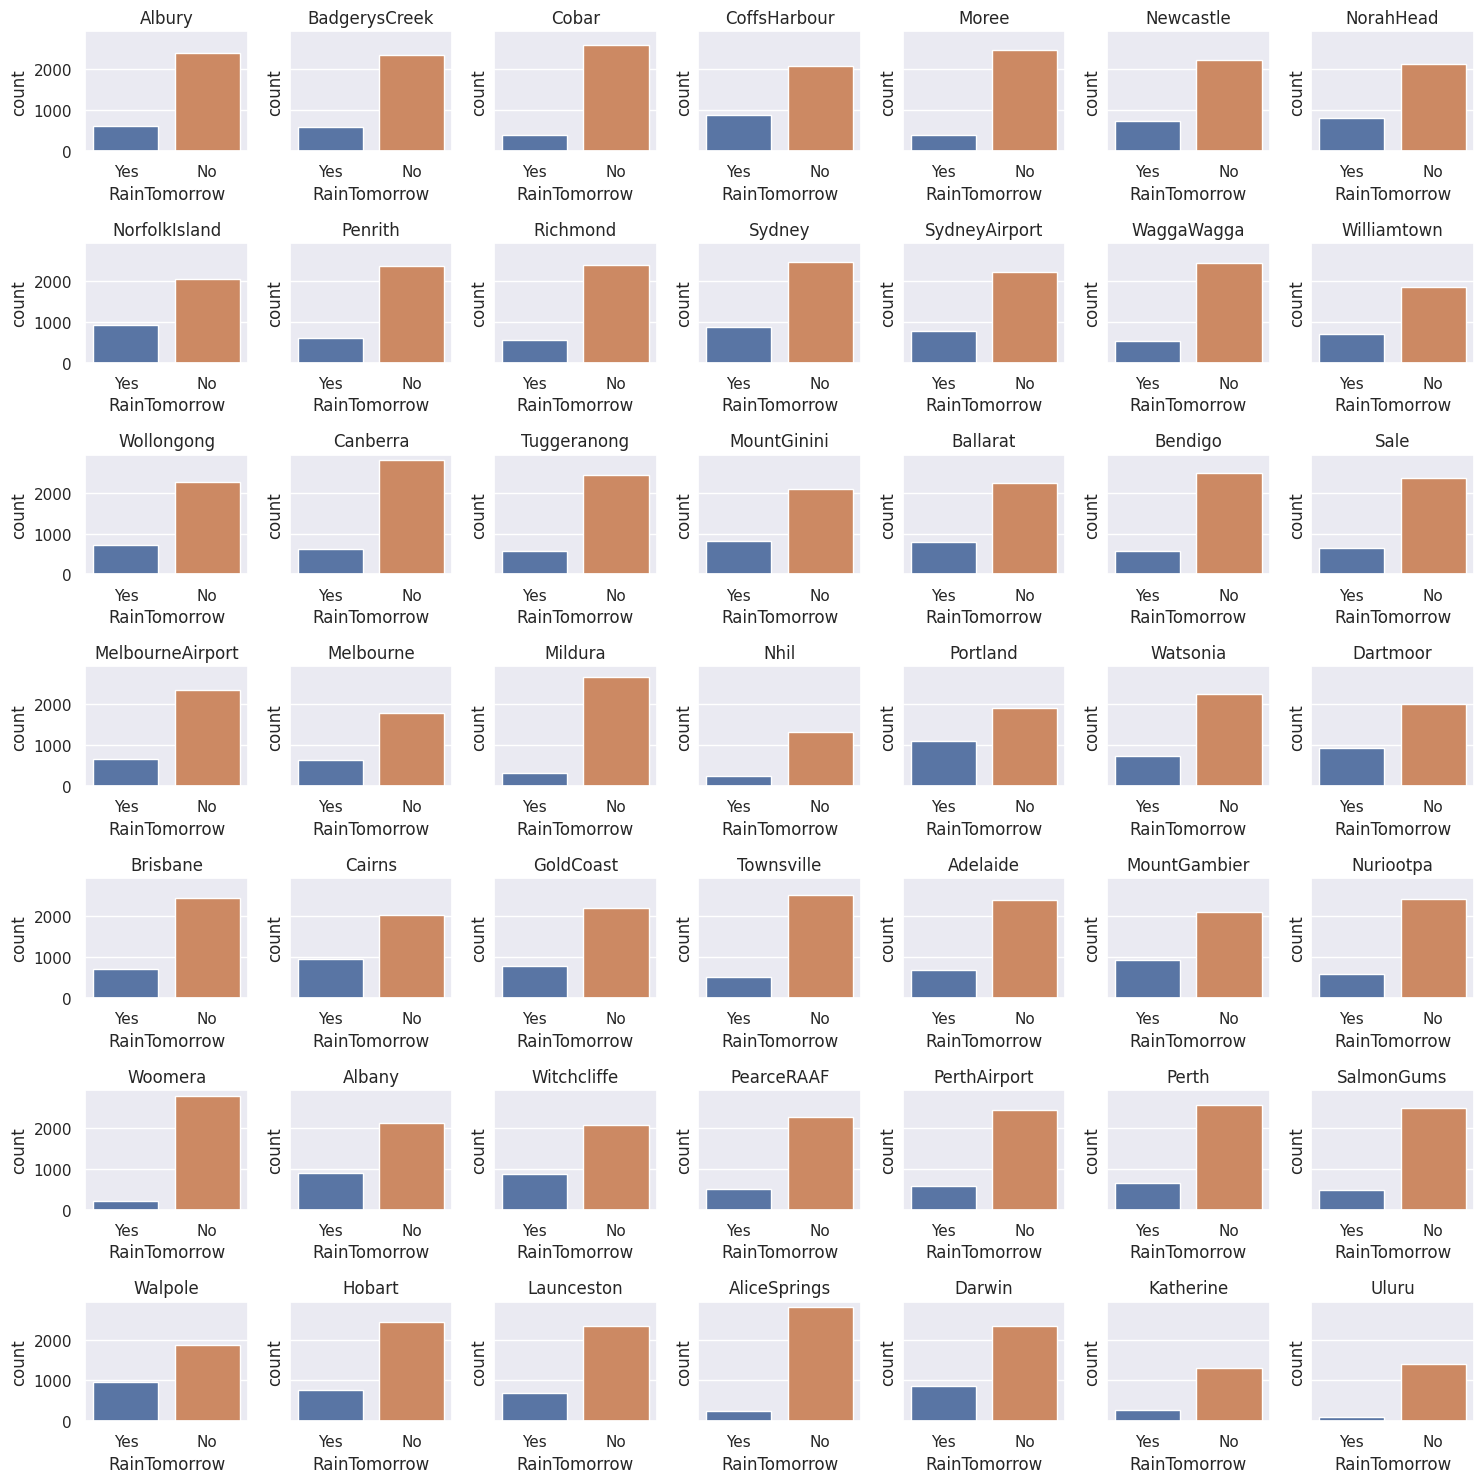

In [ ]:
# Class imbalance by location
locations = df.Location.unique()
fig,ax = plt.subplots(7,7, figsize=(15,15),sharey=True,tight_layout=True)
ax_flat = ax.flatten()
i = 0
for location in locations:
    sns.countplot(data = df[df.Location == location], x = 'RainTomorrow', order = ['Yes','No'], ax=ax_flat[i])
    ax_flat[i].set_title(location)
    i = i + 1

In [ ]:
# Tạo một dataframe mới để lưu trữ kết quả sau khi loại bỏ outlier
df_cleaned = df.copy()

# Lặp qua từng vùng
for location in df['Location'].unique():
    # Tạo một subset chỉ chứa dữ liệu của vùng hiện tại và RainToday là "No"
    subset = df[(df['Location'] == location) & (df['RainToday'] == 'No')]

    # Xác định ngưỡng trên và ngưỡng dưới
    Q1 = subset['Rainfall'].quantile(0.25)
    Q3 = subset['Rainfall'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Loại bỏ các giá trị ngoại lệ trong subset
    subset_cleaned = subset[(subset['Rainfall'] >= lower_bound) & (subset['Rainfall'] <= upper_bound)]

    # Cập nhật dữ liệu trong dataframe gốc
    df_cleaned.loc[(df_cleaned['Location'] == location) & (df_cleaned['RainToday'] == 'No'), 'Rainfall'] = subset_cleaned['Rainfall']

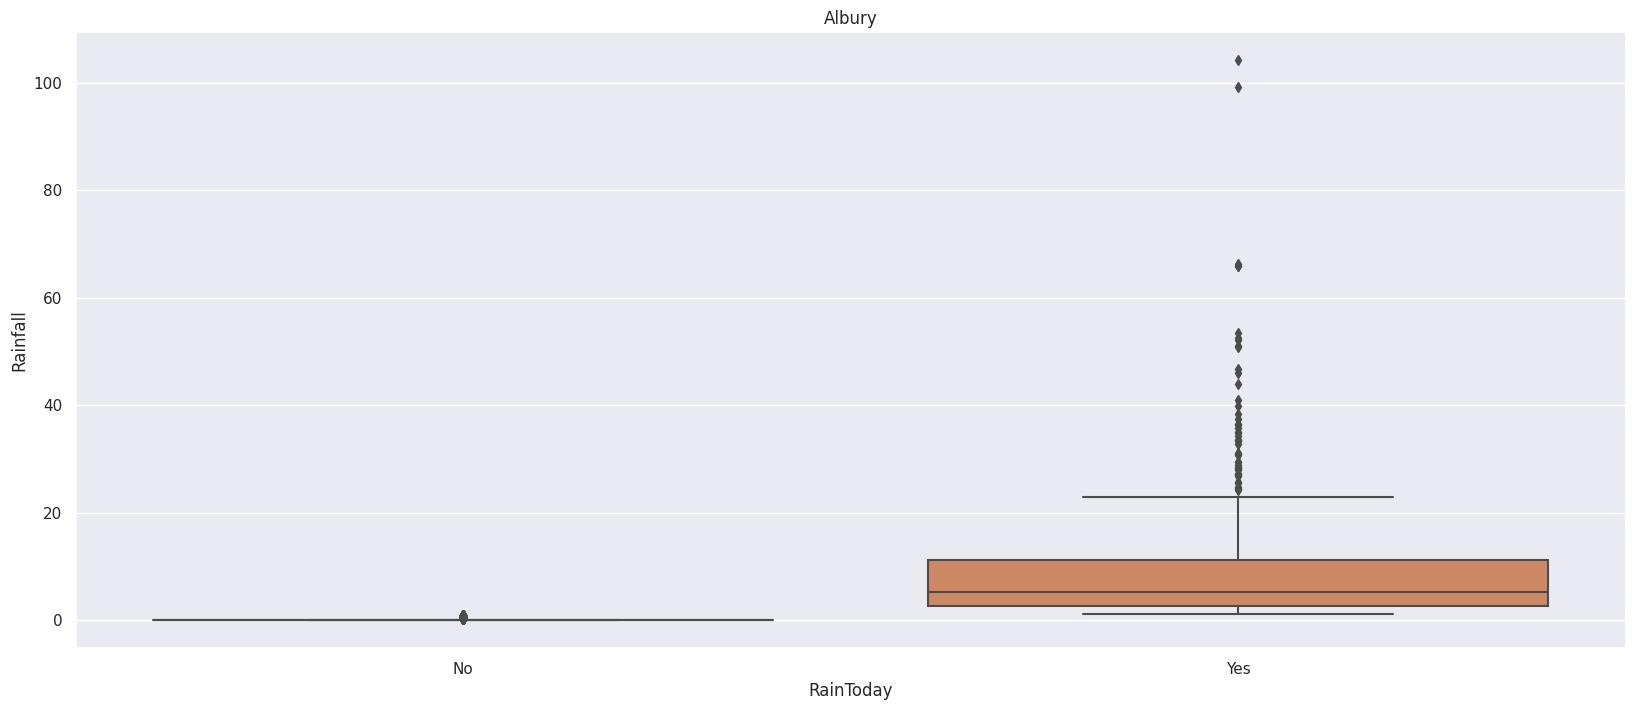

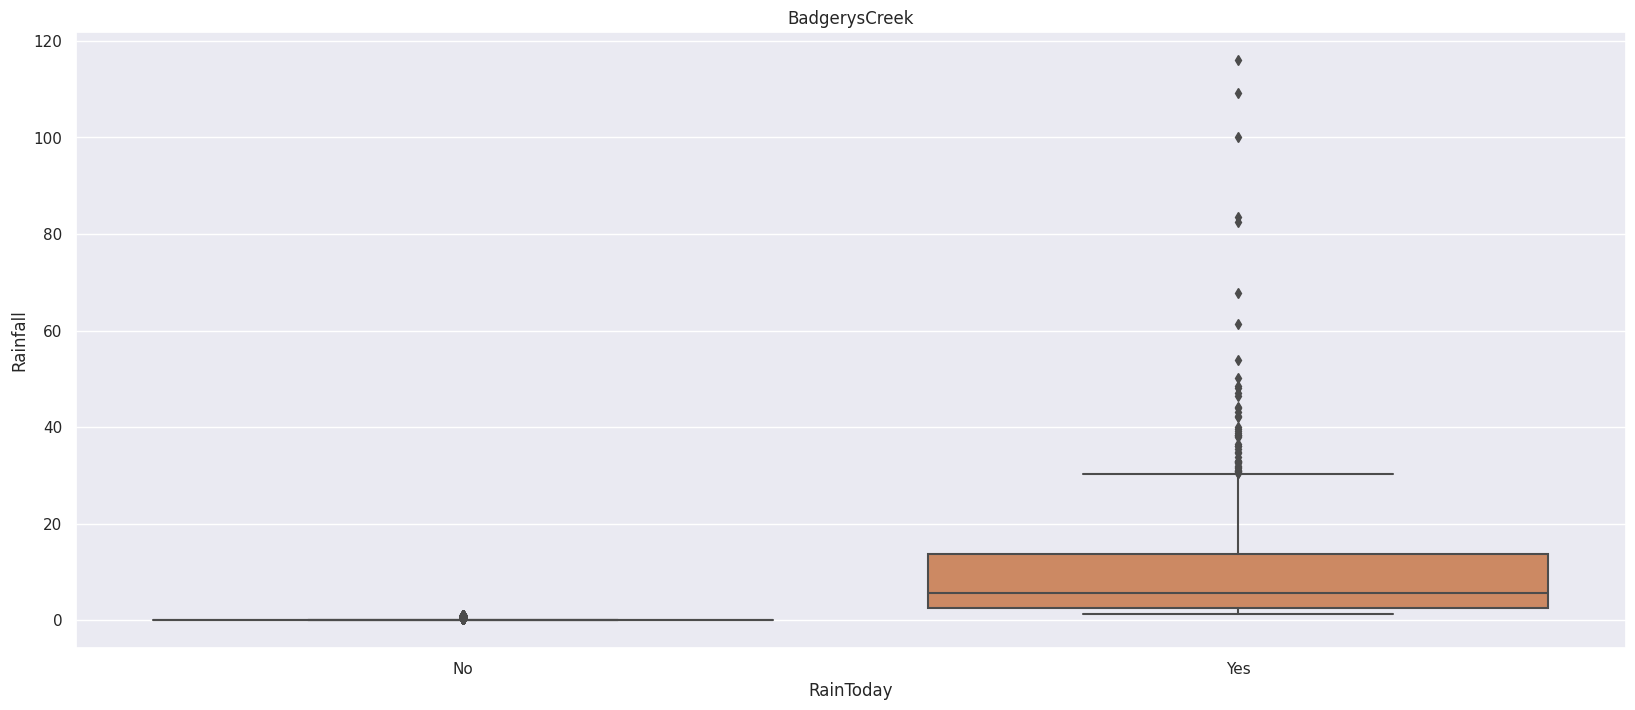

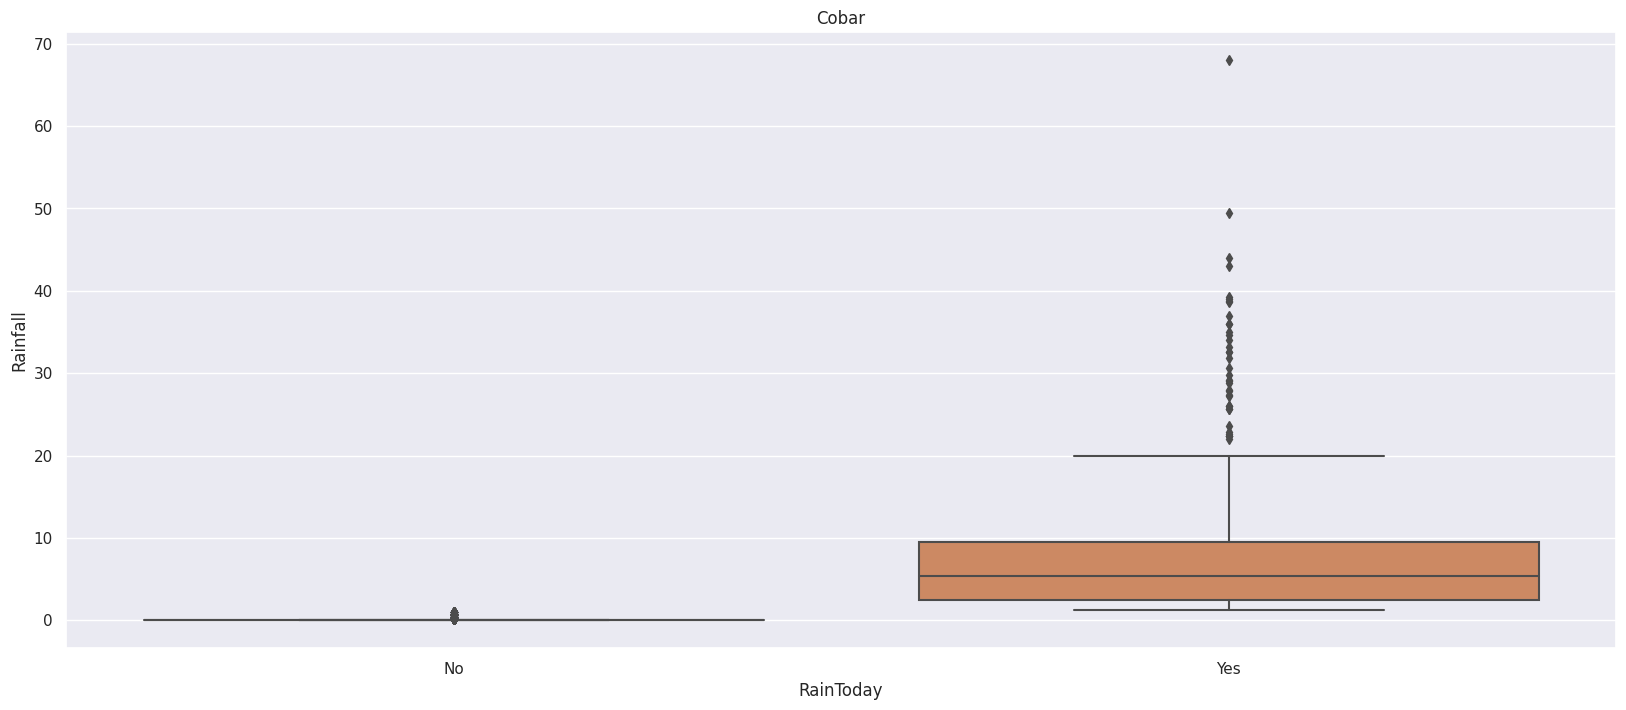

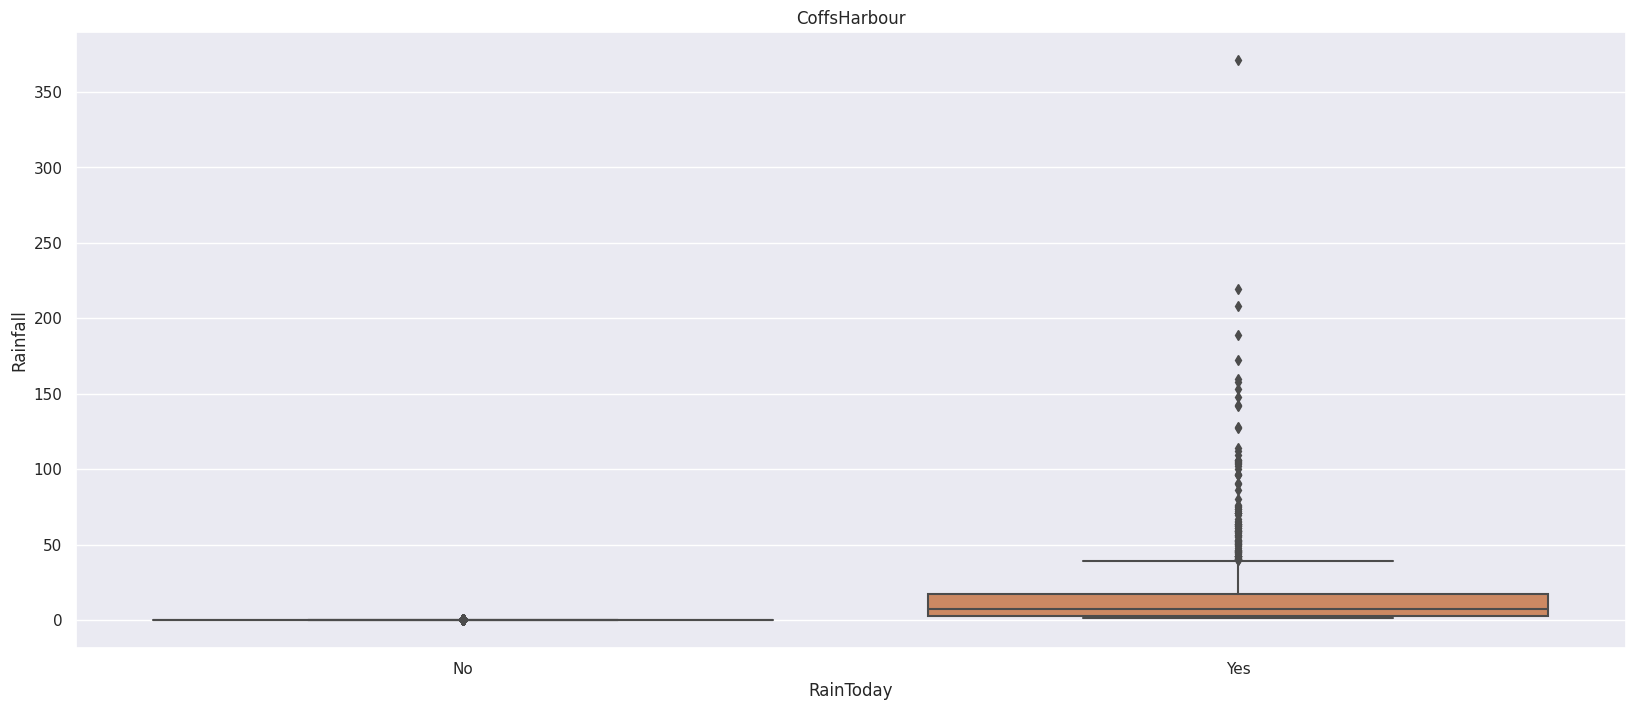

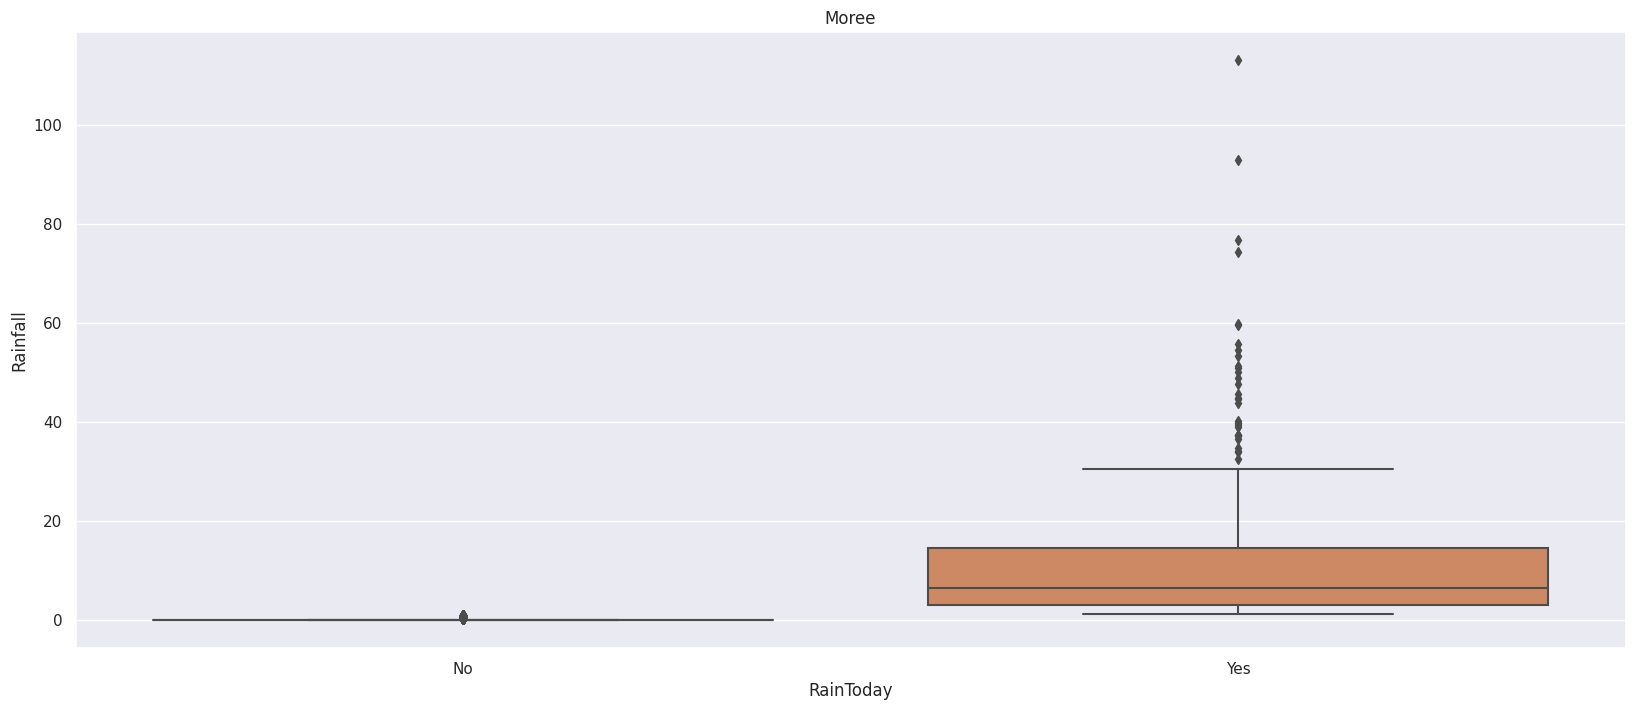

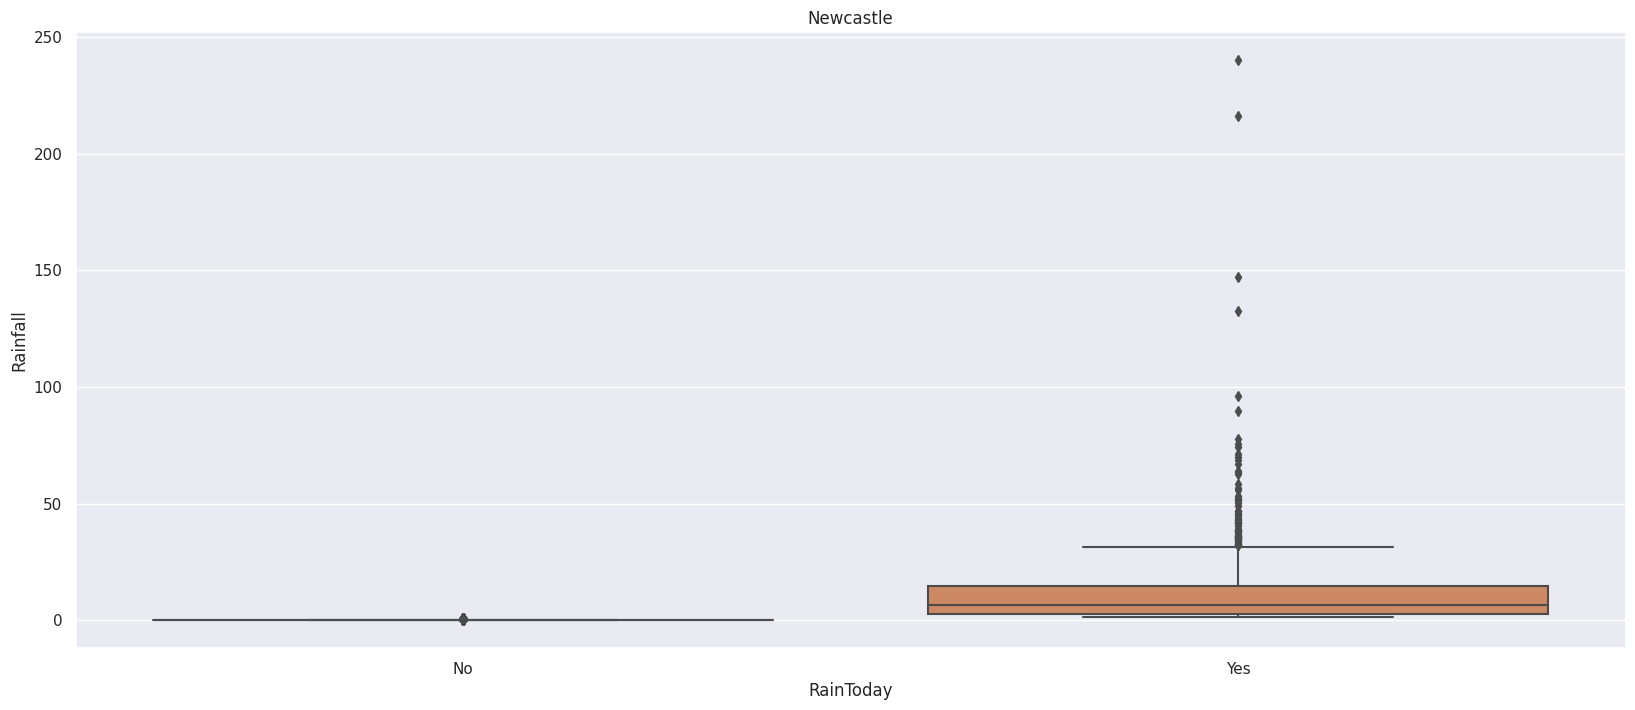

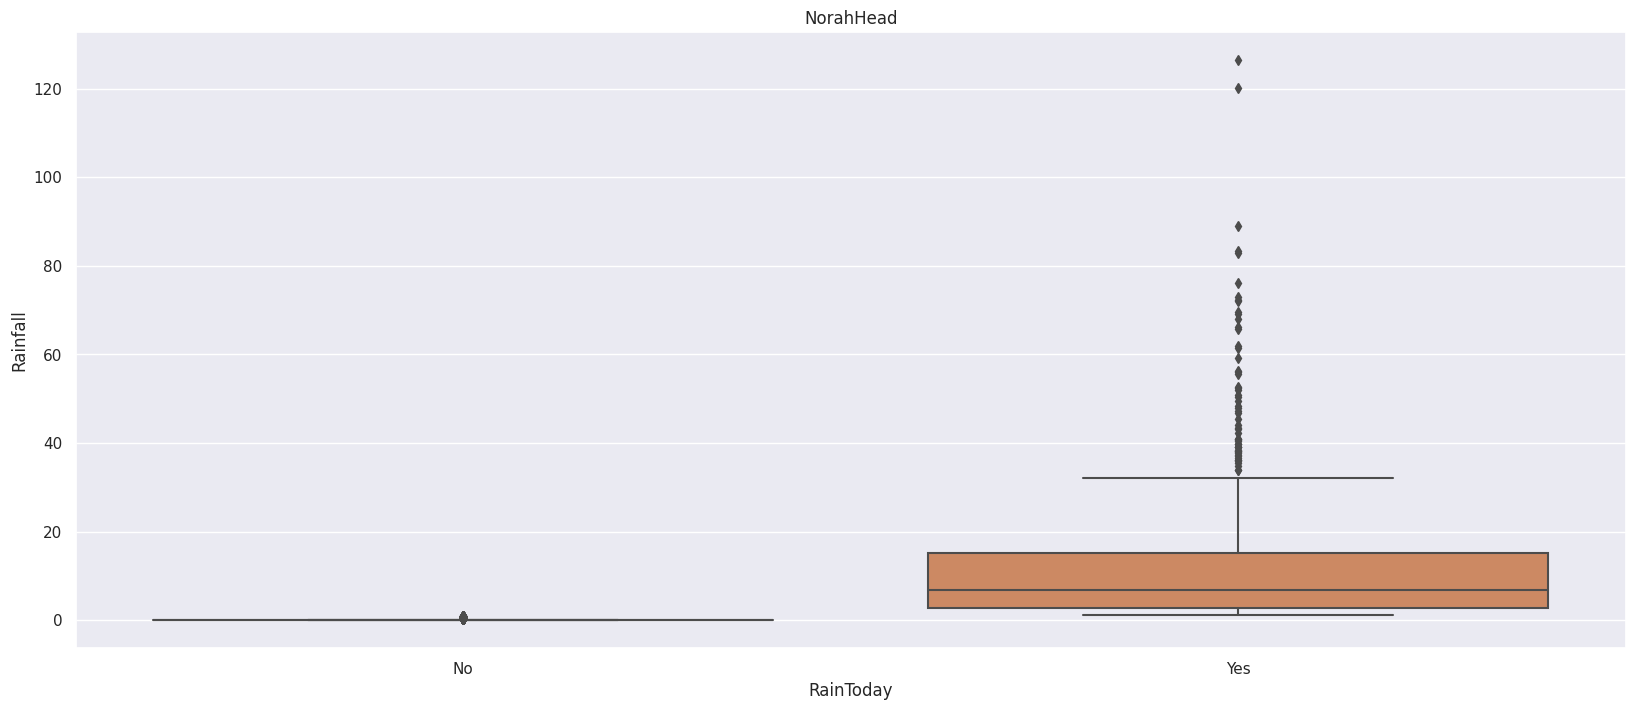

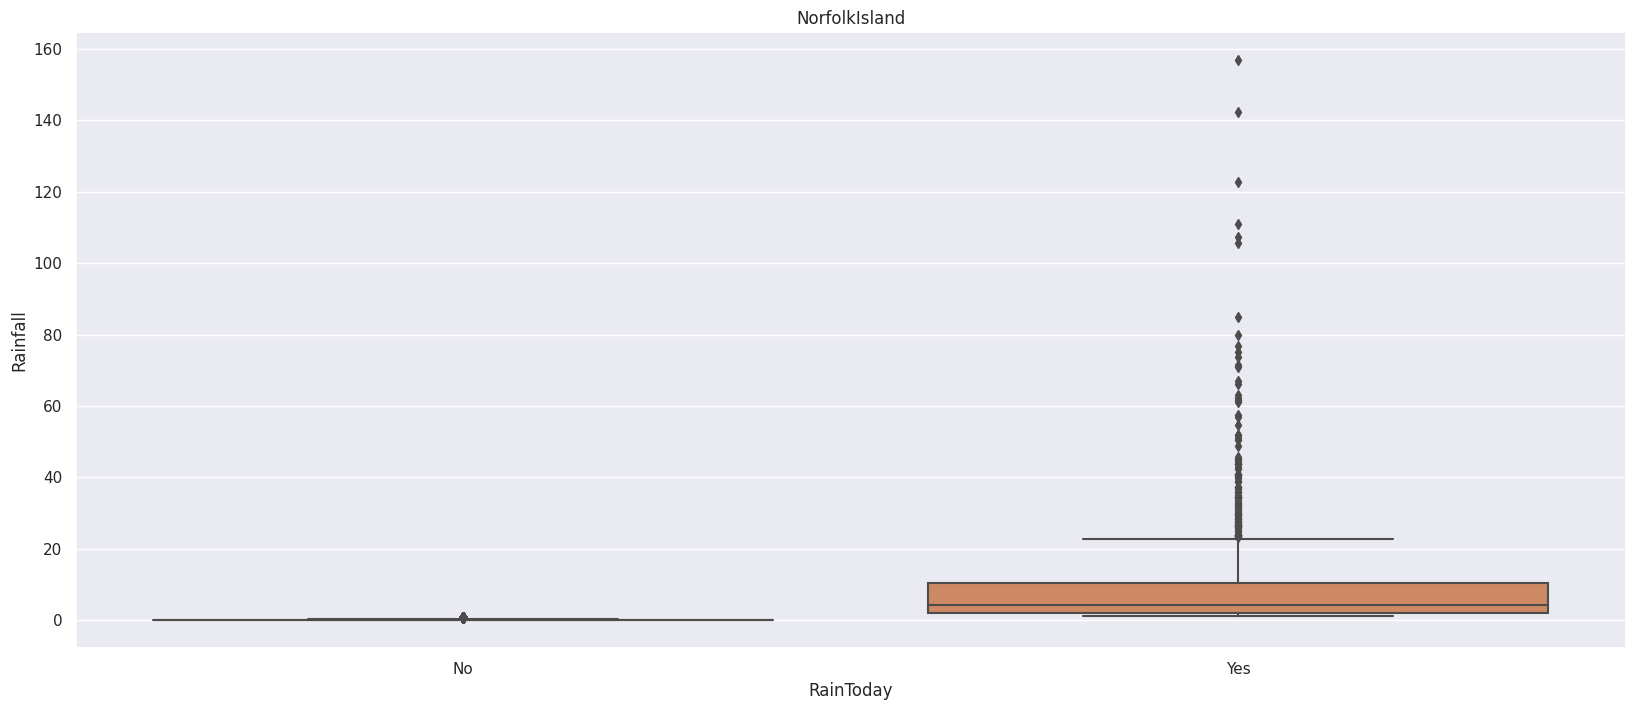

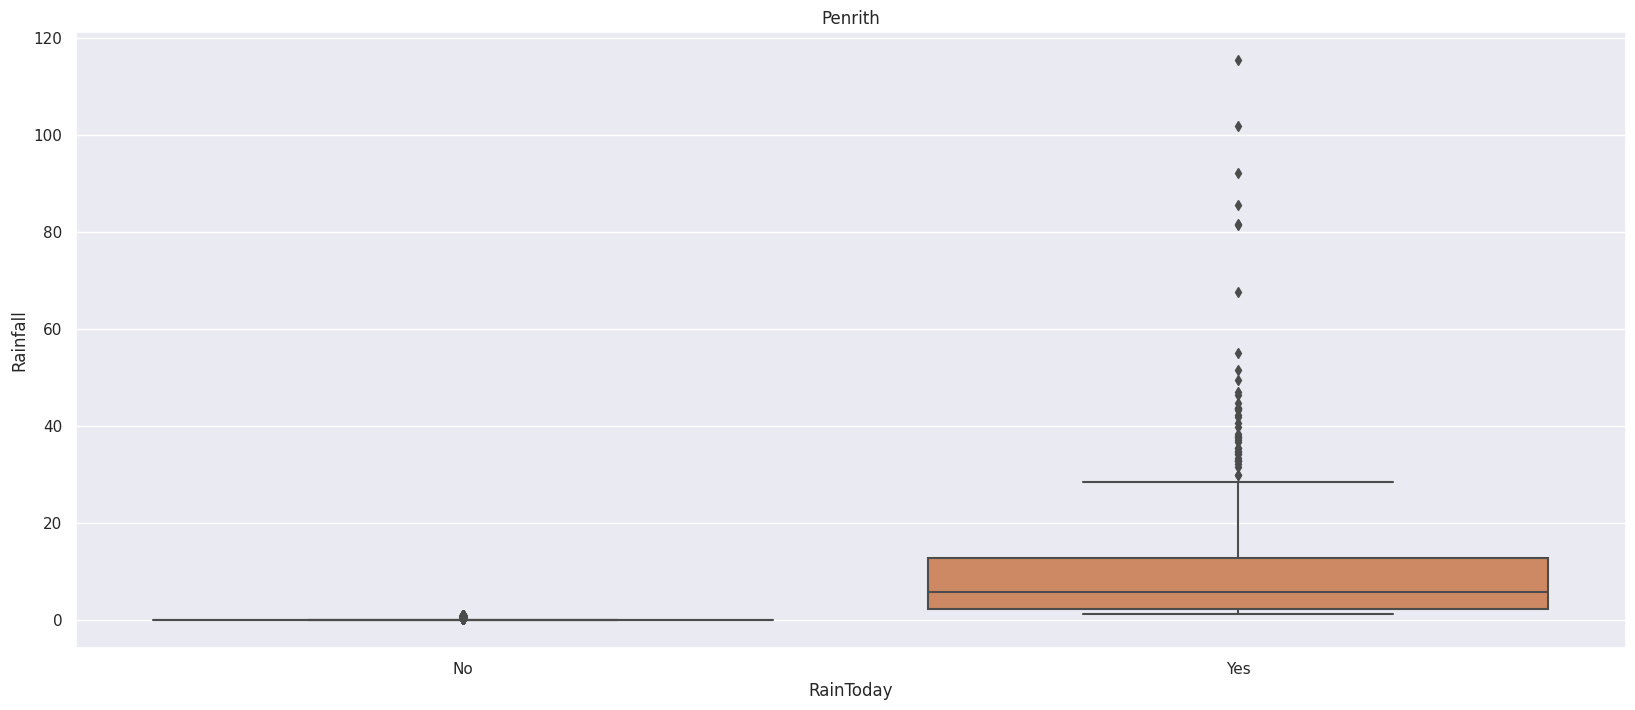

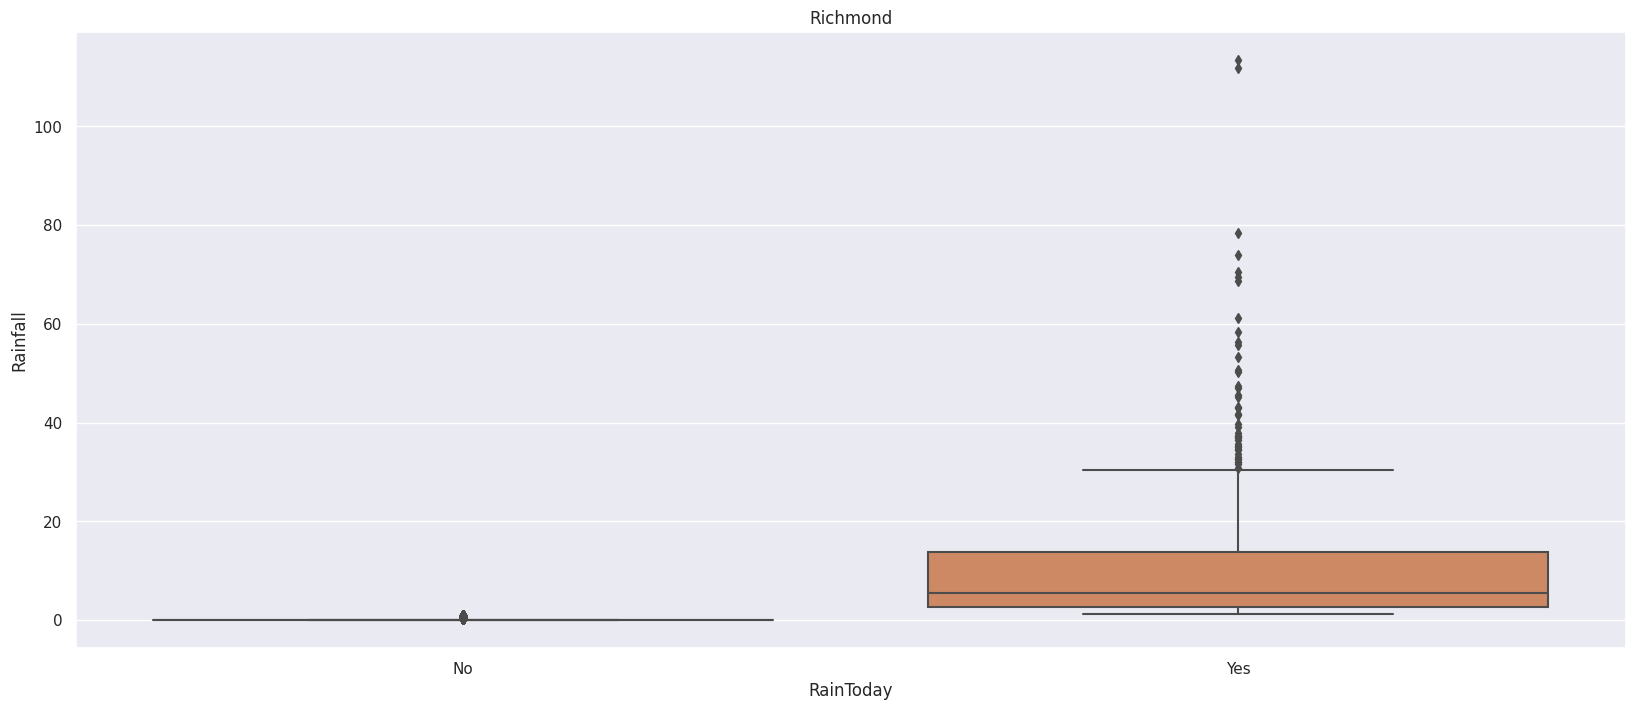

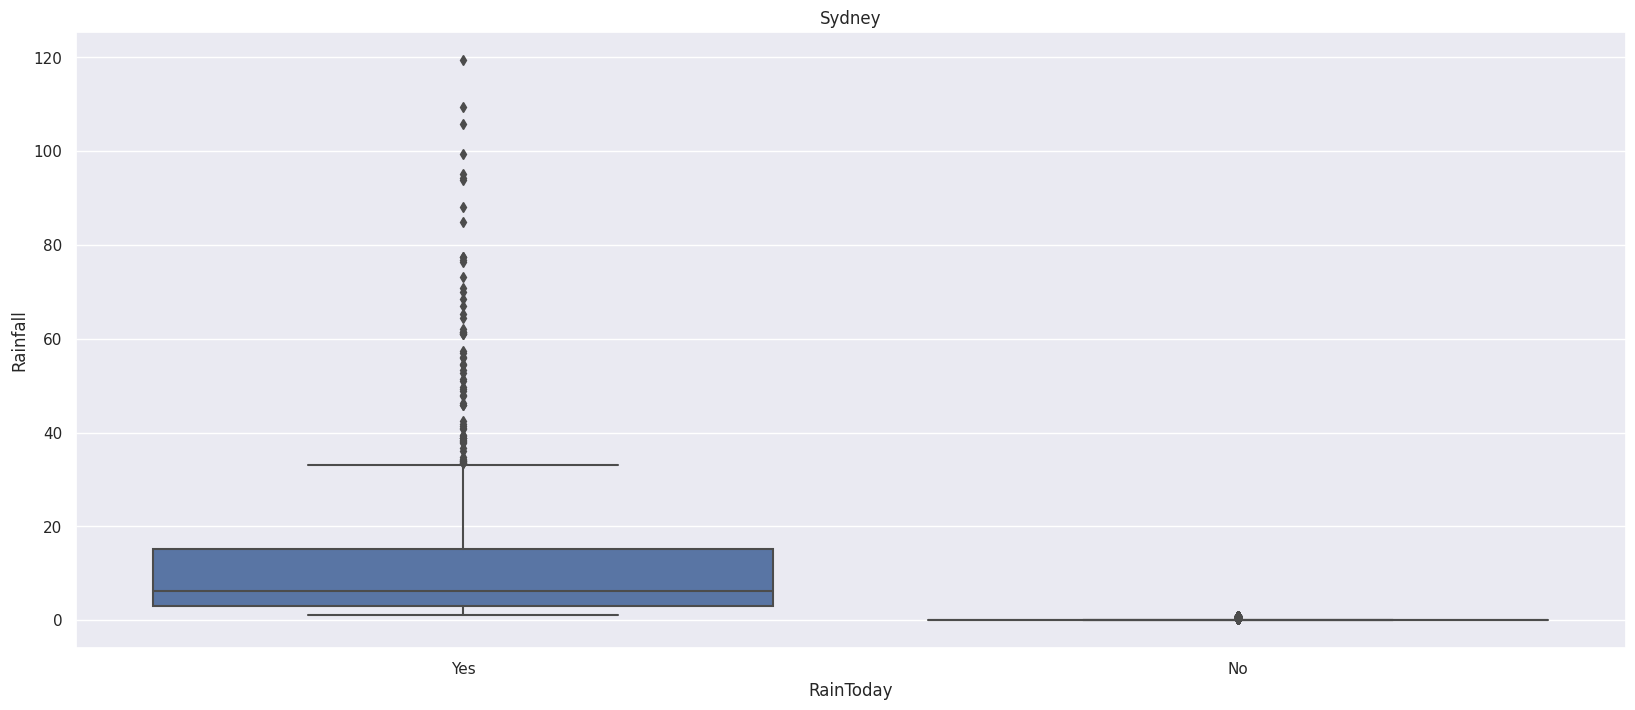

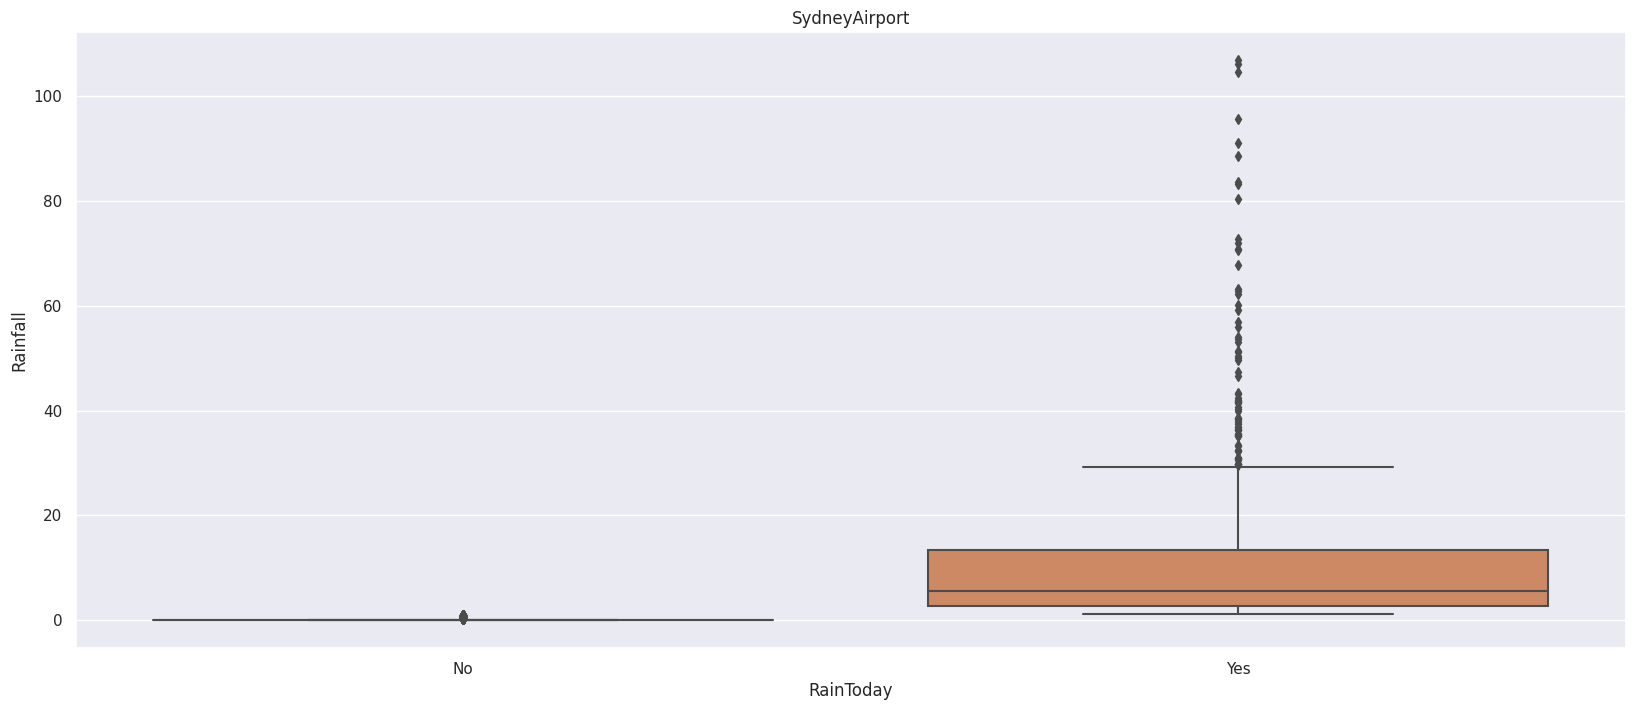

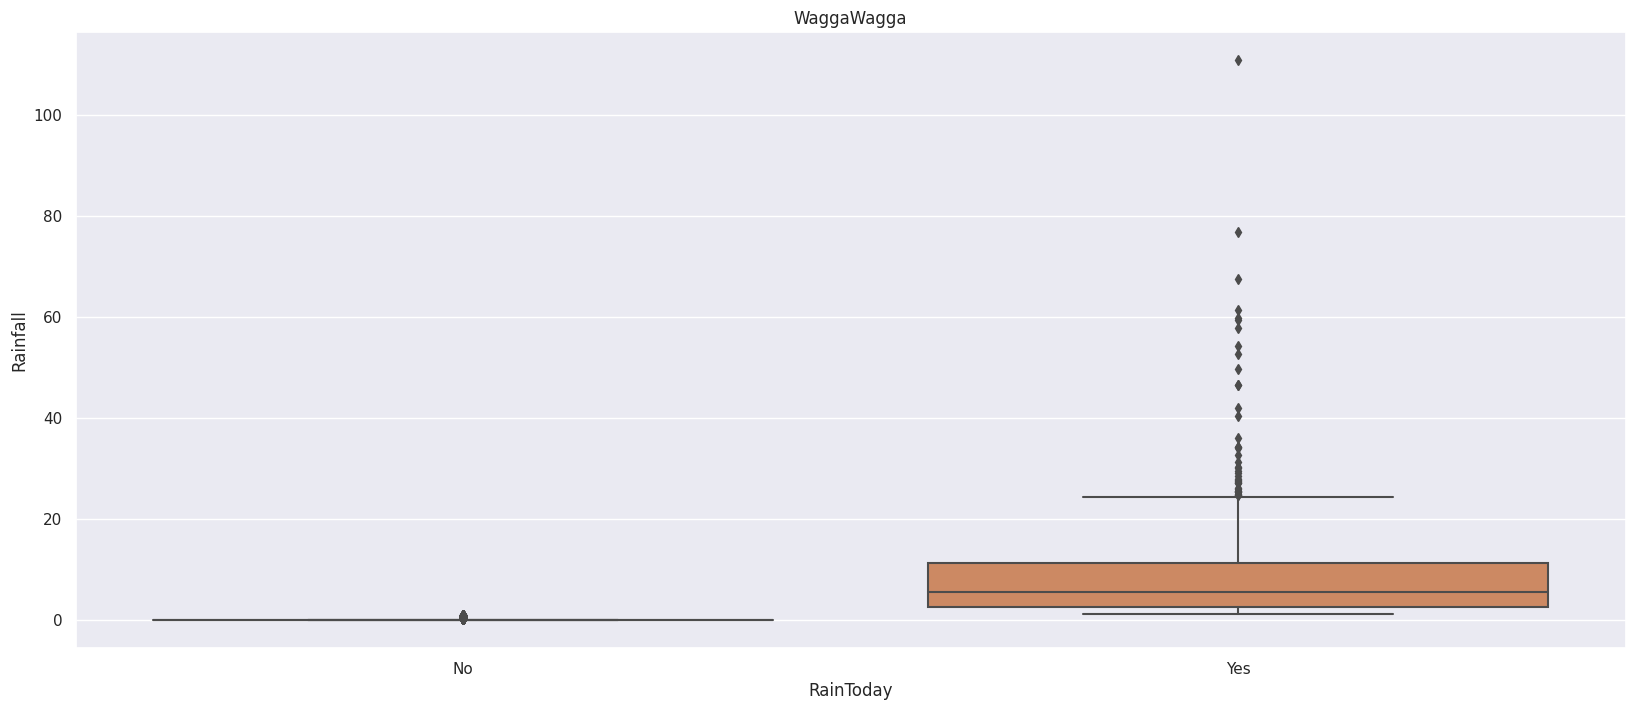

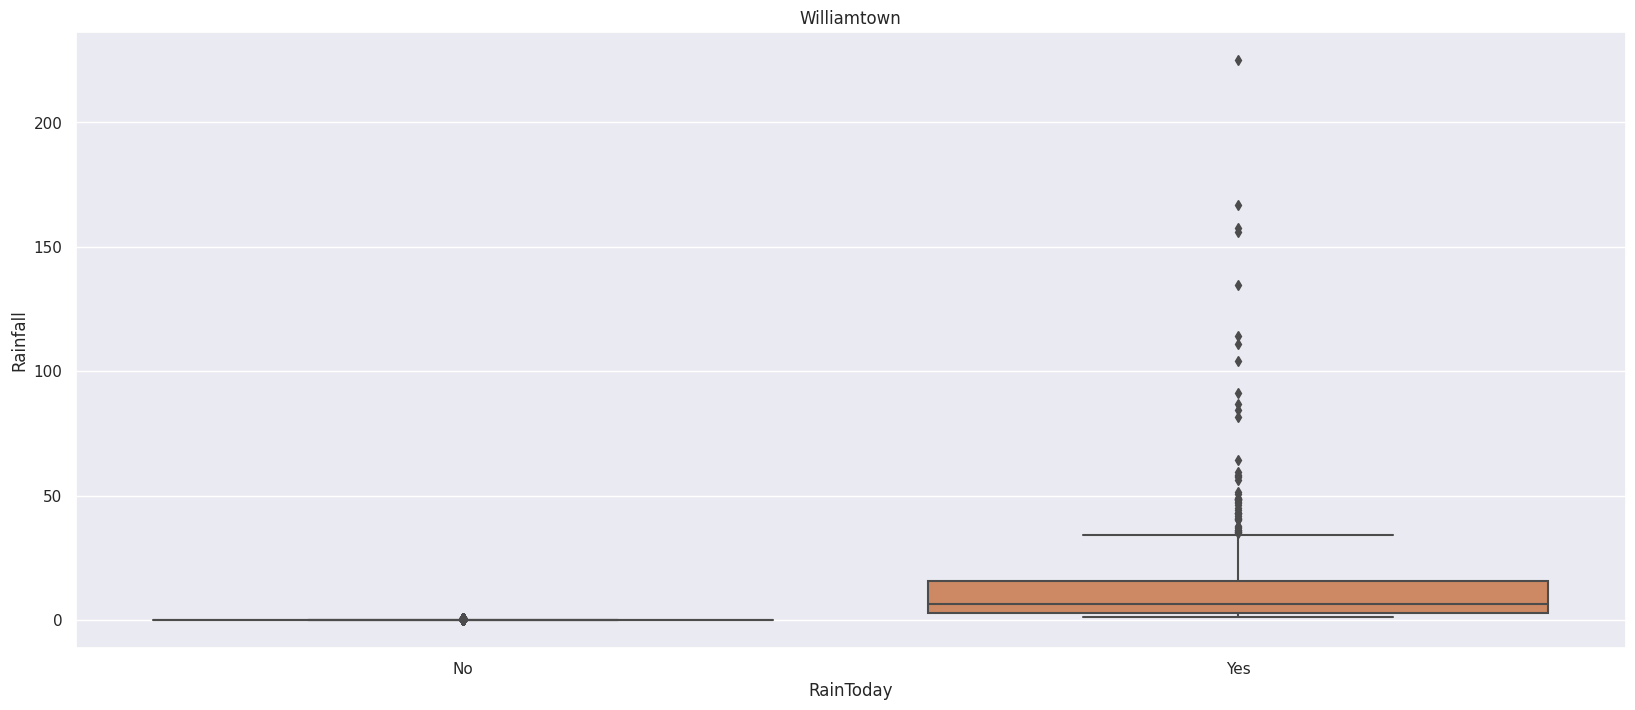

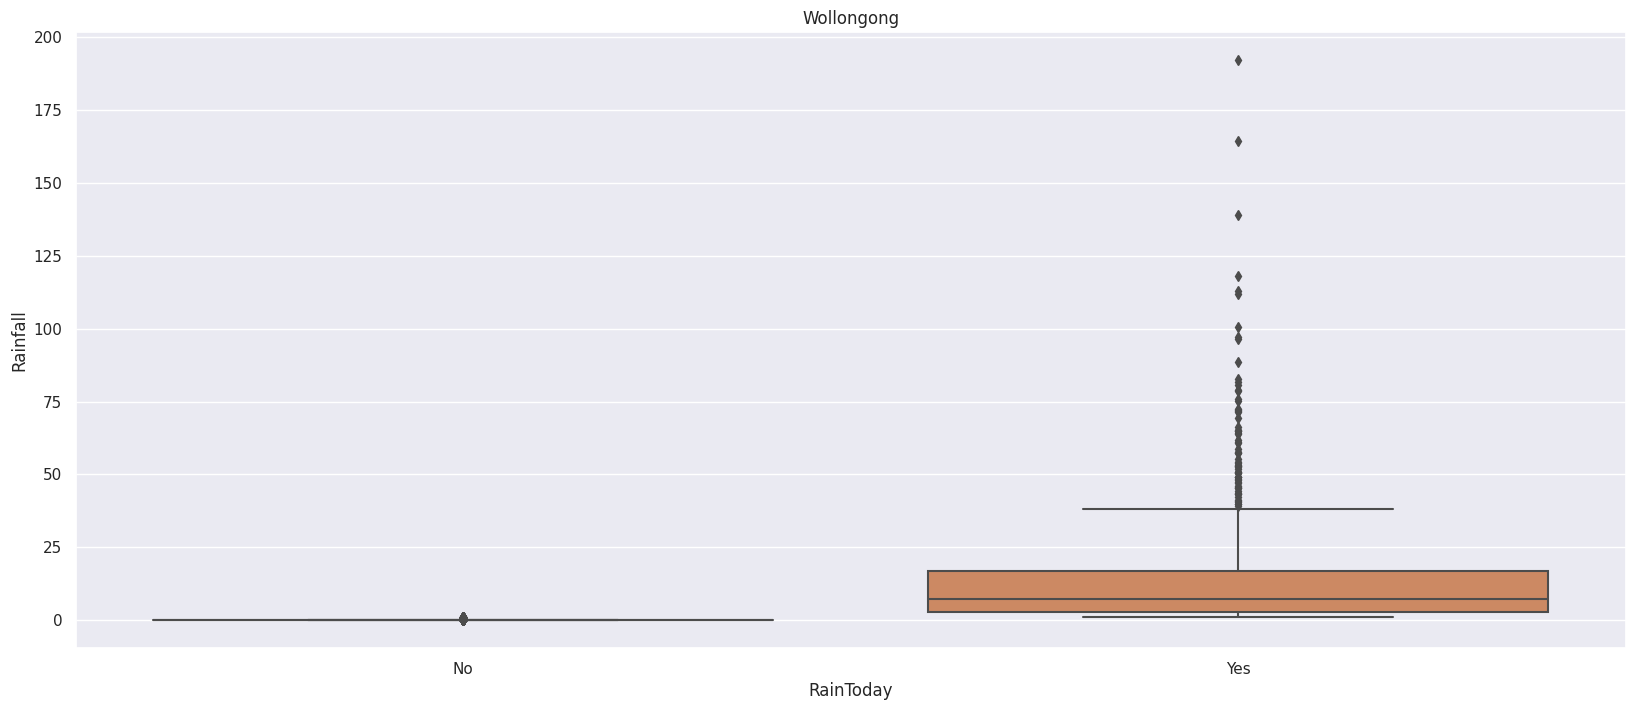

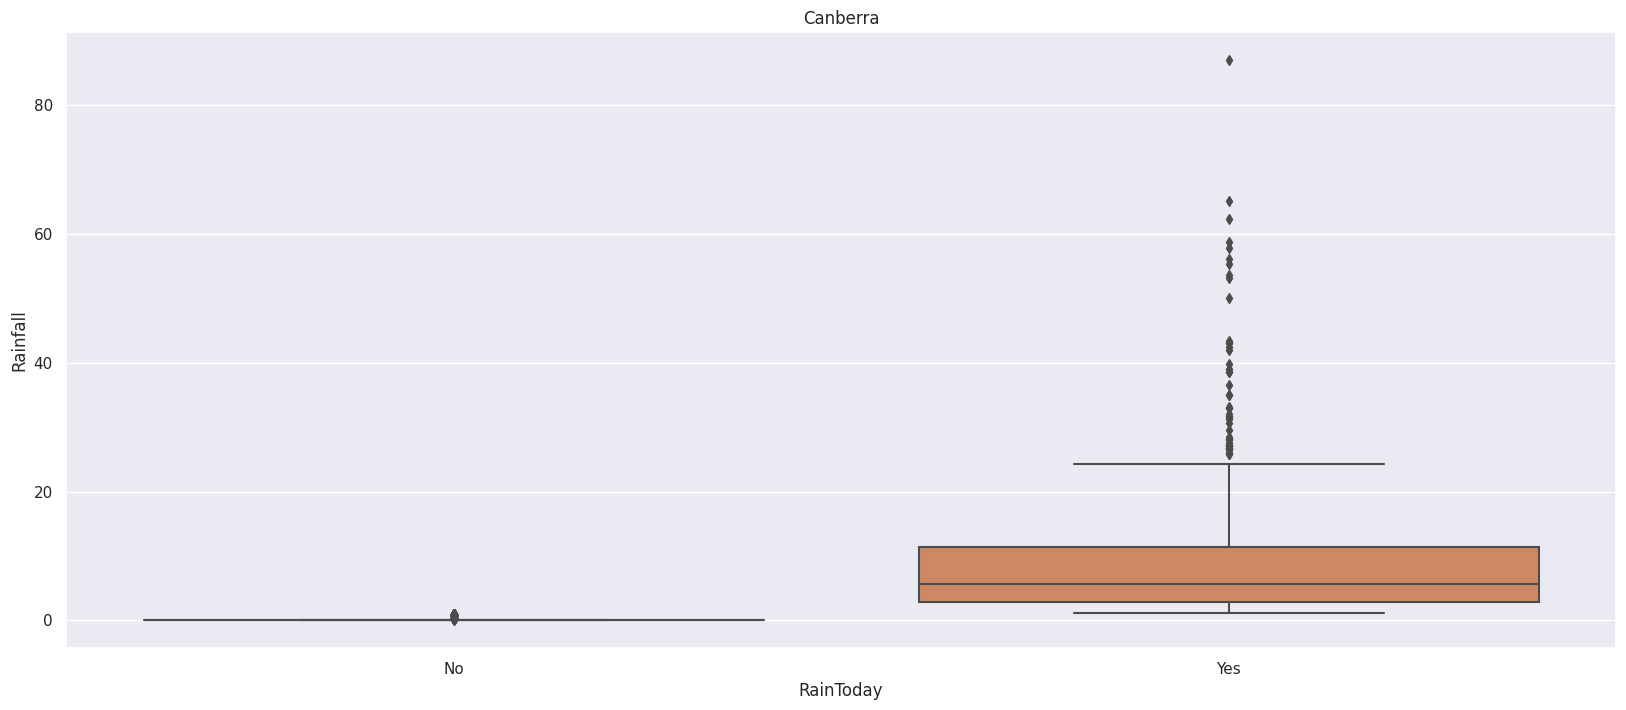

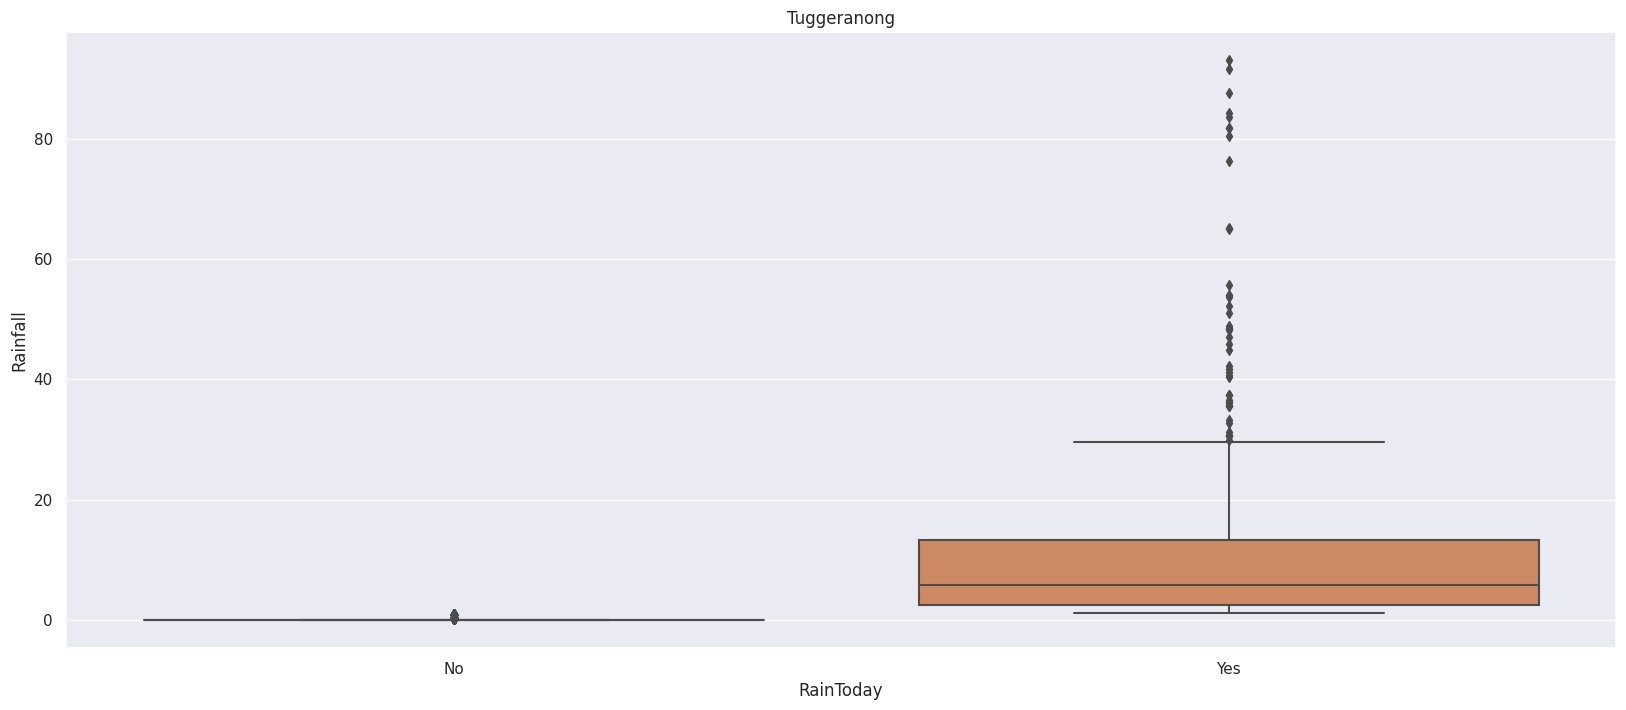

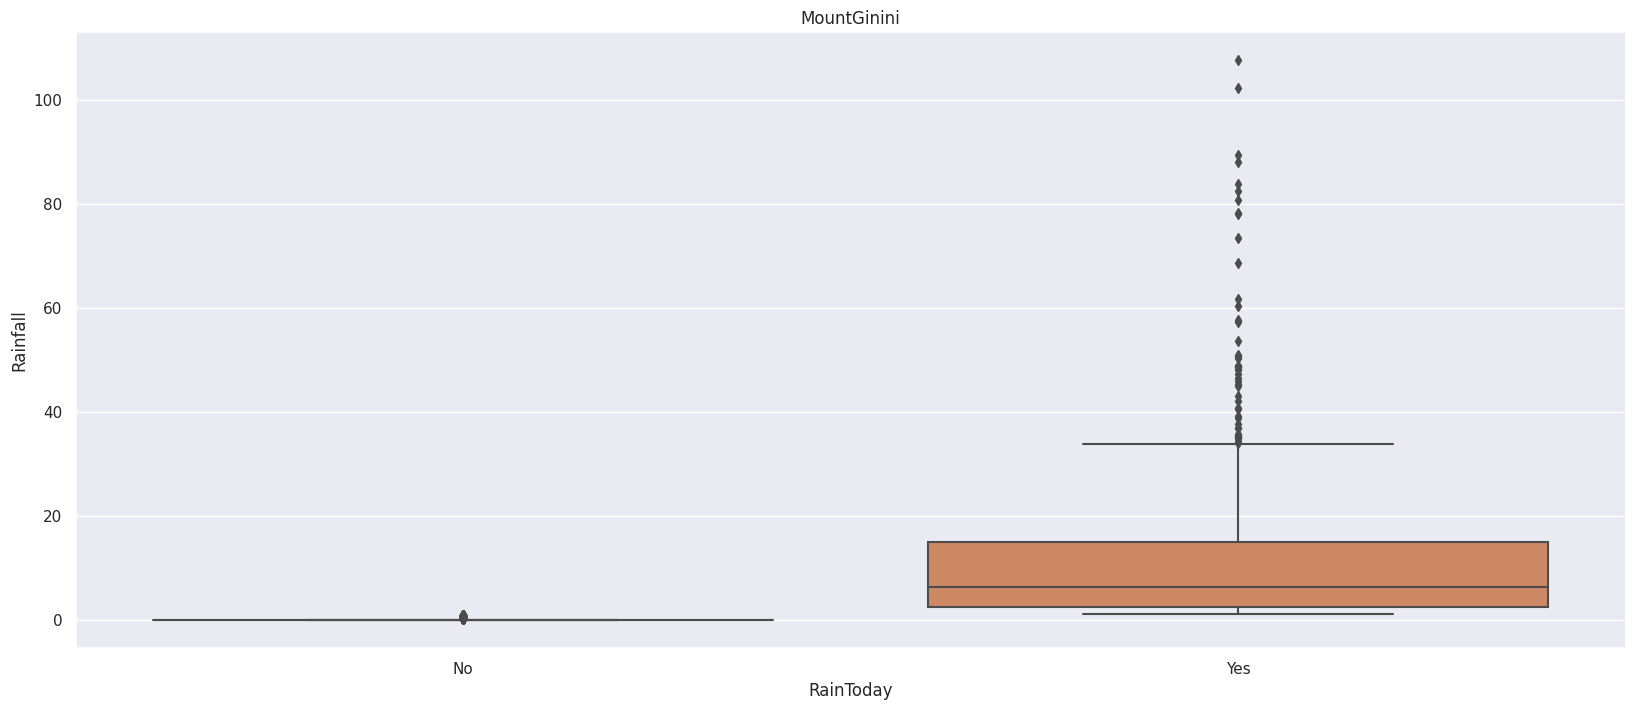

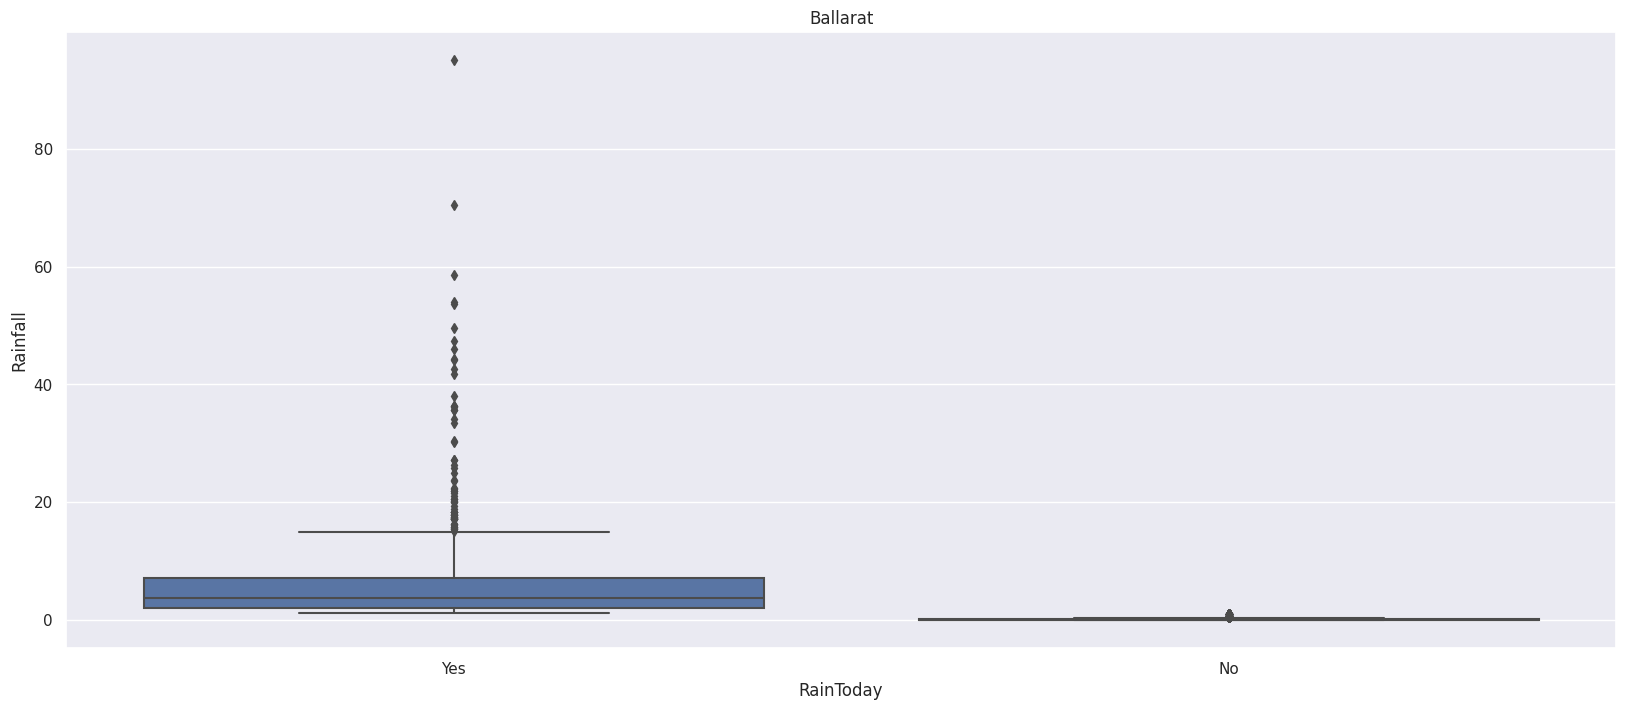

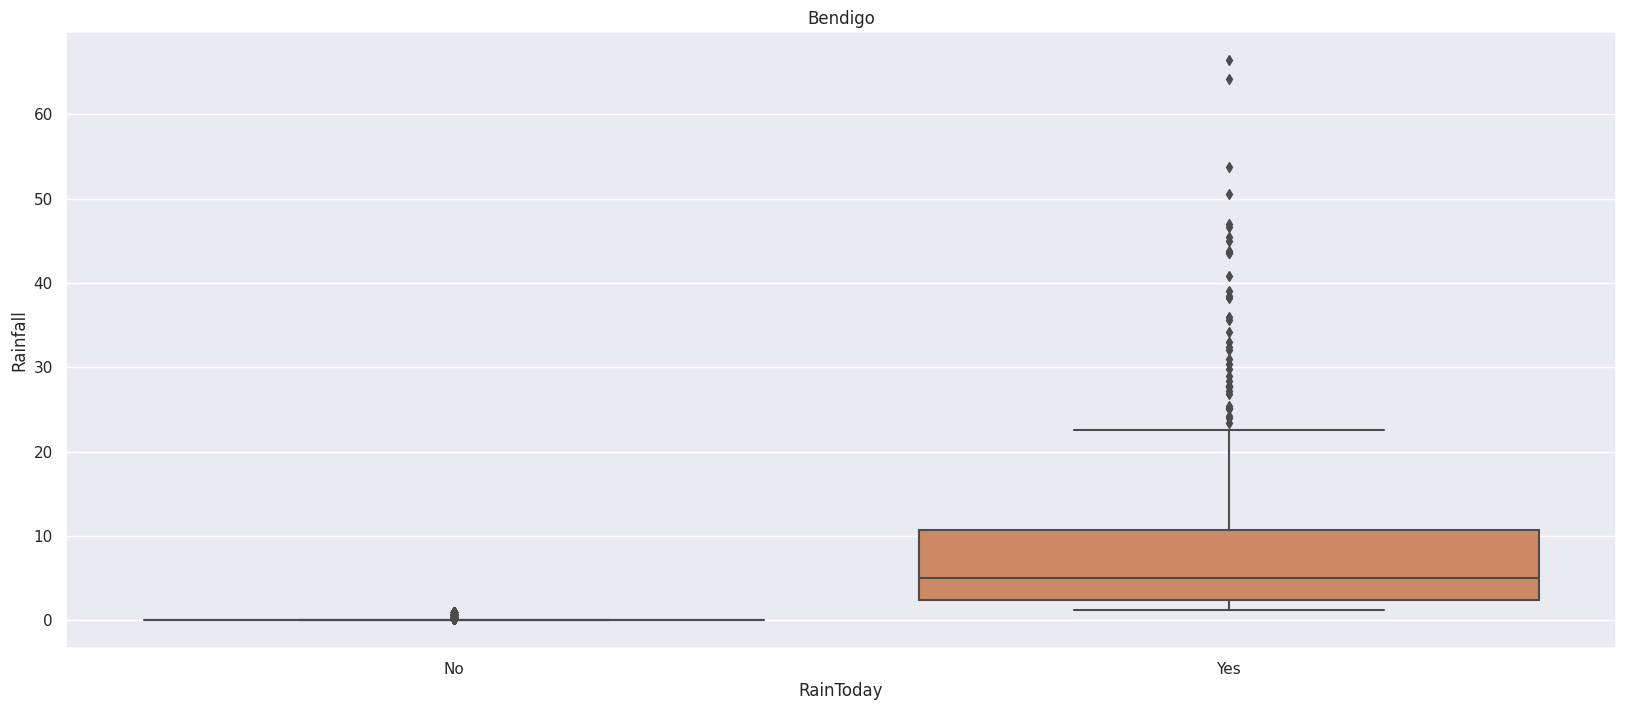

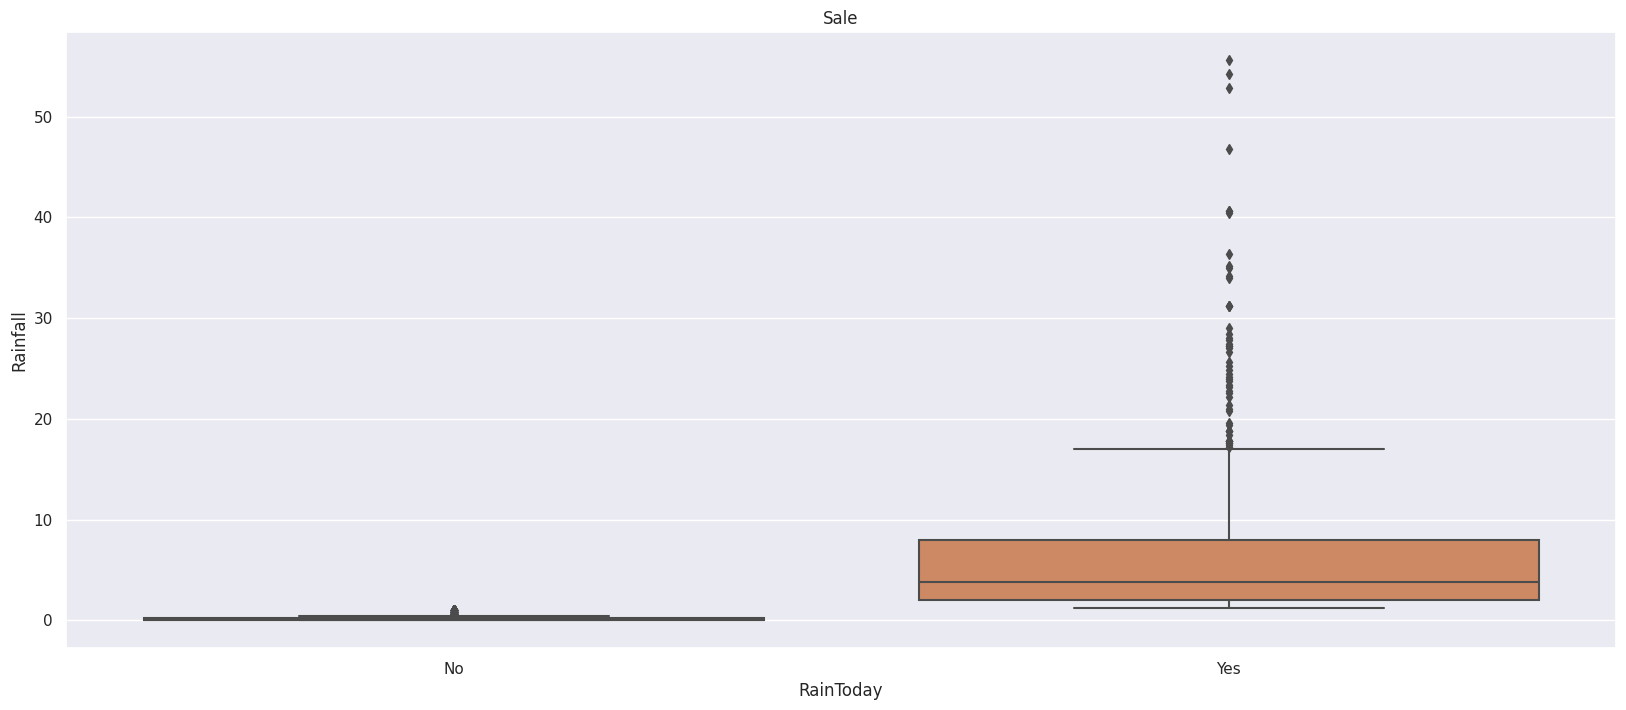

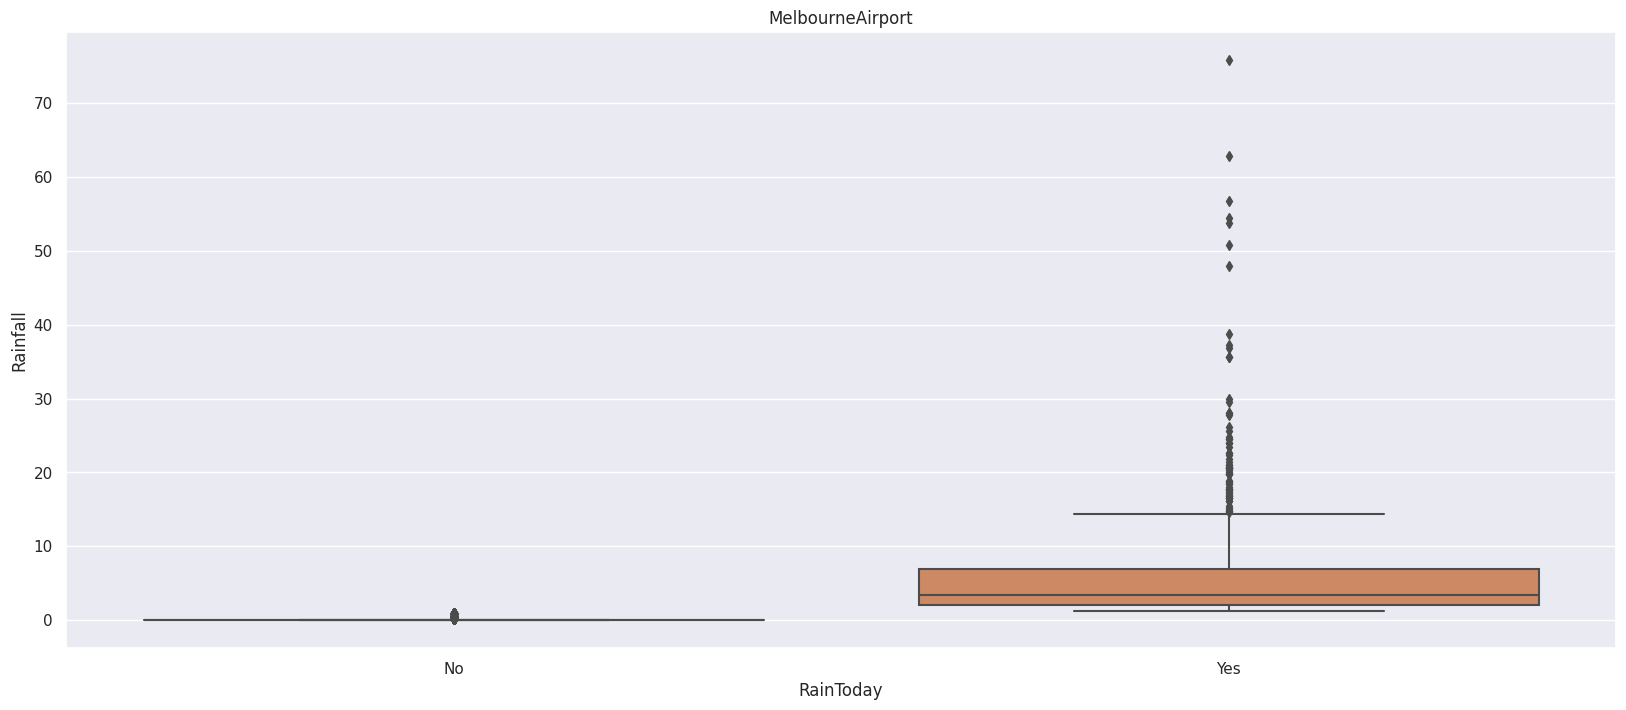

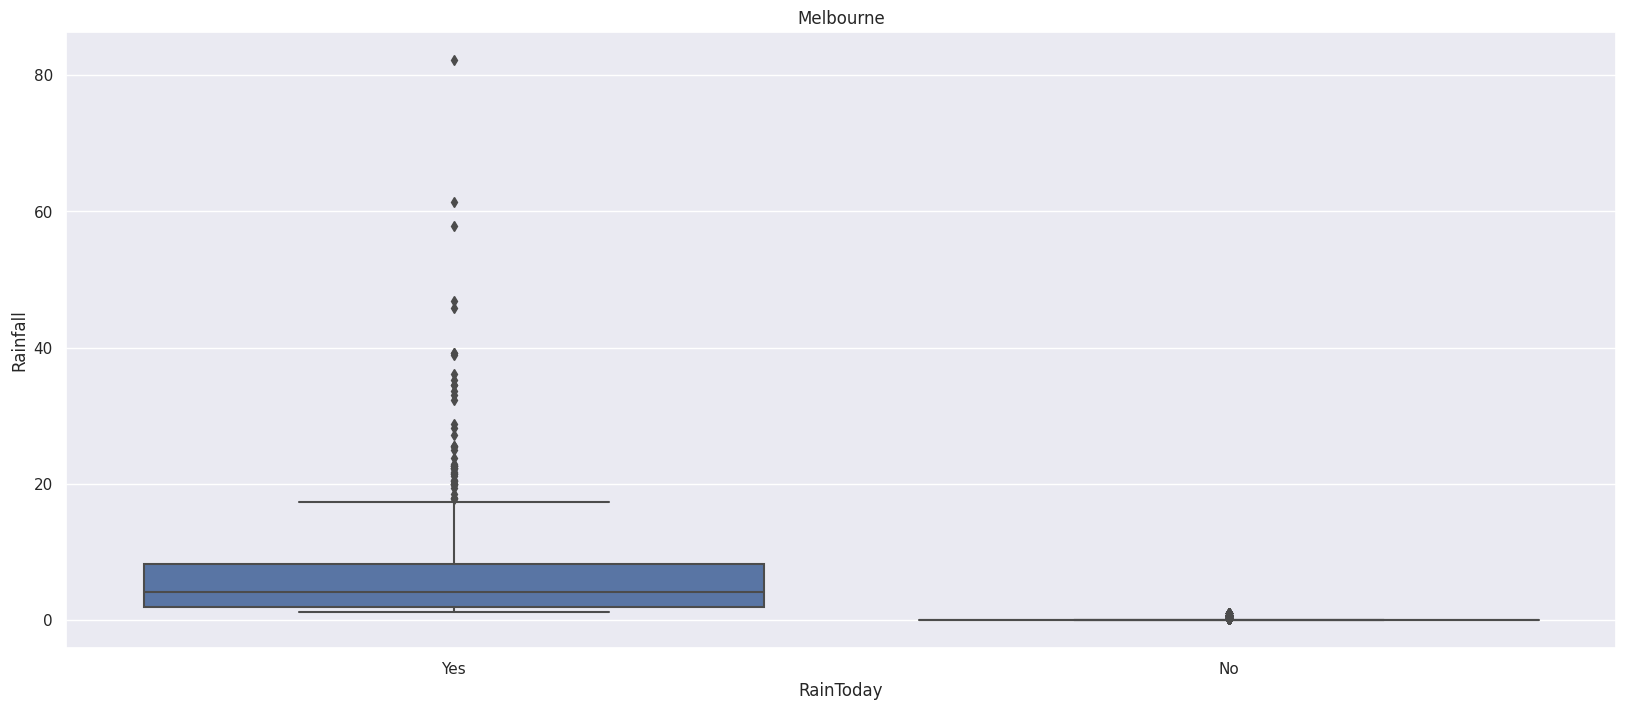

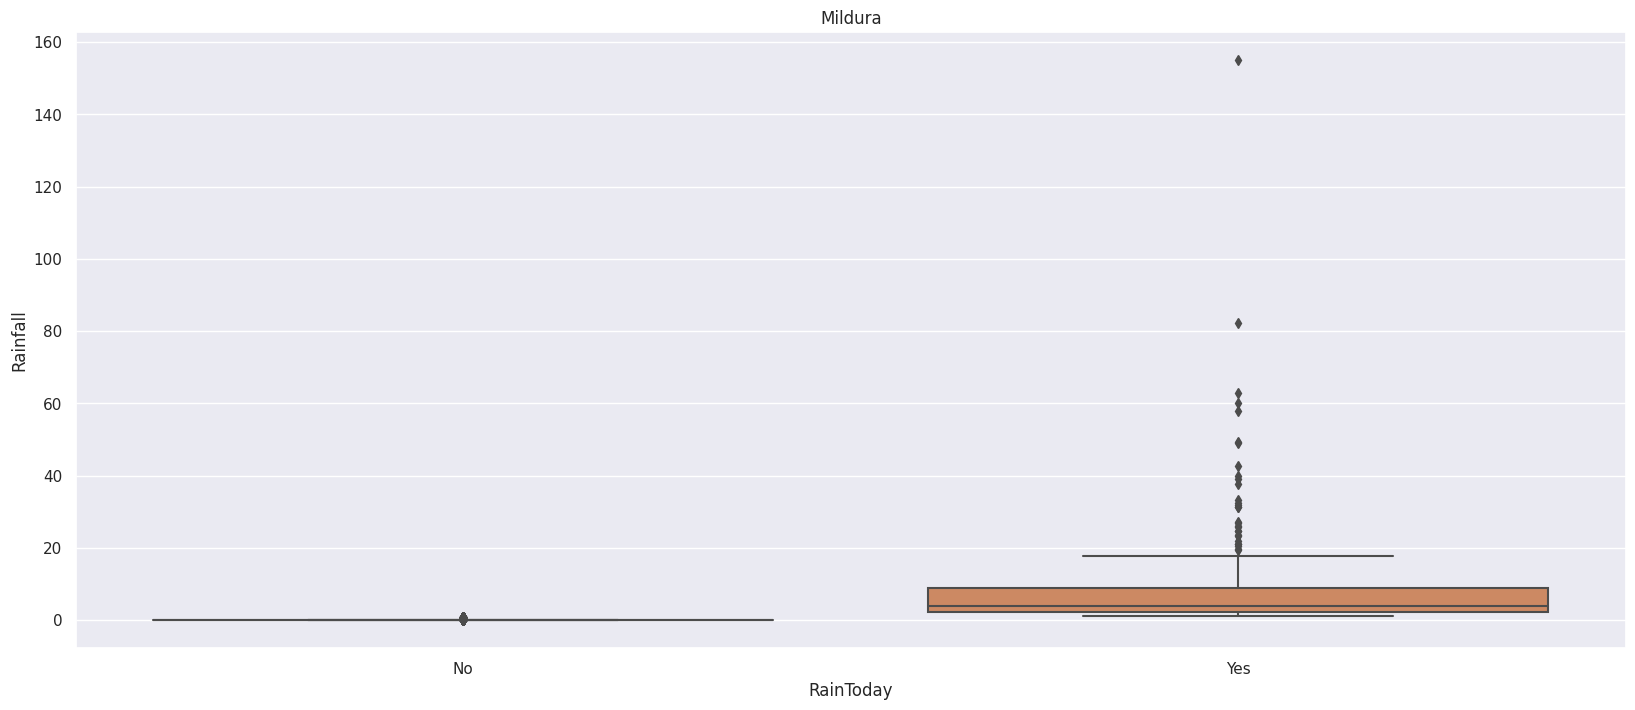

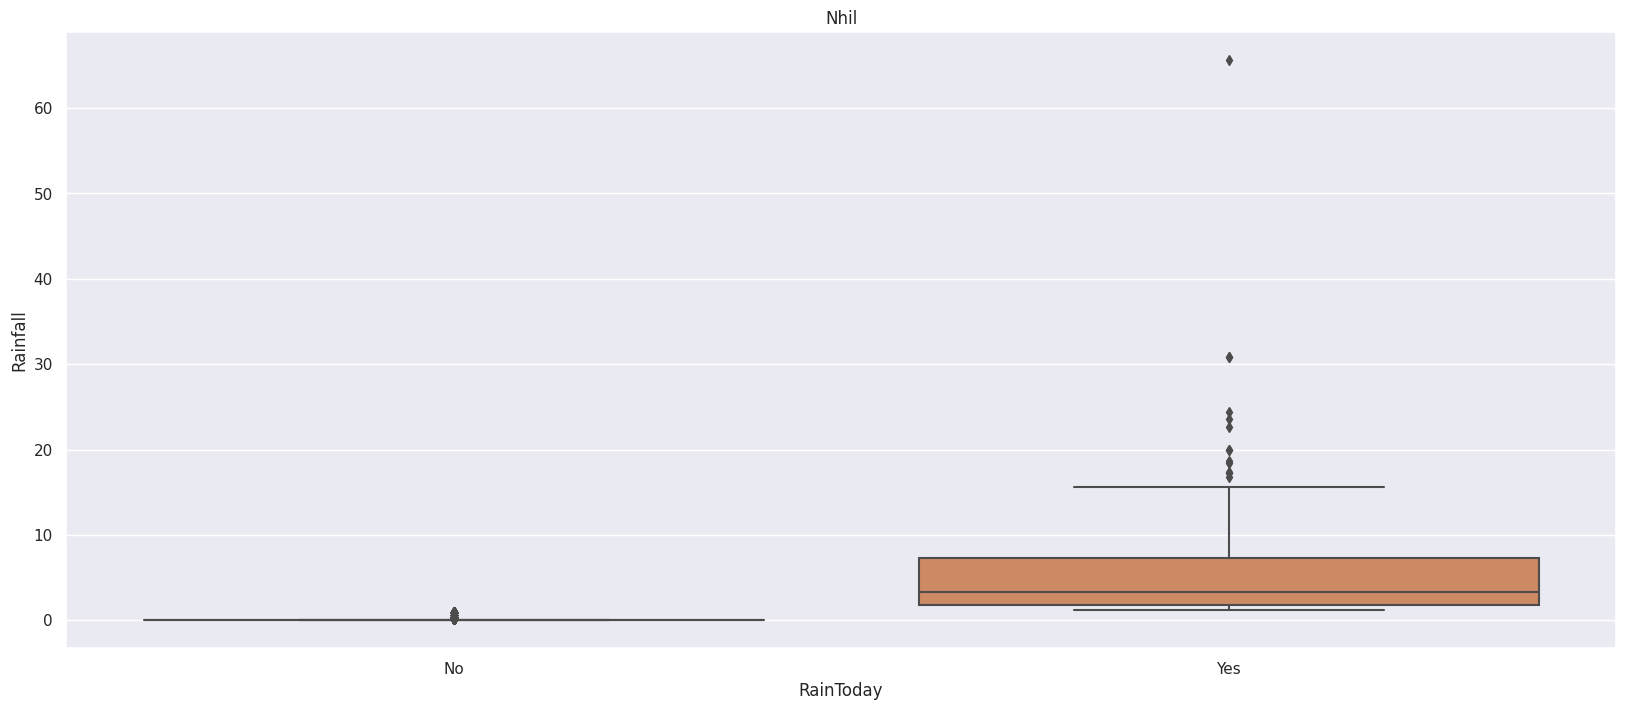

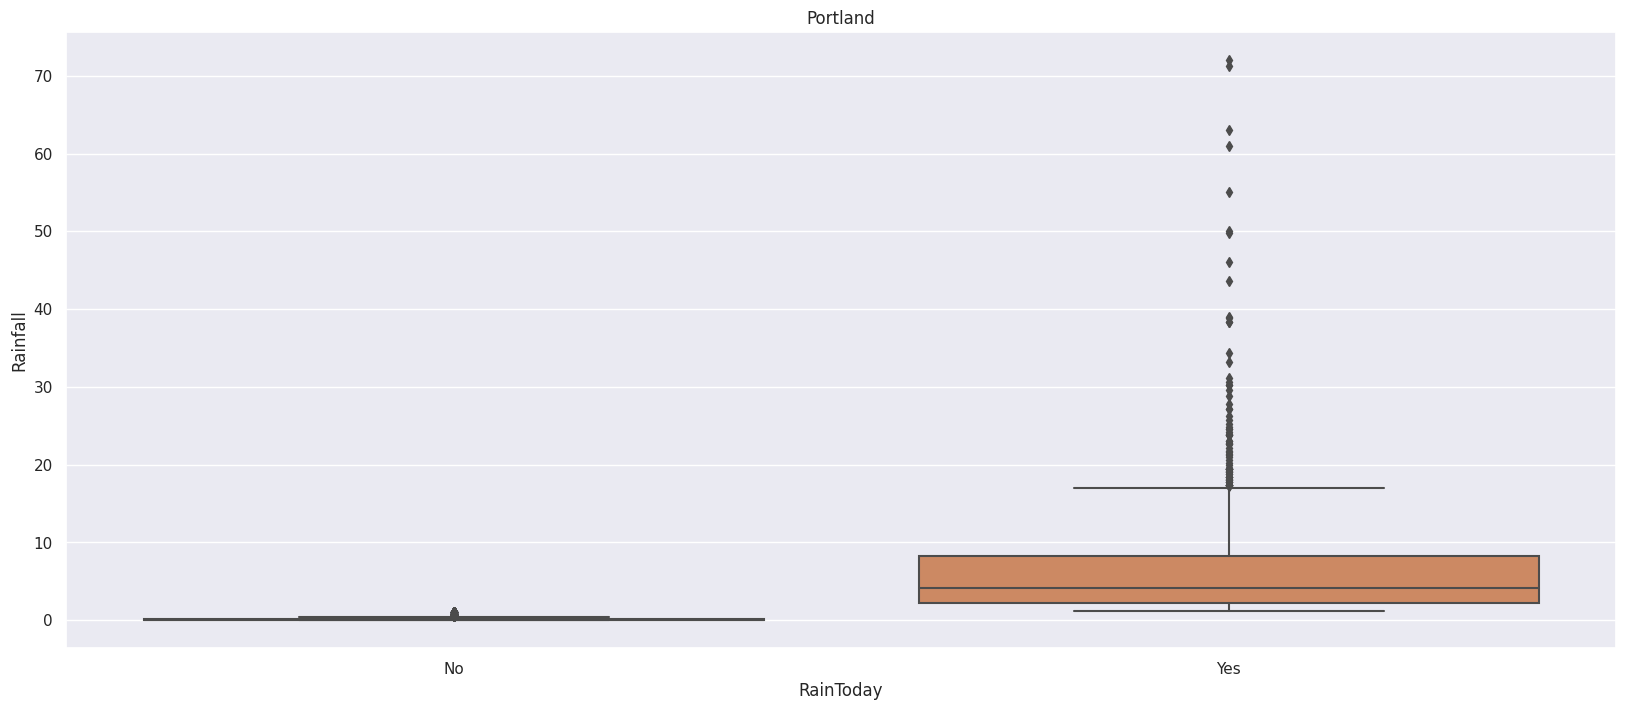

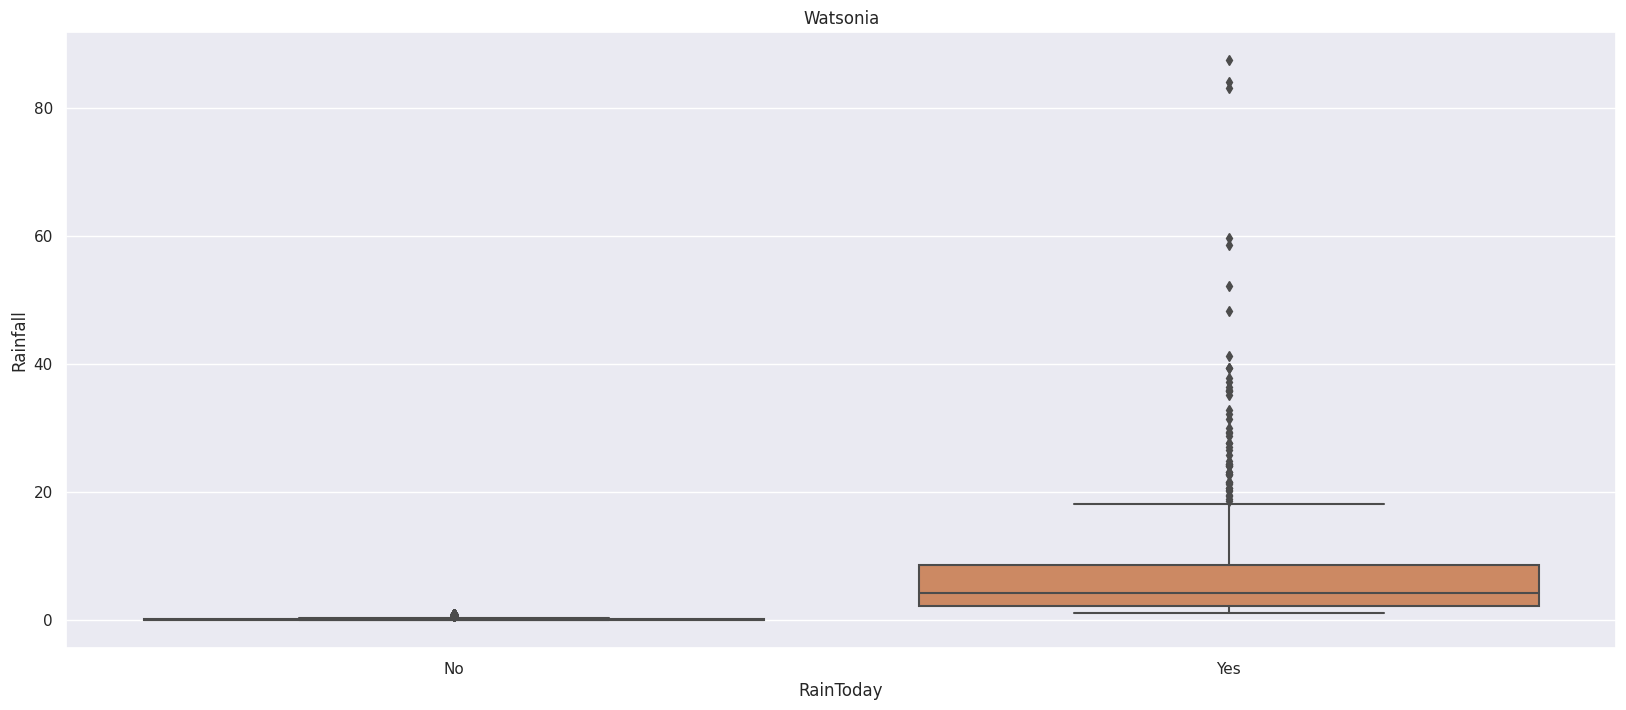

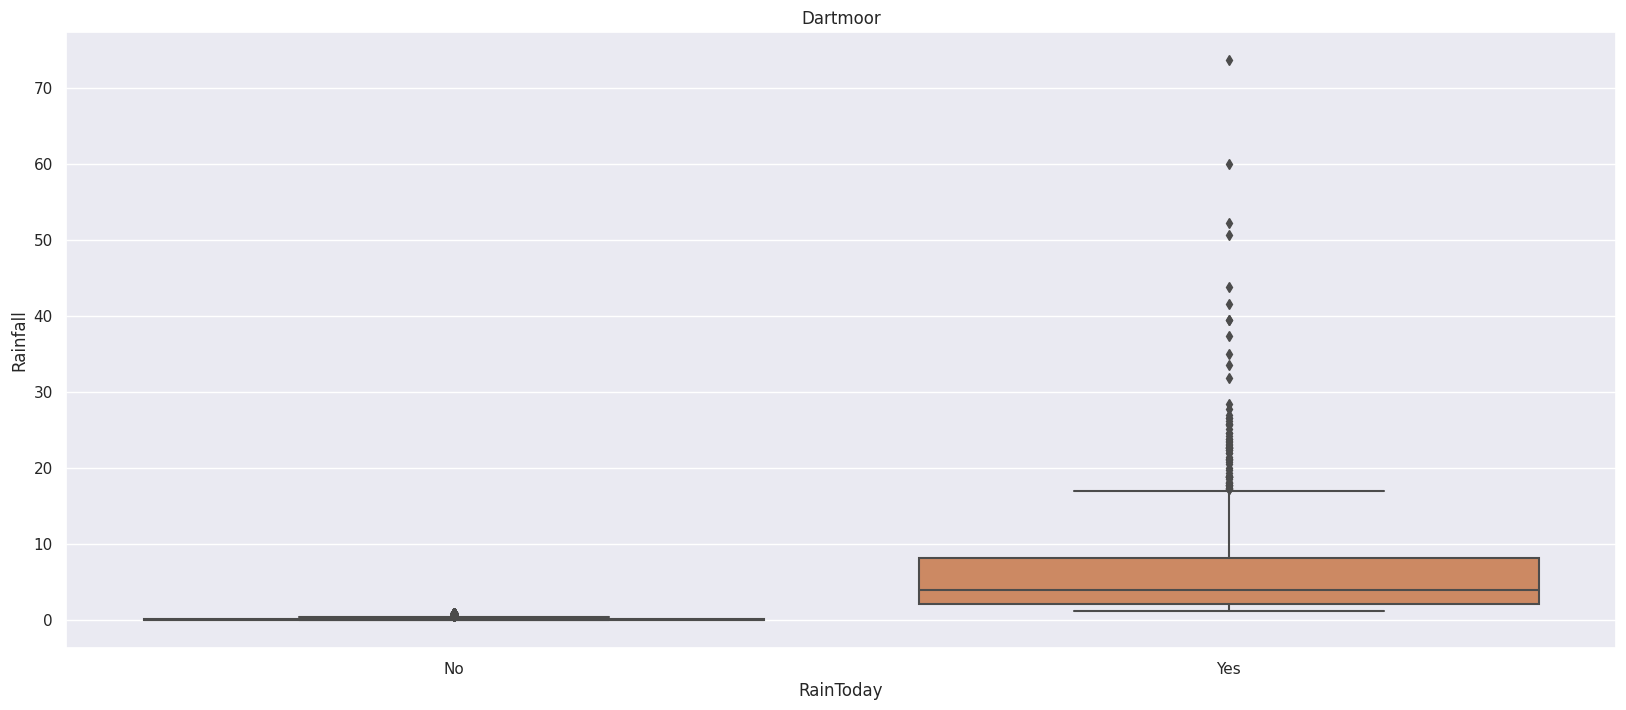

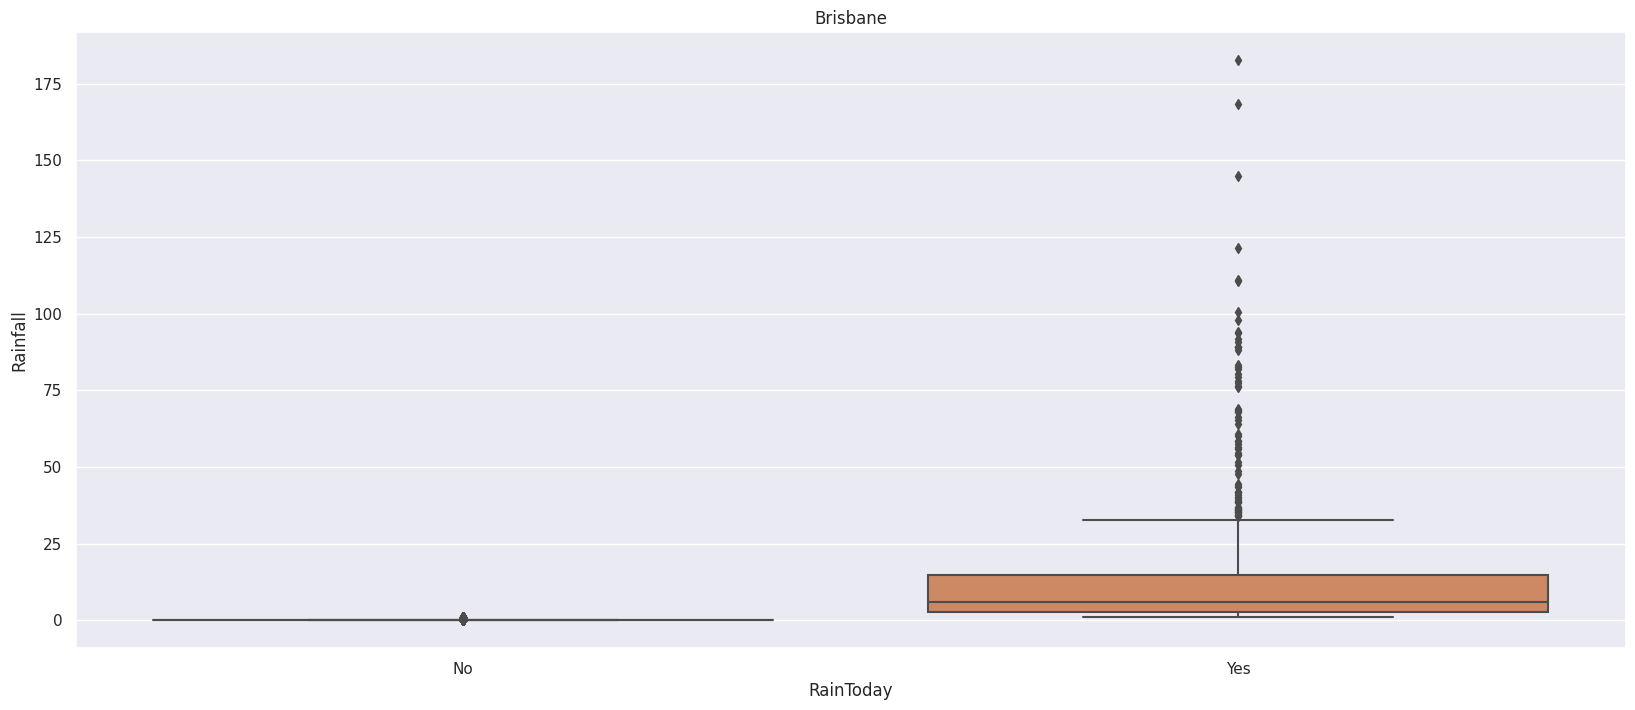

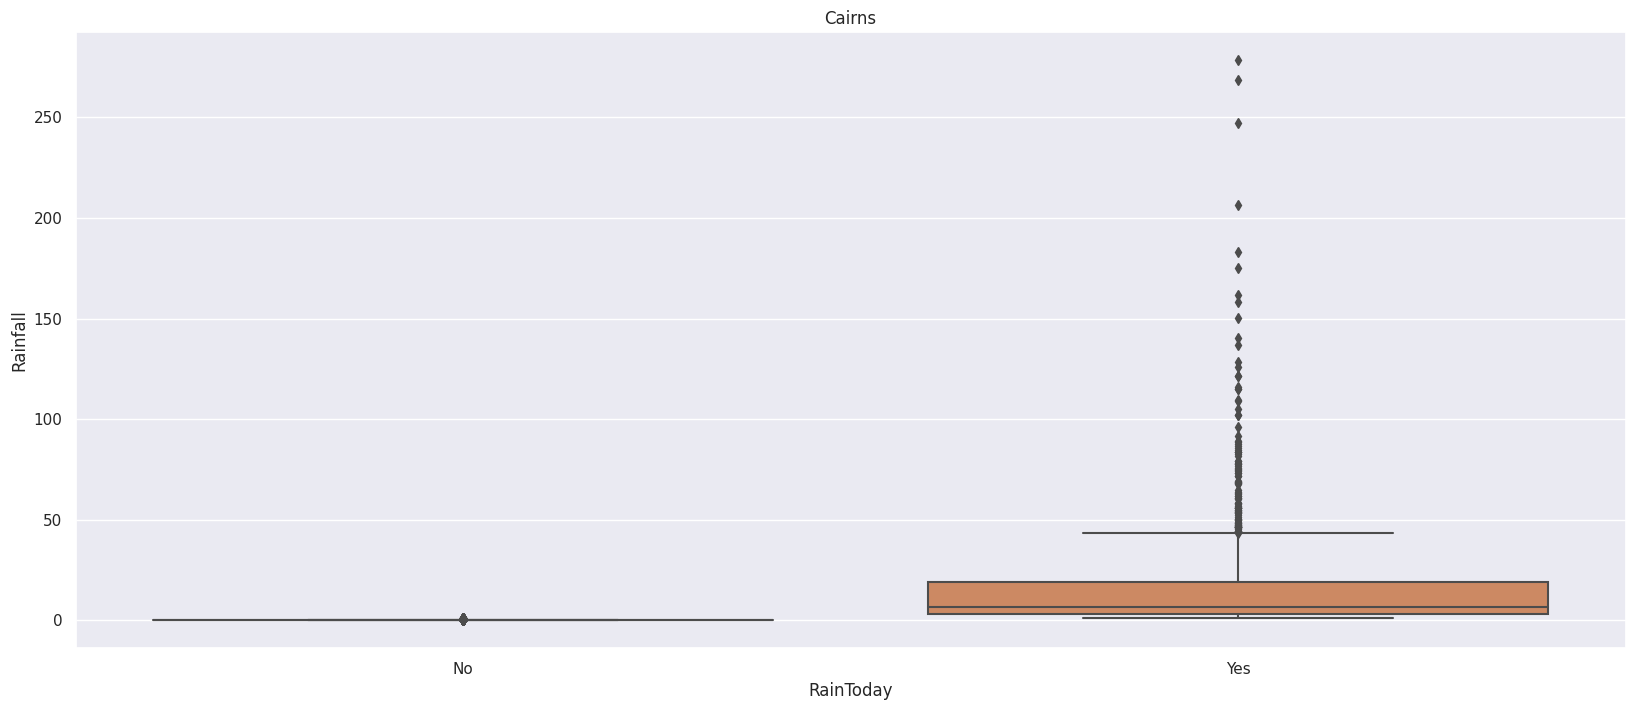

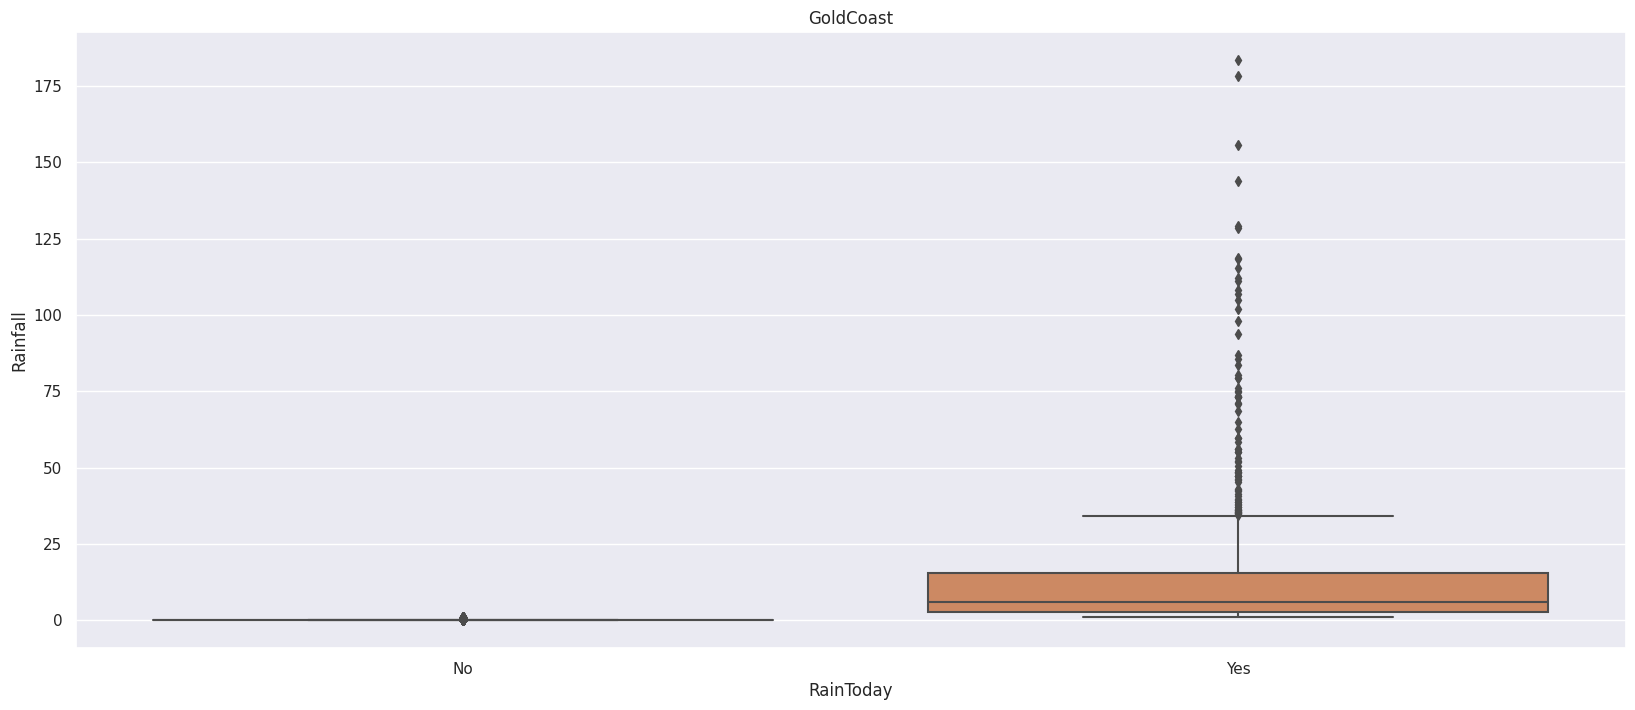

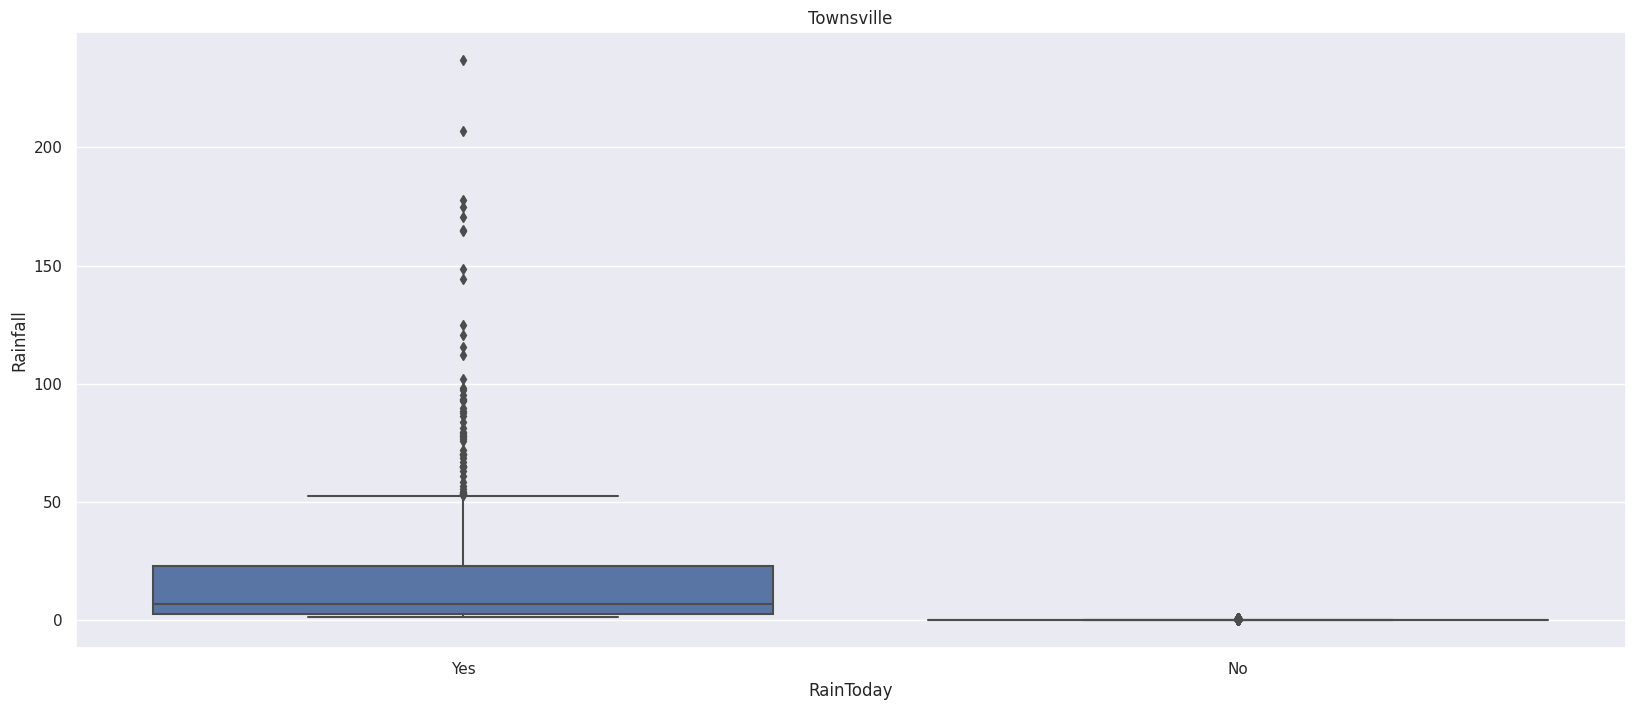

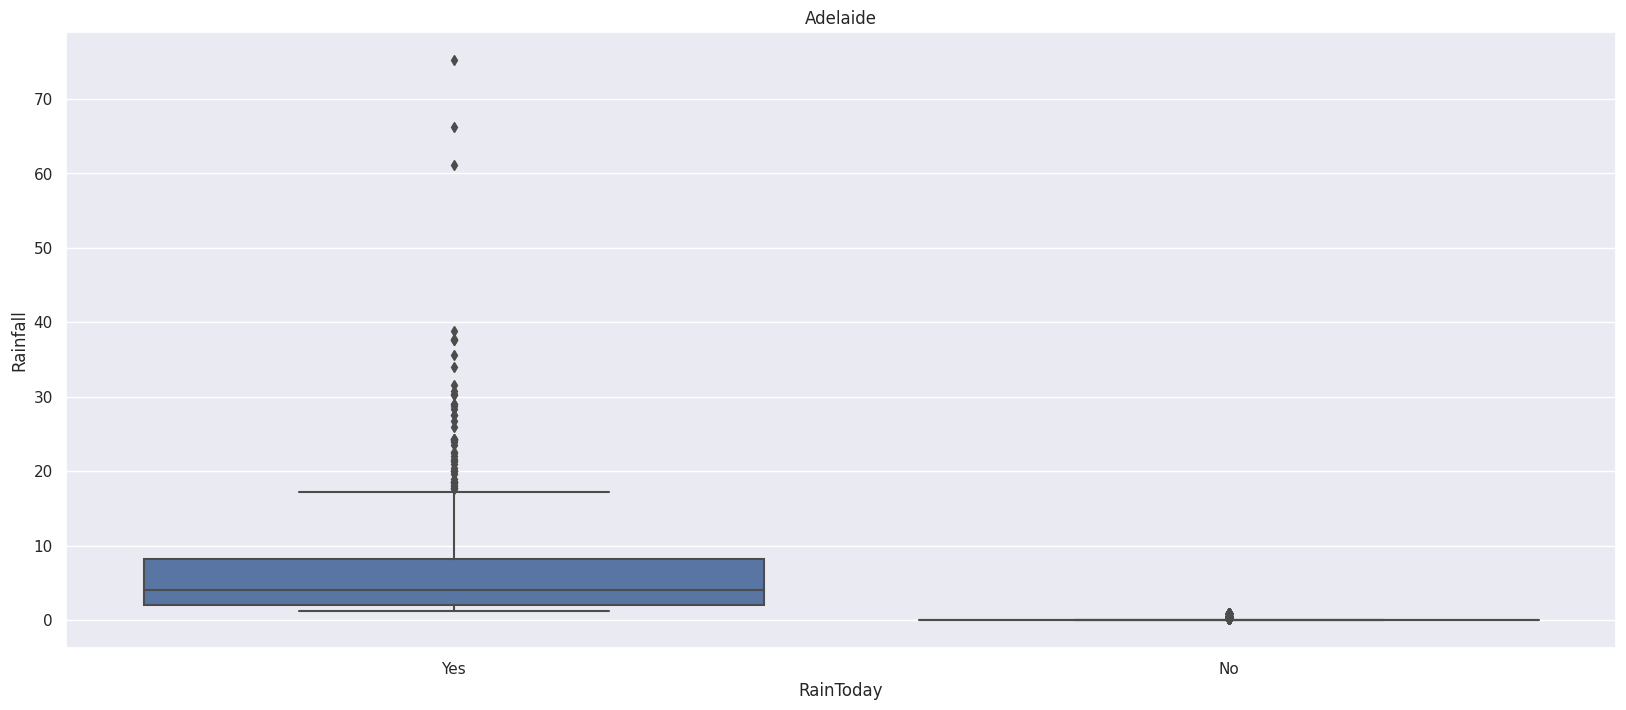

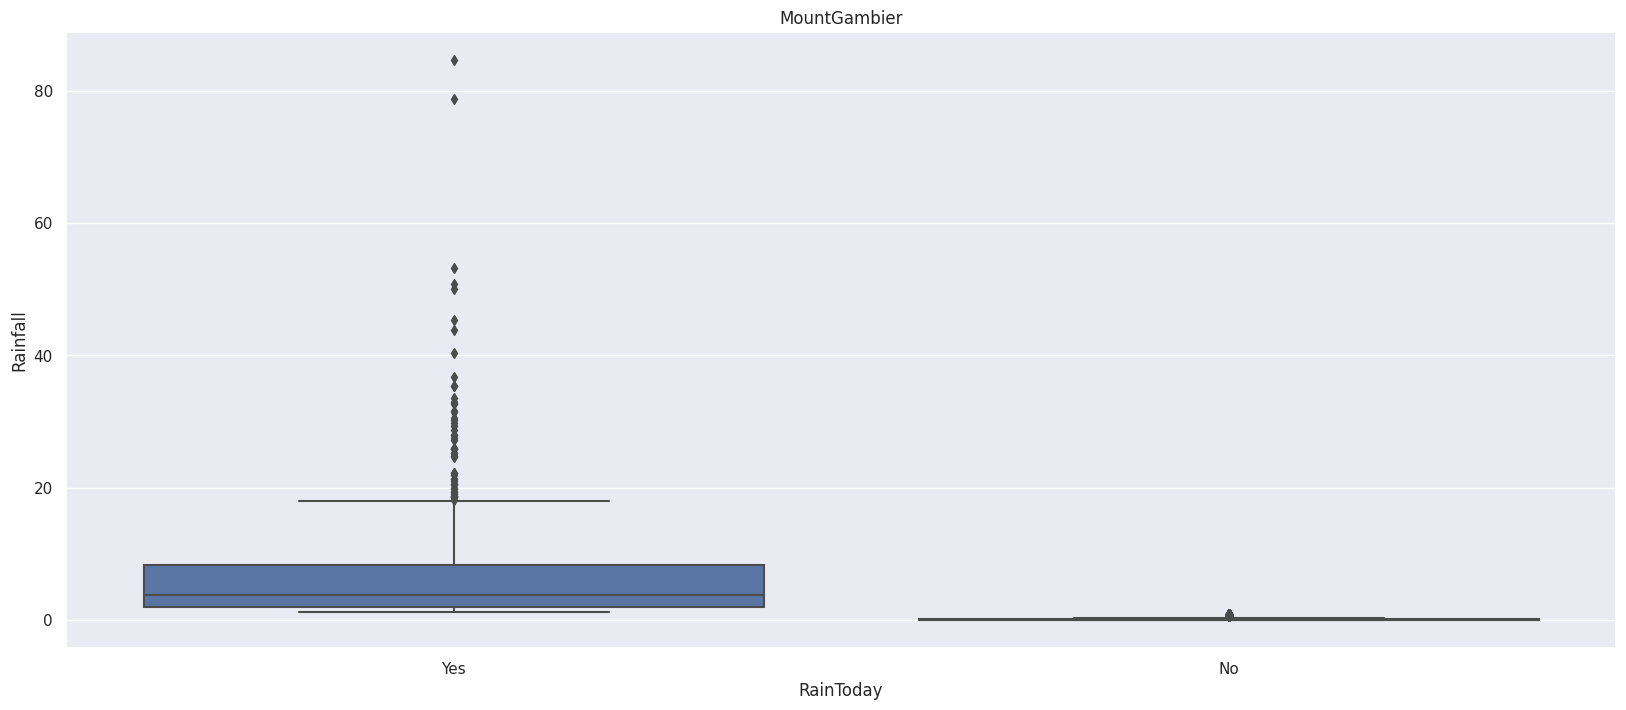

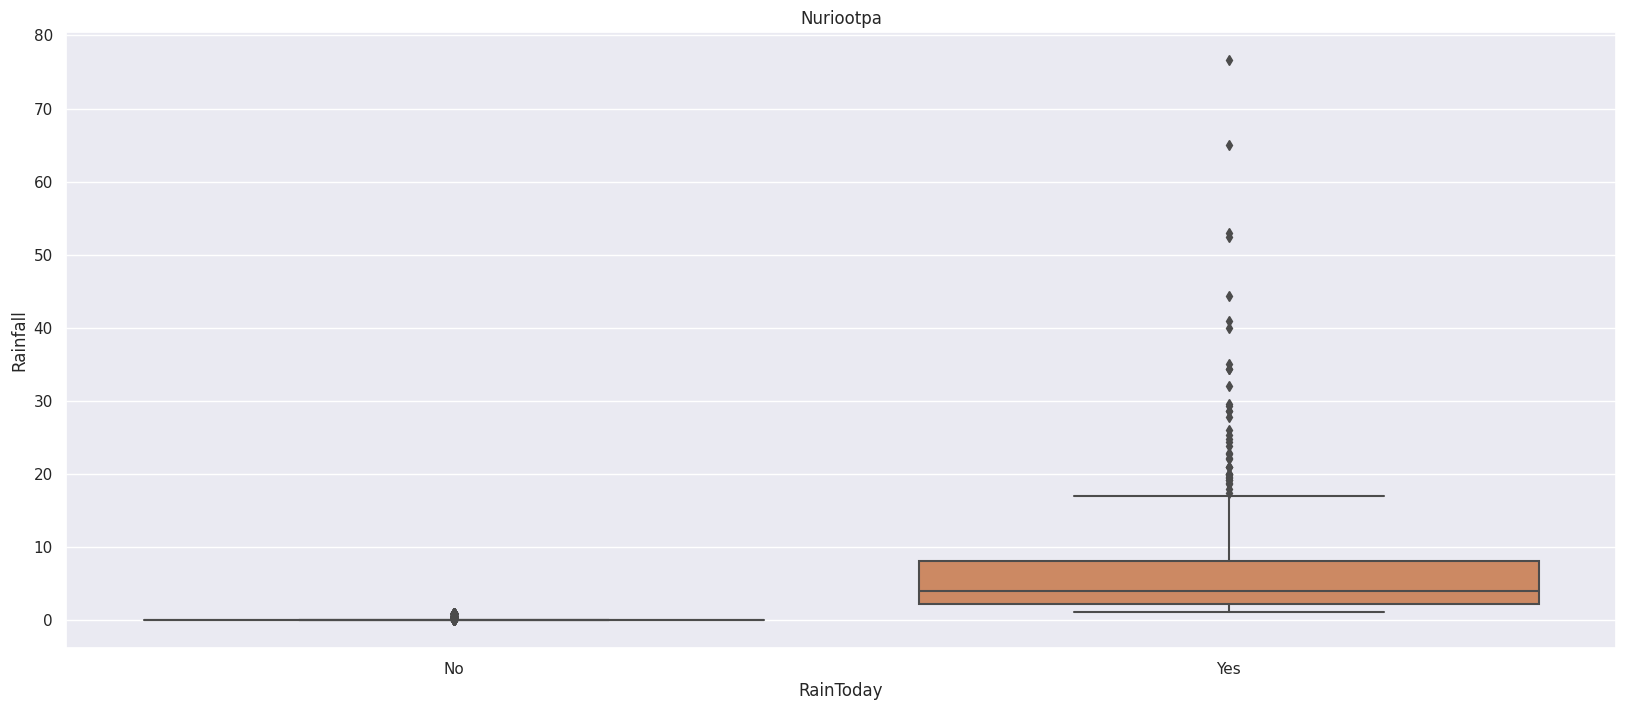

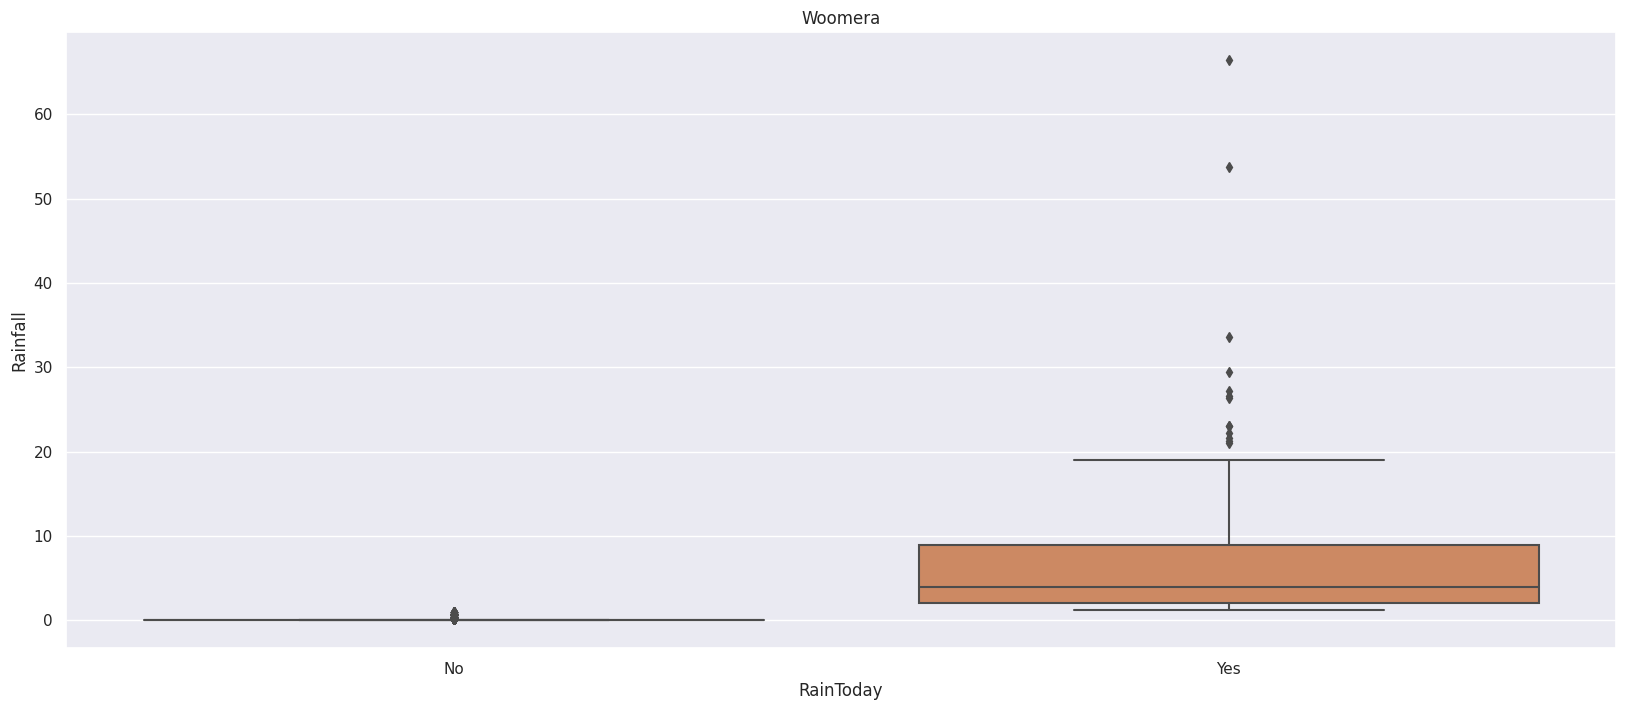

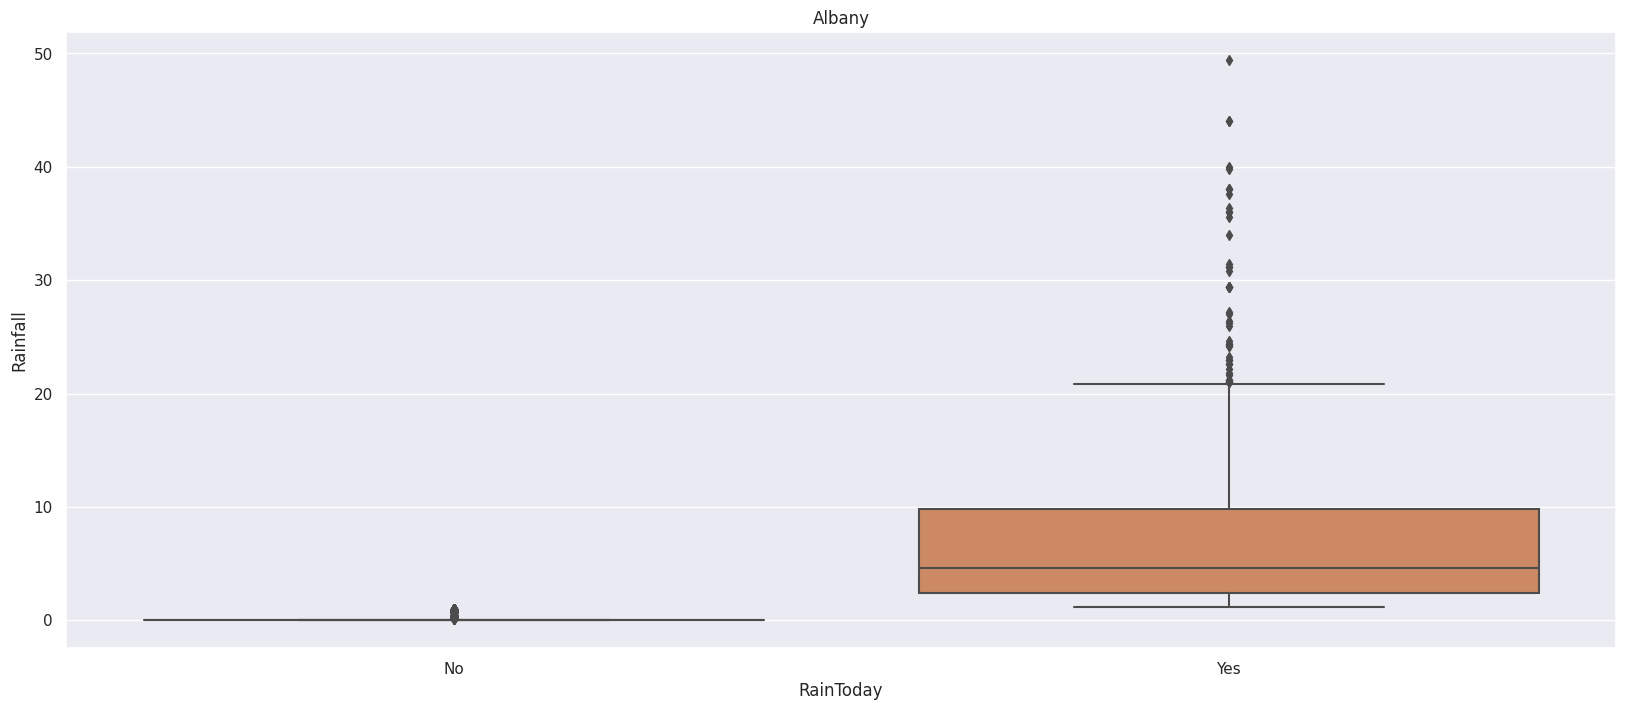

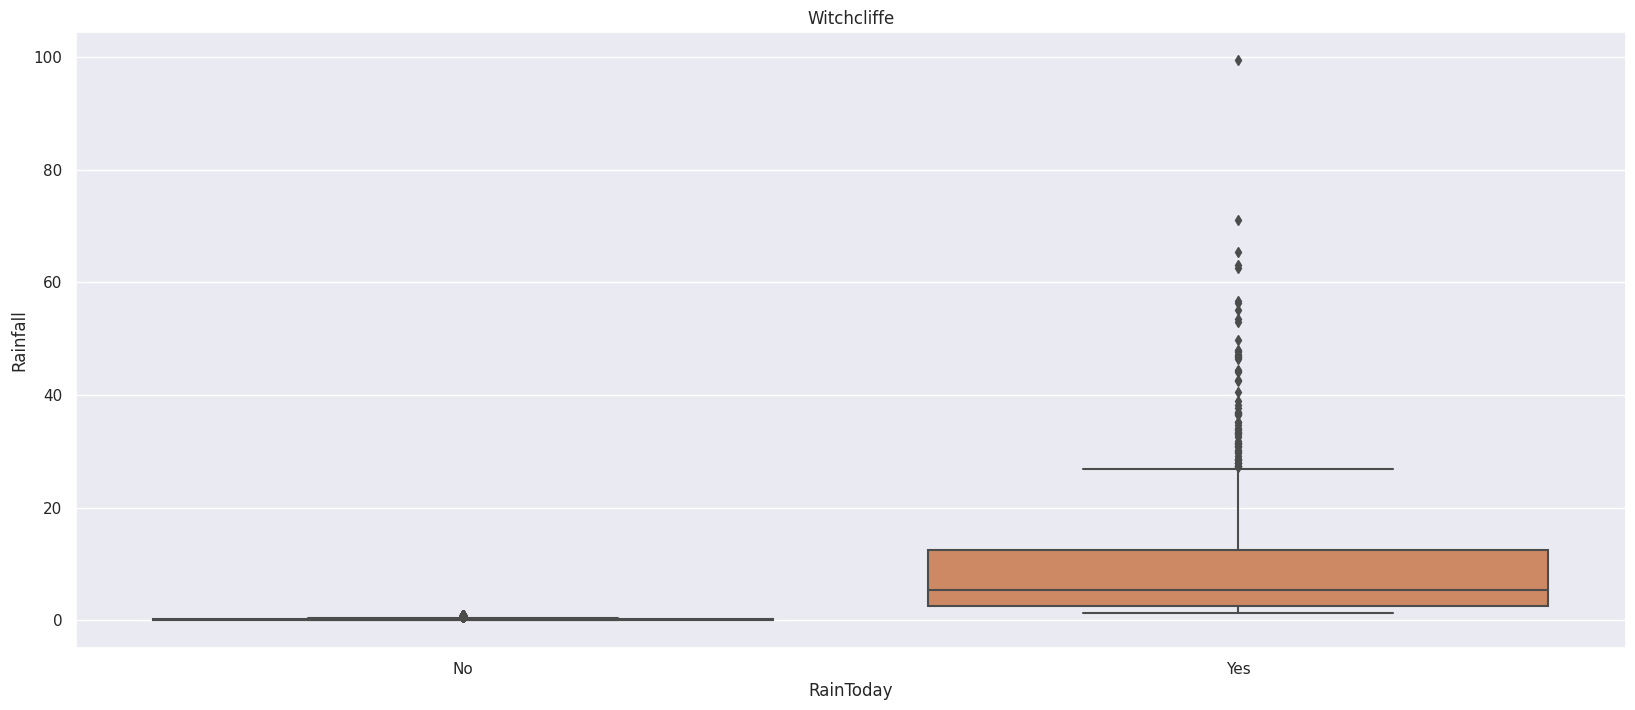

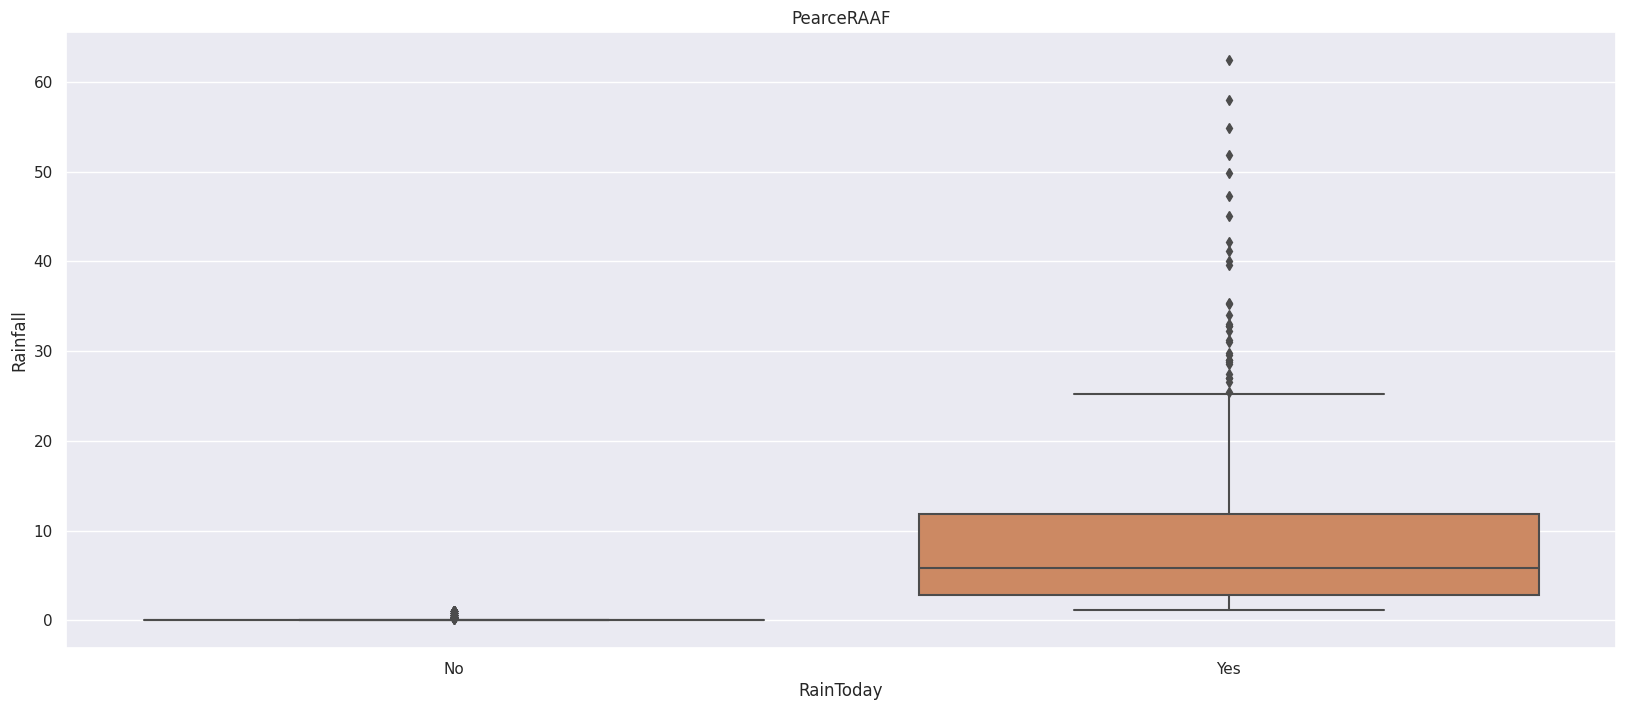

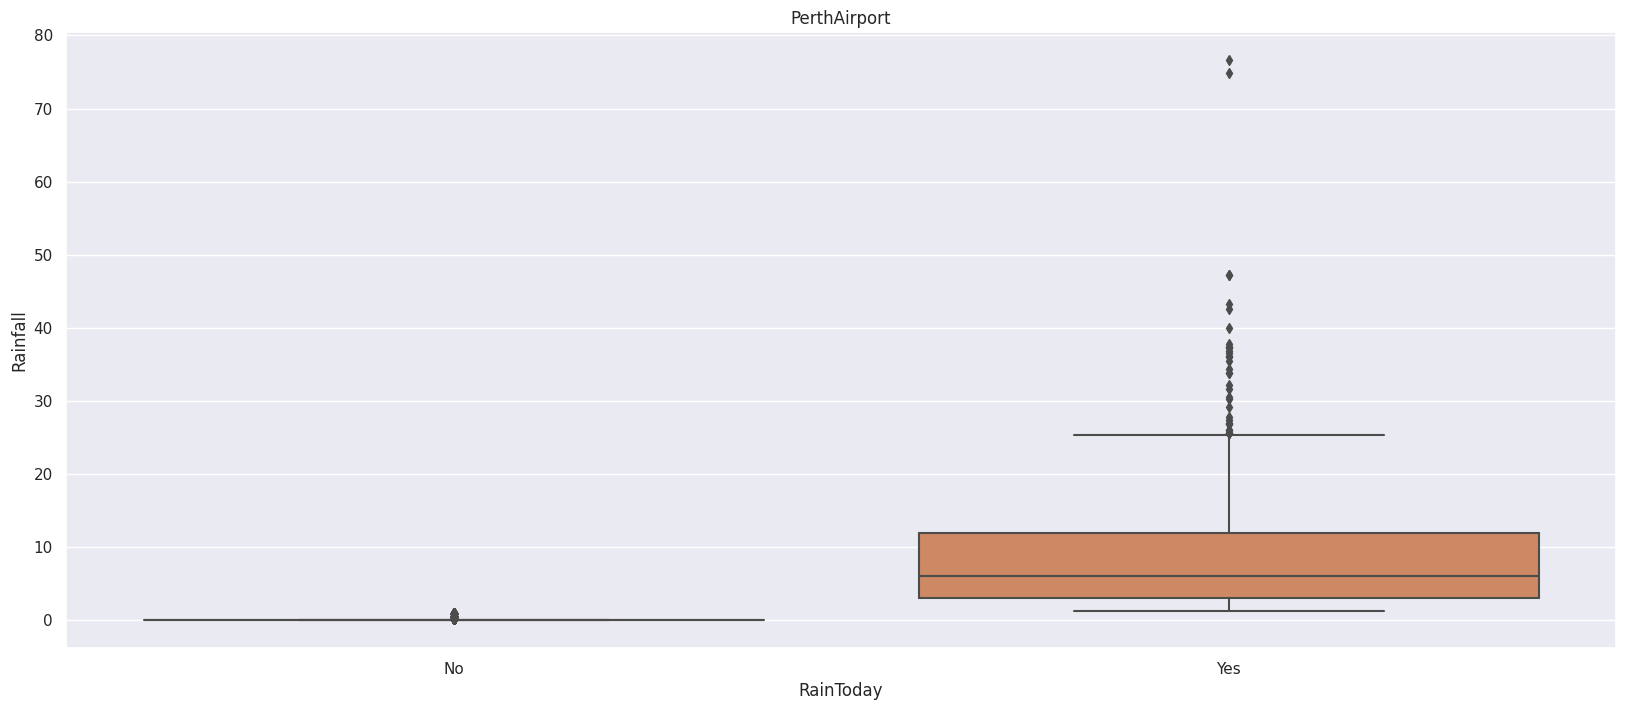

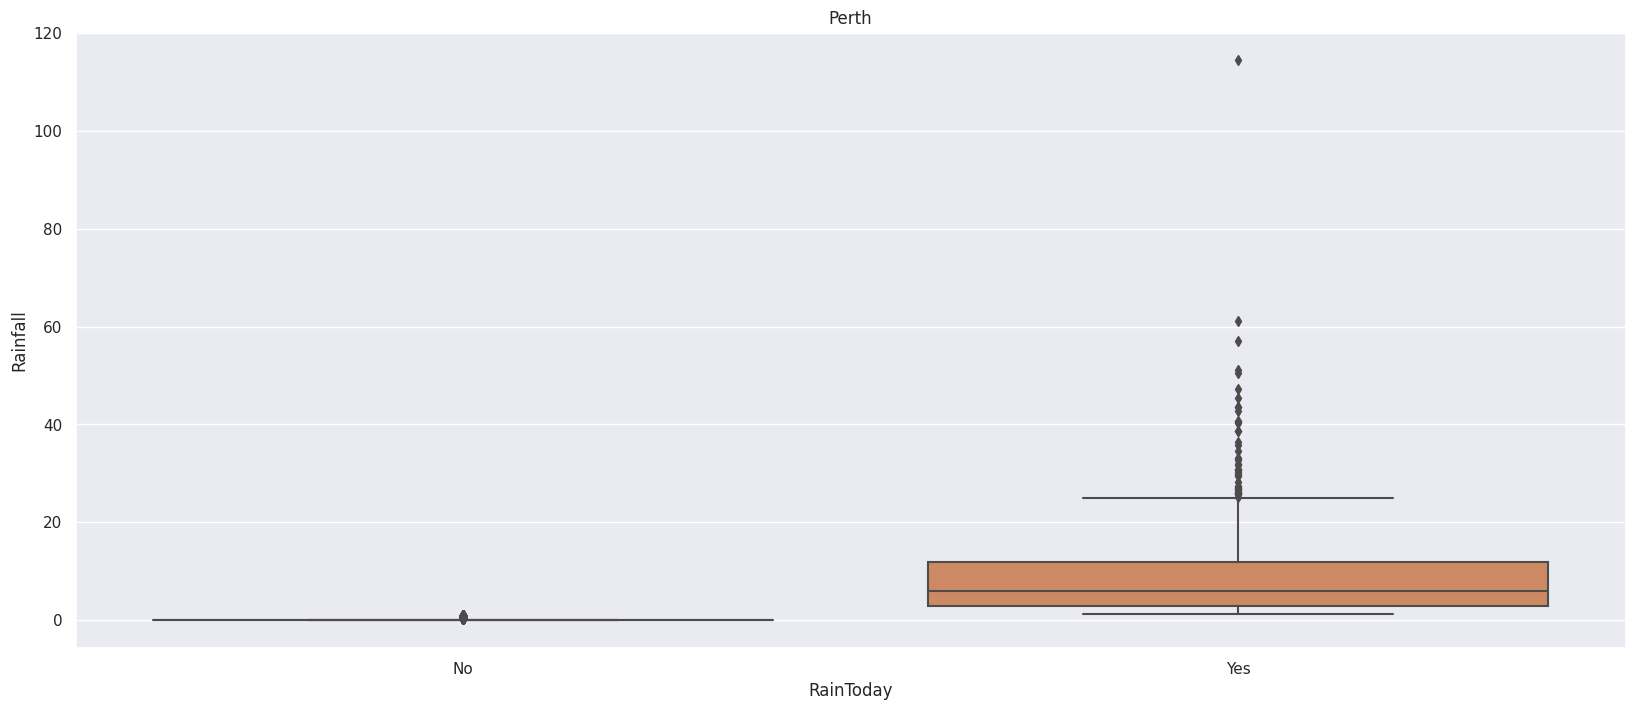

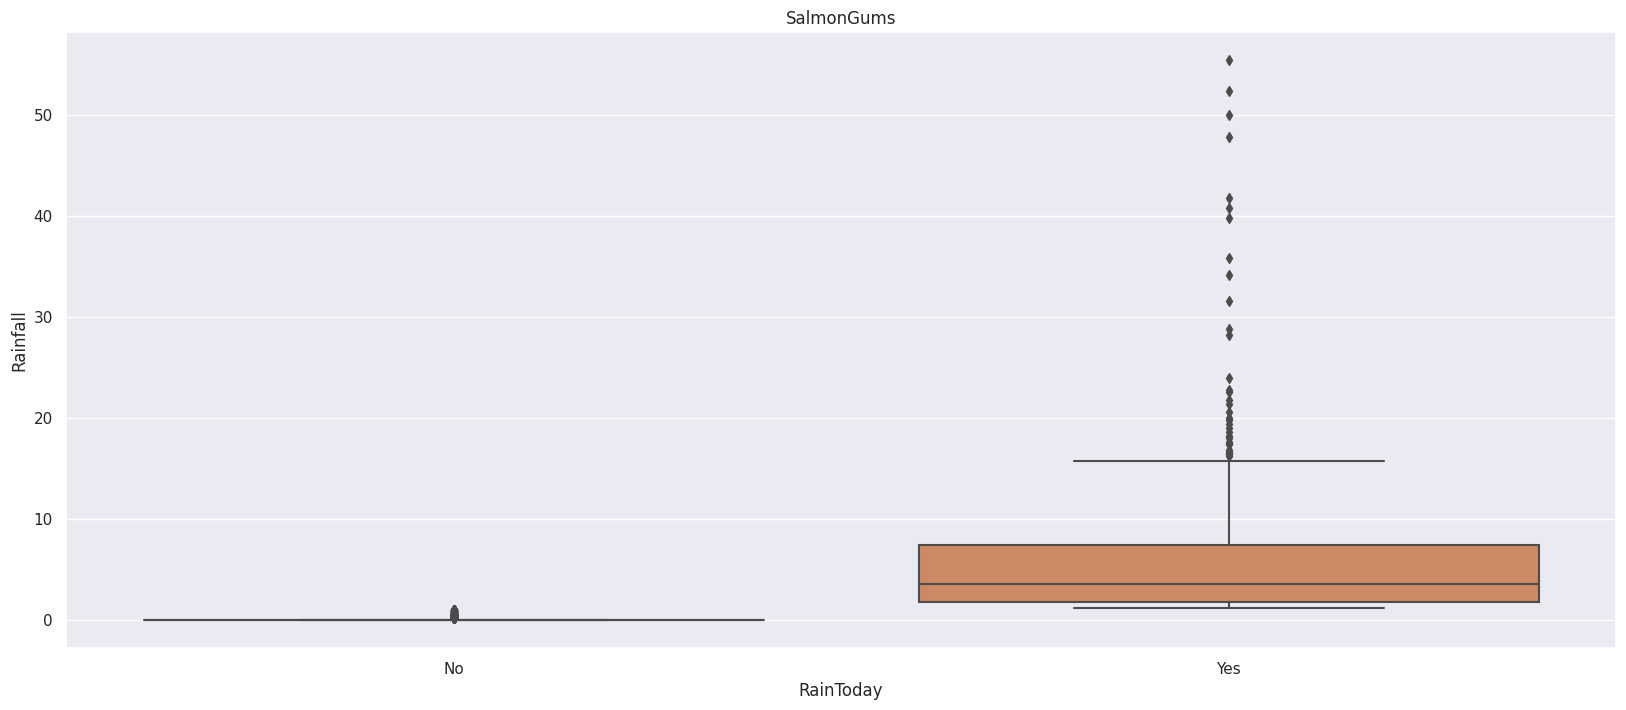

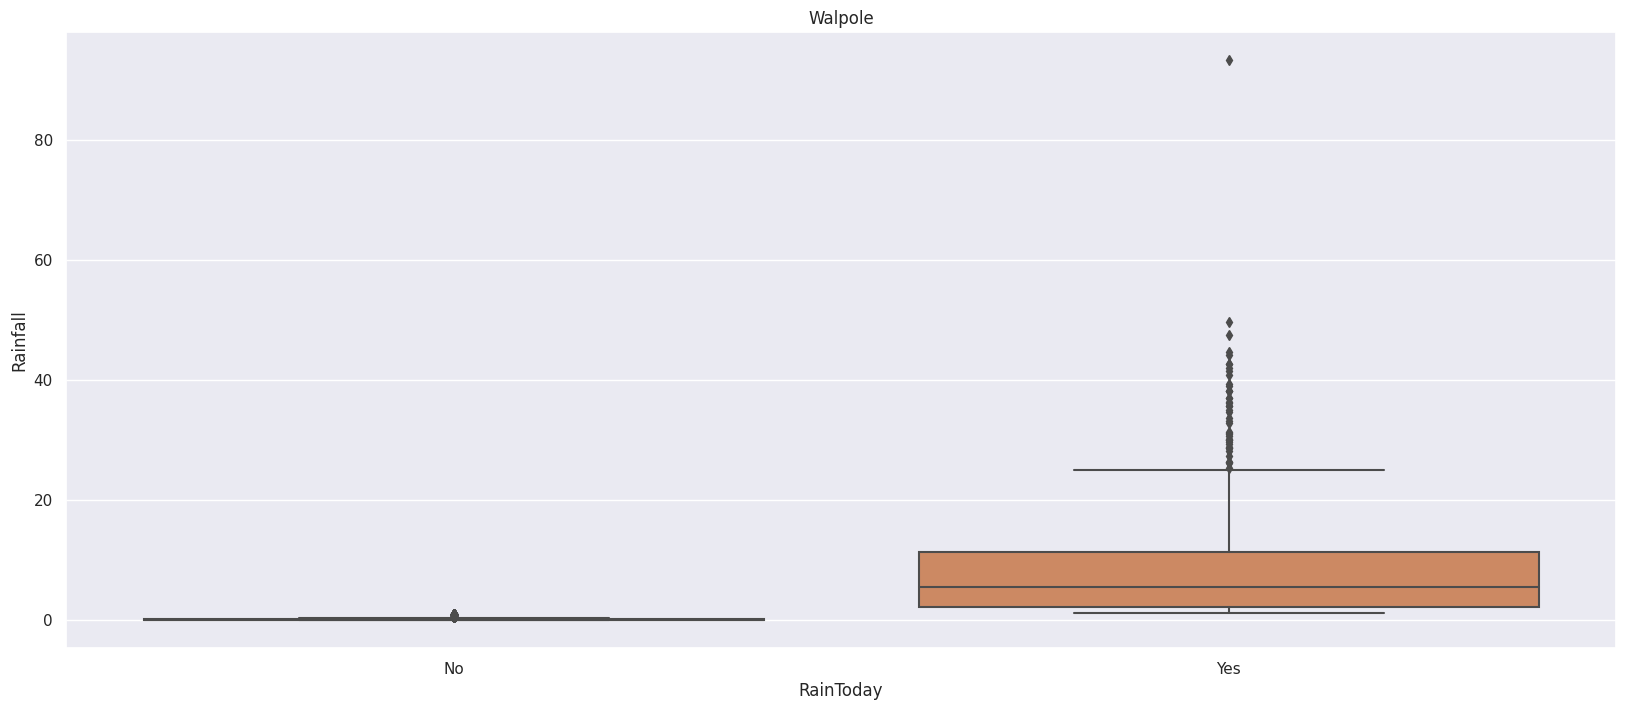

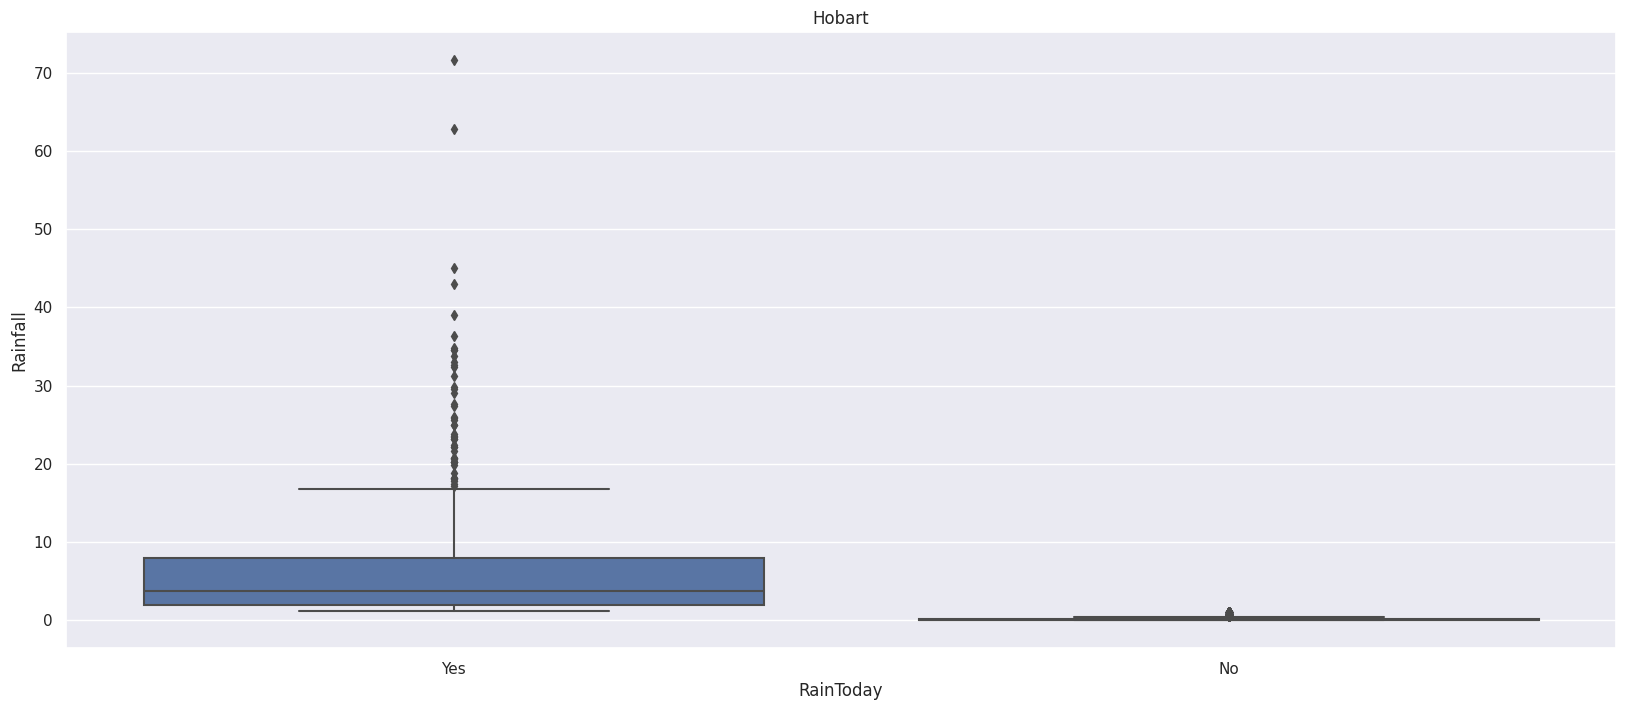

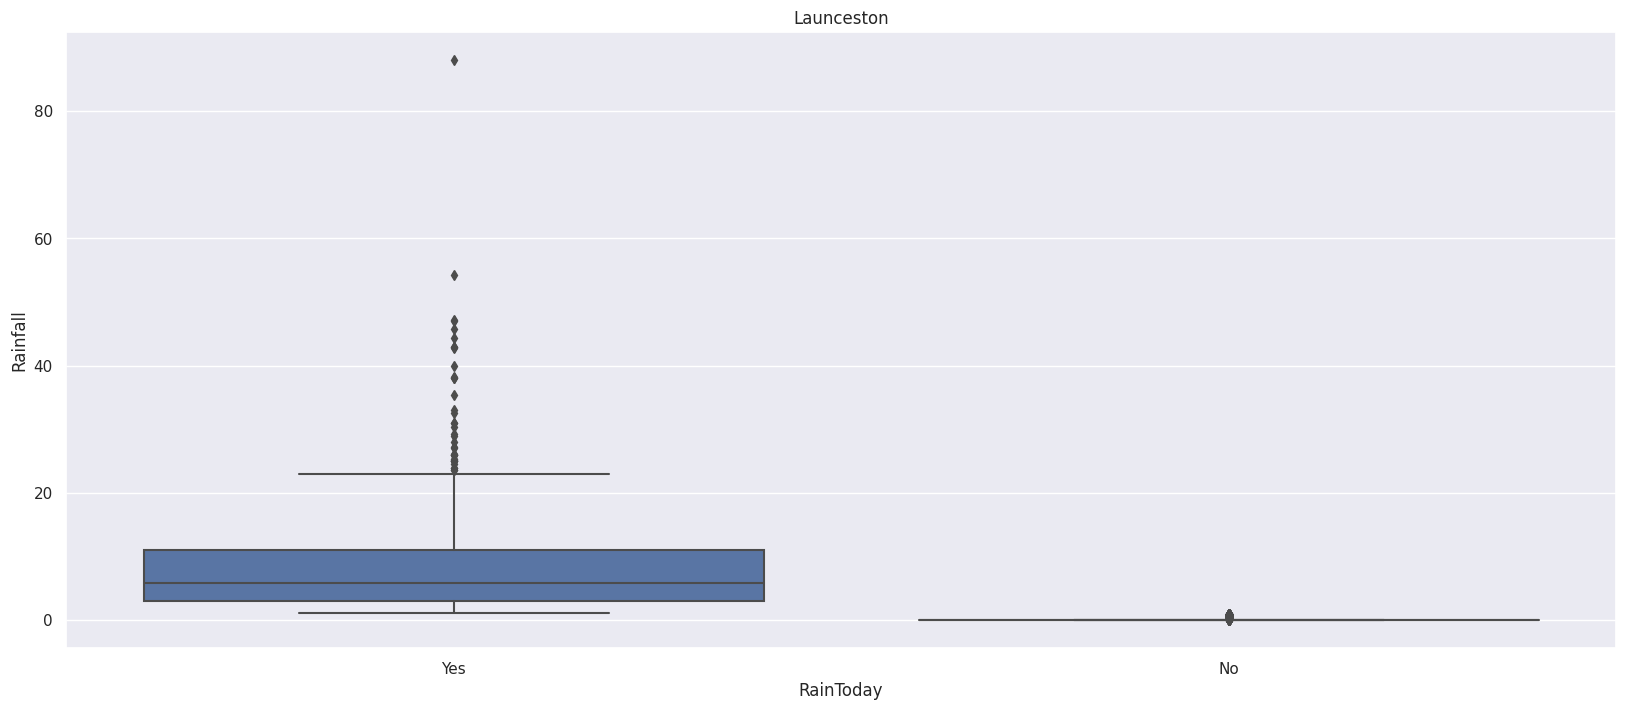

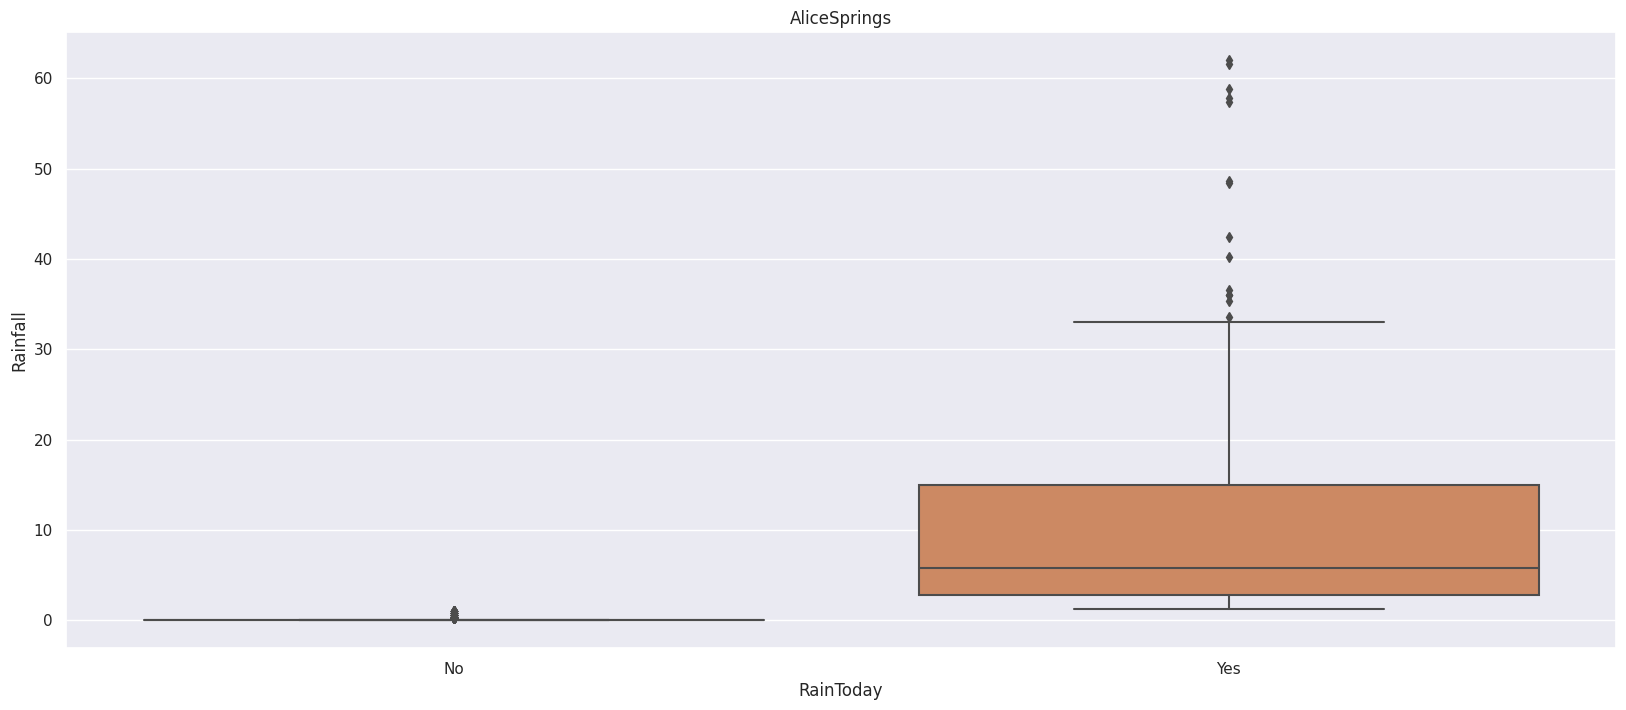

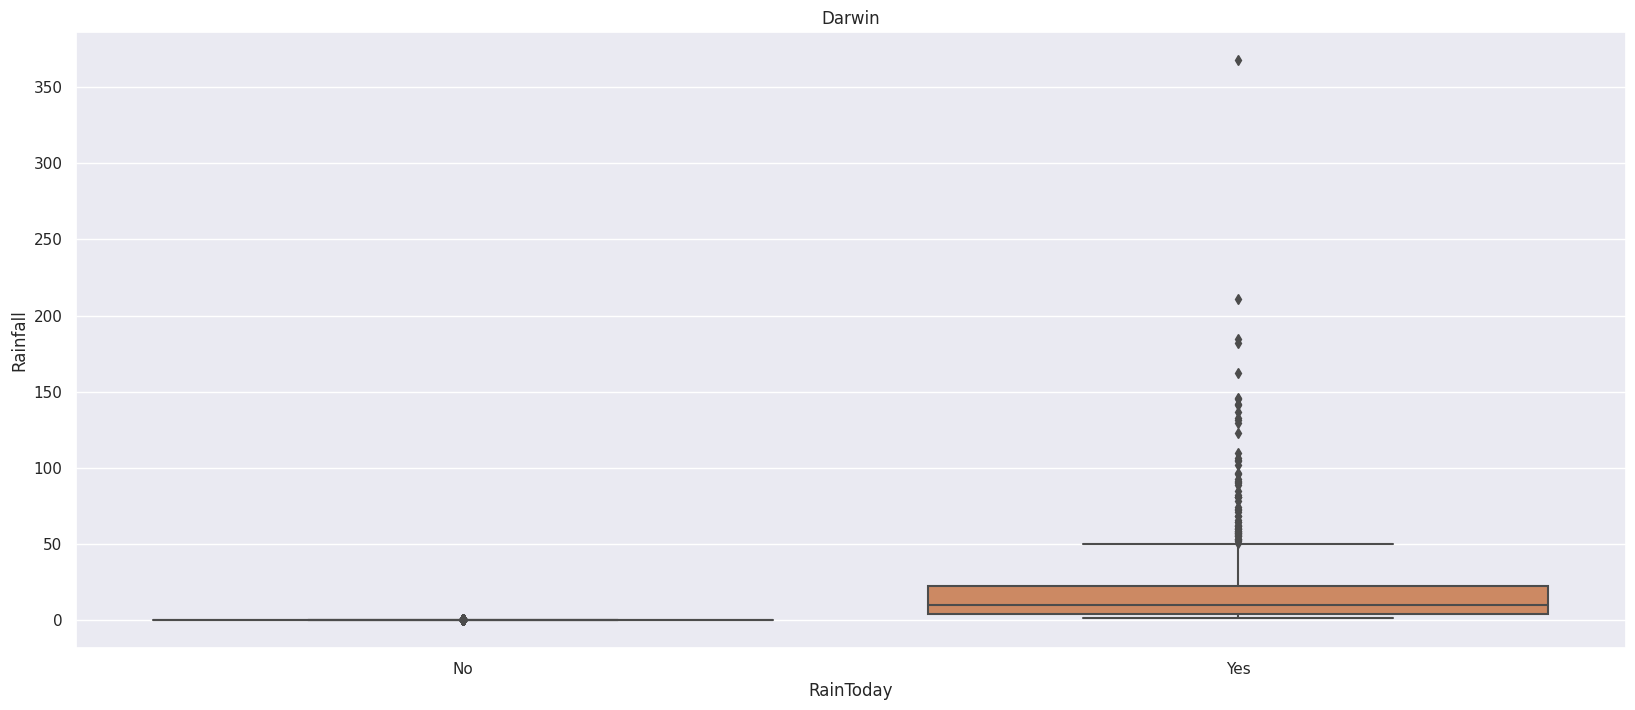

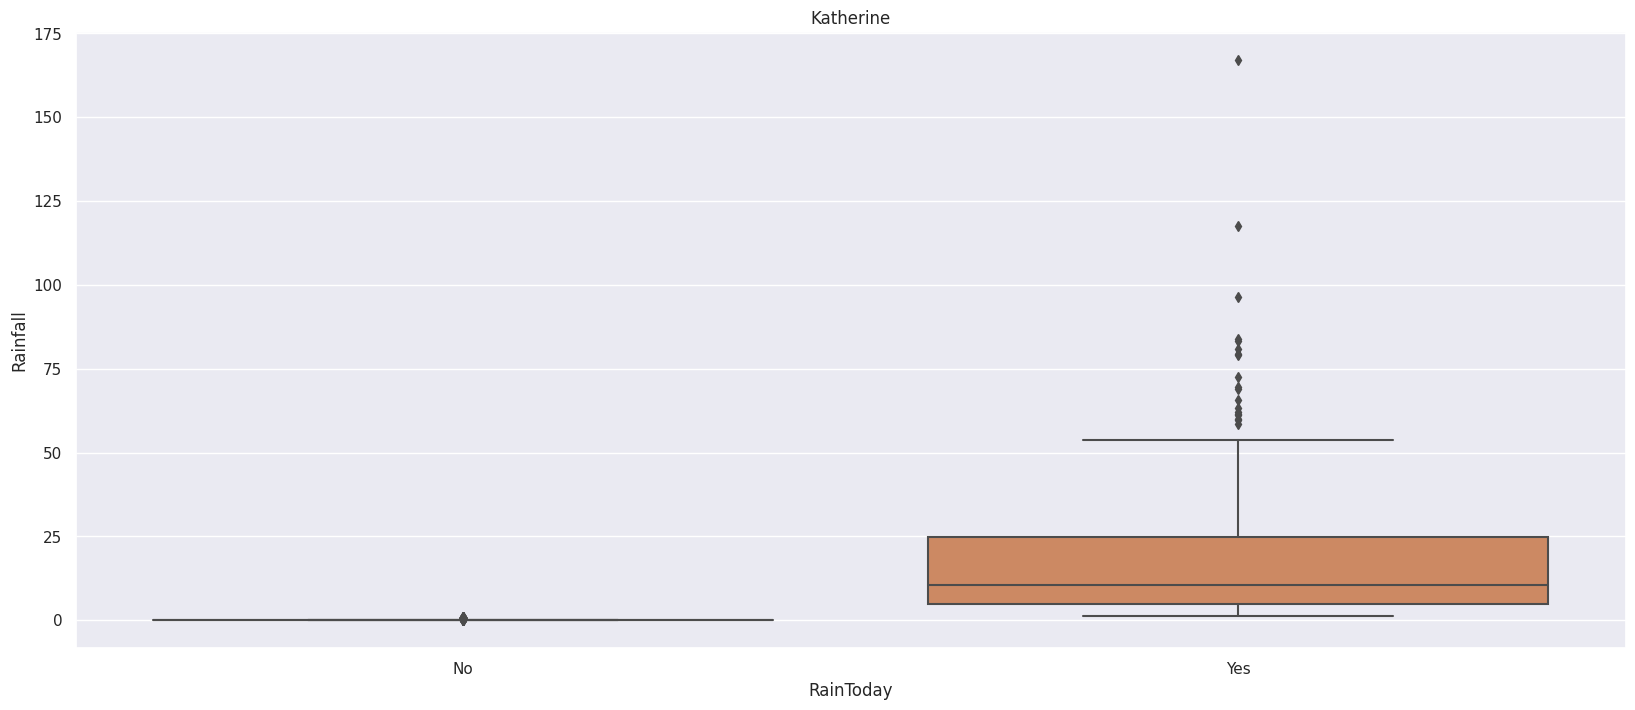

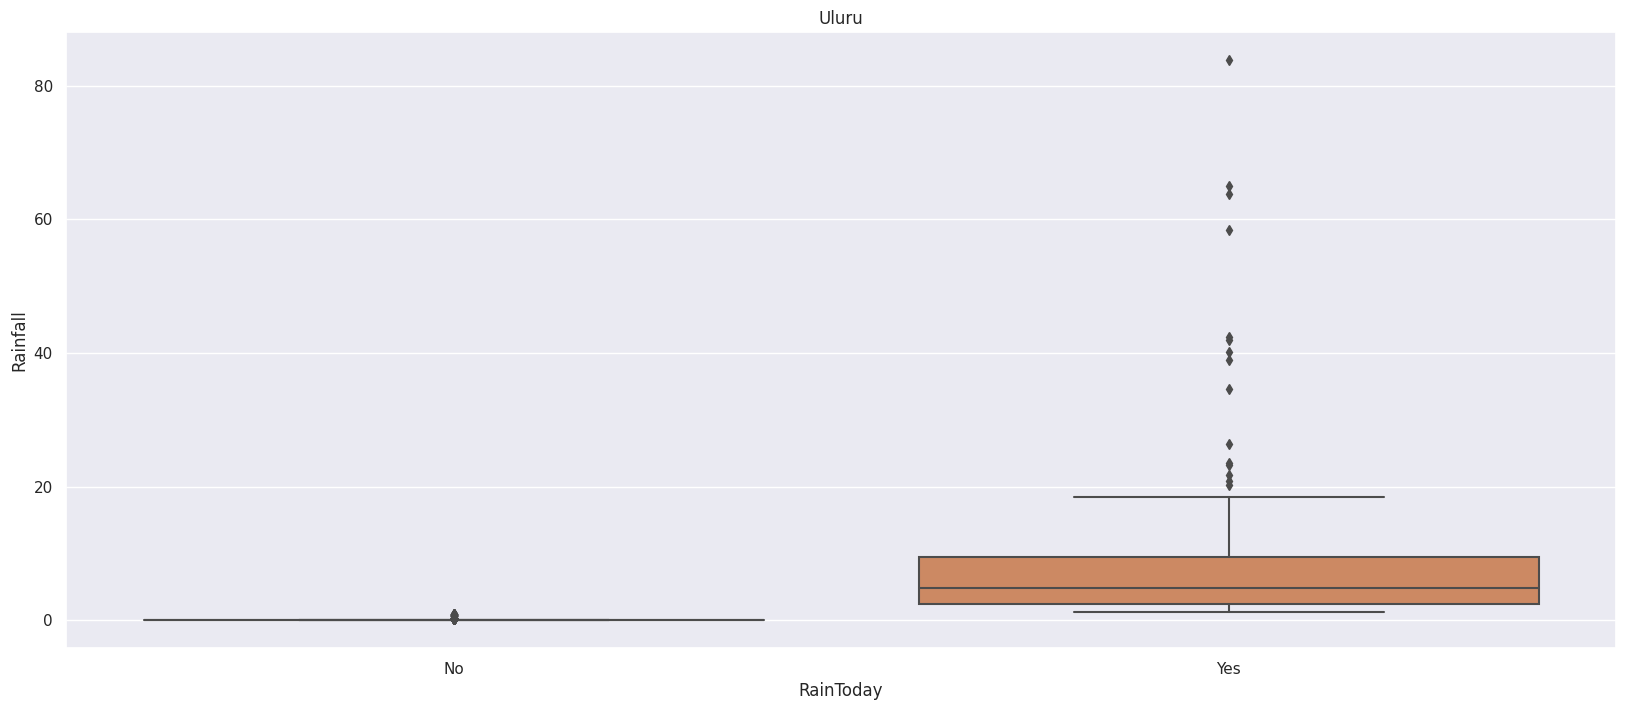

In [ ]:
for location in df['Location'].unique():
    location_data = df[df['Location'] == location]
    # Vẽ biểu đồ scatter plot
    plt.figure(figsize=(20,8),facecolor='white')
    sns.boxplot(data=location_data,x='RainToday',y='Rainfall')
    plt.xlabel('RainToday')
    plt.ylabel('Rainfall')
    plt.title(location)
    plt.show()

<ipython-input-148-751eebd7d4ae>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-148-751eebd7d4ae>:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



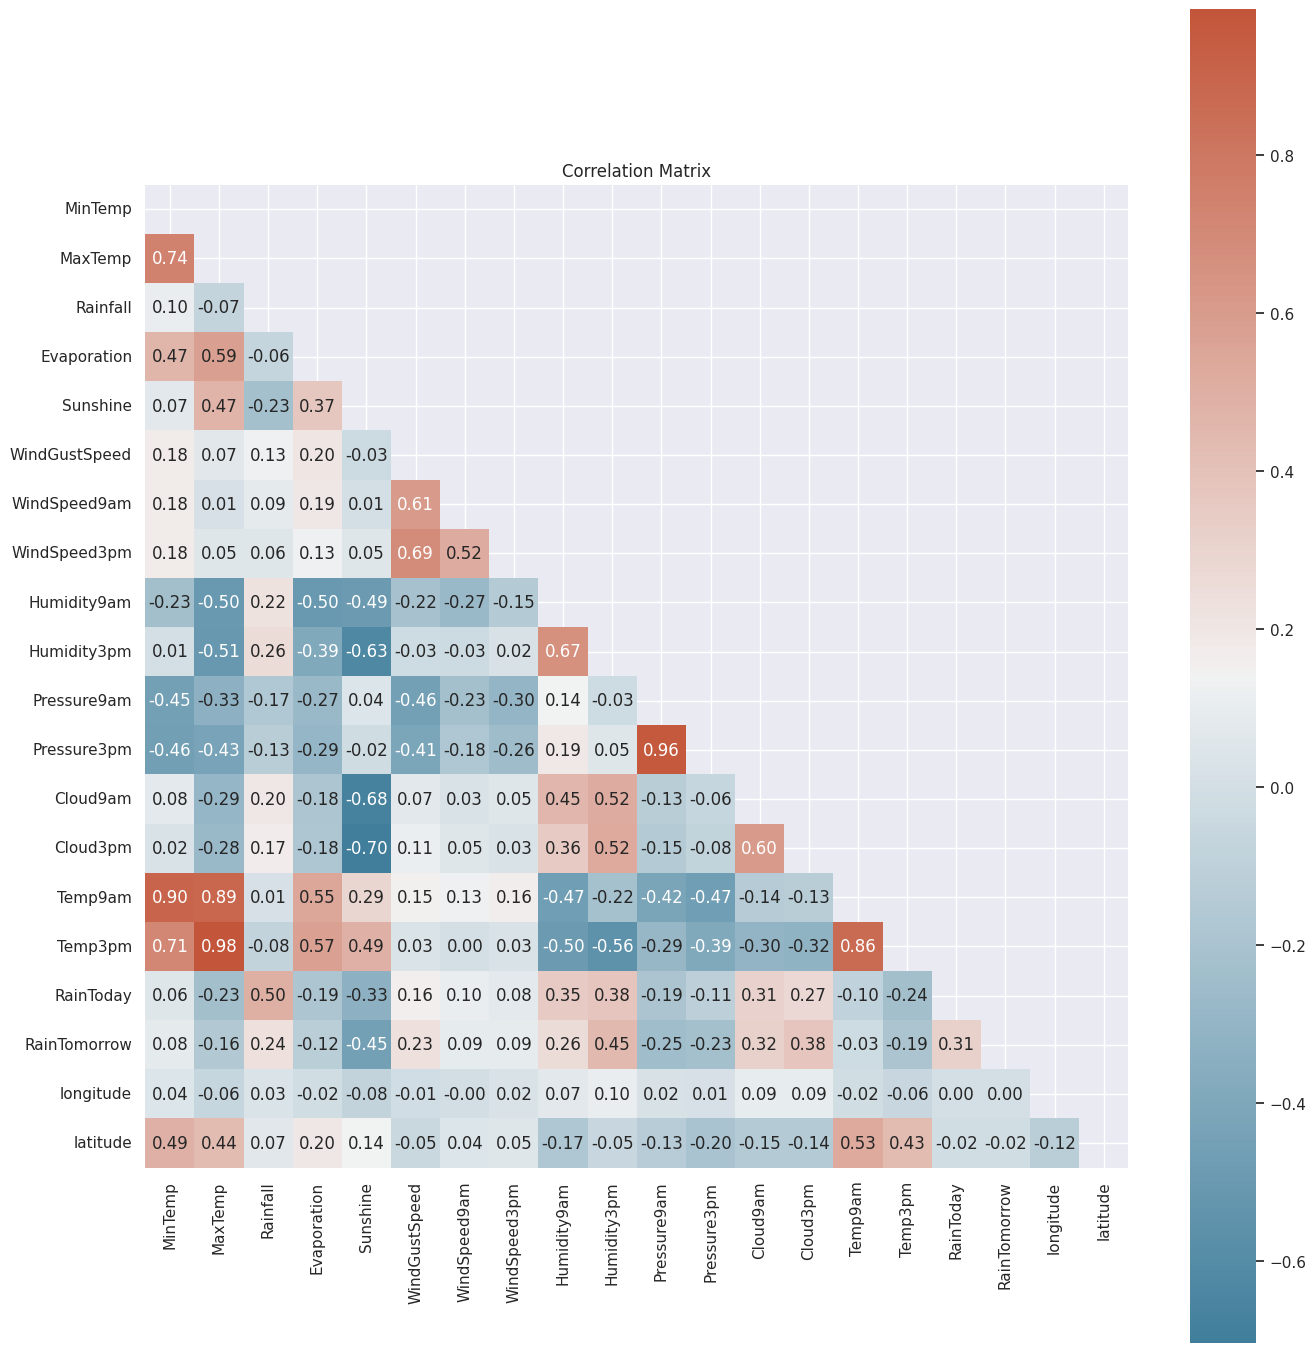

In [ ]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

# Creating a mask to block the top right half of the heatmap (redundant information)
mask = np.triu(np.ones_like(data.corr()))

# Custom color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()
plt.savefig('/content/sample_data/corr_heatmap.png', facecolor='white', dpi=100);

**Nhận xét :**


*   Nhìn vào biểu đồ Heatmap, ta thấy biến RainTomorrow có tương quan đến biến Humidity3pm là cao nhất
*   RainToday có tương quan đến biến Rainfall, Humidity. Trong đó, Rainfall cao nhất



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# hàm tạo thuộc tính
def create_features(df):
    df = df.copy()
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    return df

#hàm tạo dataframe theo từng vùng lưu trữ dưới dạng dictionary
def create_df_dictionary(df, group_column):
    df_by_location = {}
    grouped_df = df.groupby(group_column)

    for location, location_df in grouped_df:
        df_by_location[location] = location_df

    return df_by_location

#hàm đếm số dòn null cảu dataframe theo vùng
def create_null_counts_df(df_by_location):
    null_counts = {}

    for location, location_df in df_by_location.items():
        null_counts[location] = location_df.isna().sum()

    null_counts_df = pd.DataFrame(null_counts)

    return null_counts_df

#hàm tính số phần trăm bị null
def create_null_counts_percentage_df(df_by_location):
    null_counts = {}

    for location, location_df in df_by_location.items():
        null_counts[location] = 100 * location_df.isna().sum() / len(location_df)

    null_counts_df = pd.DataFrame(null_counts)

    return null_counts_df

df = create_features(df)


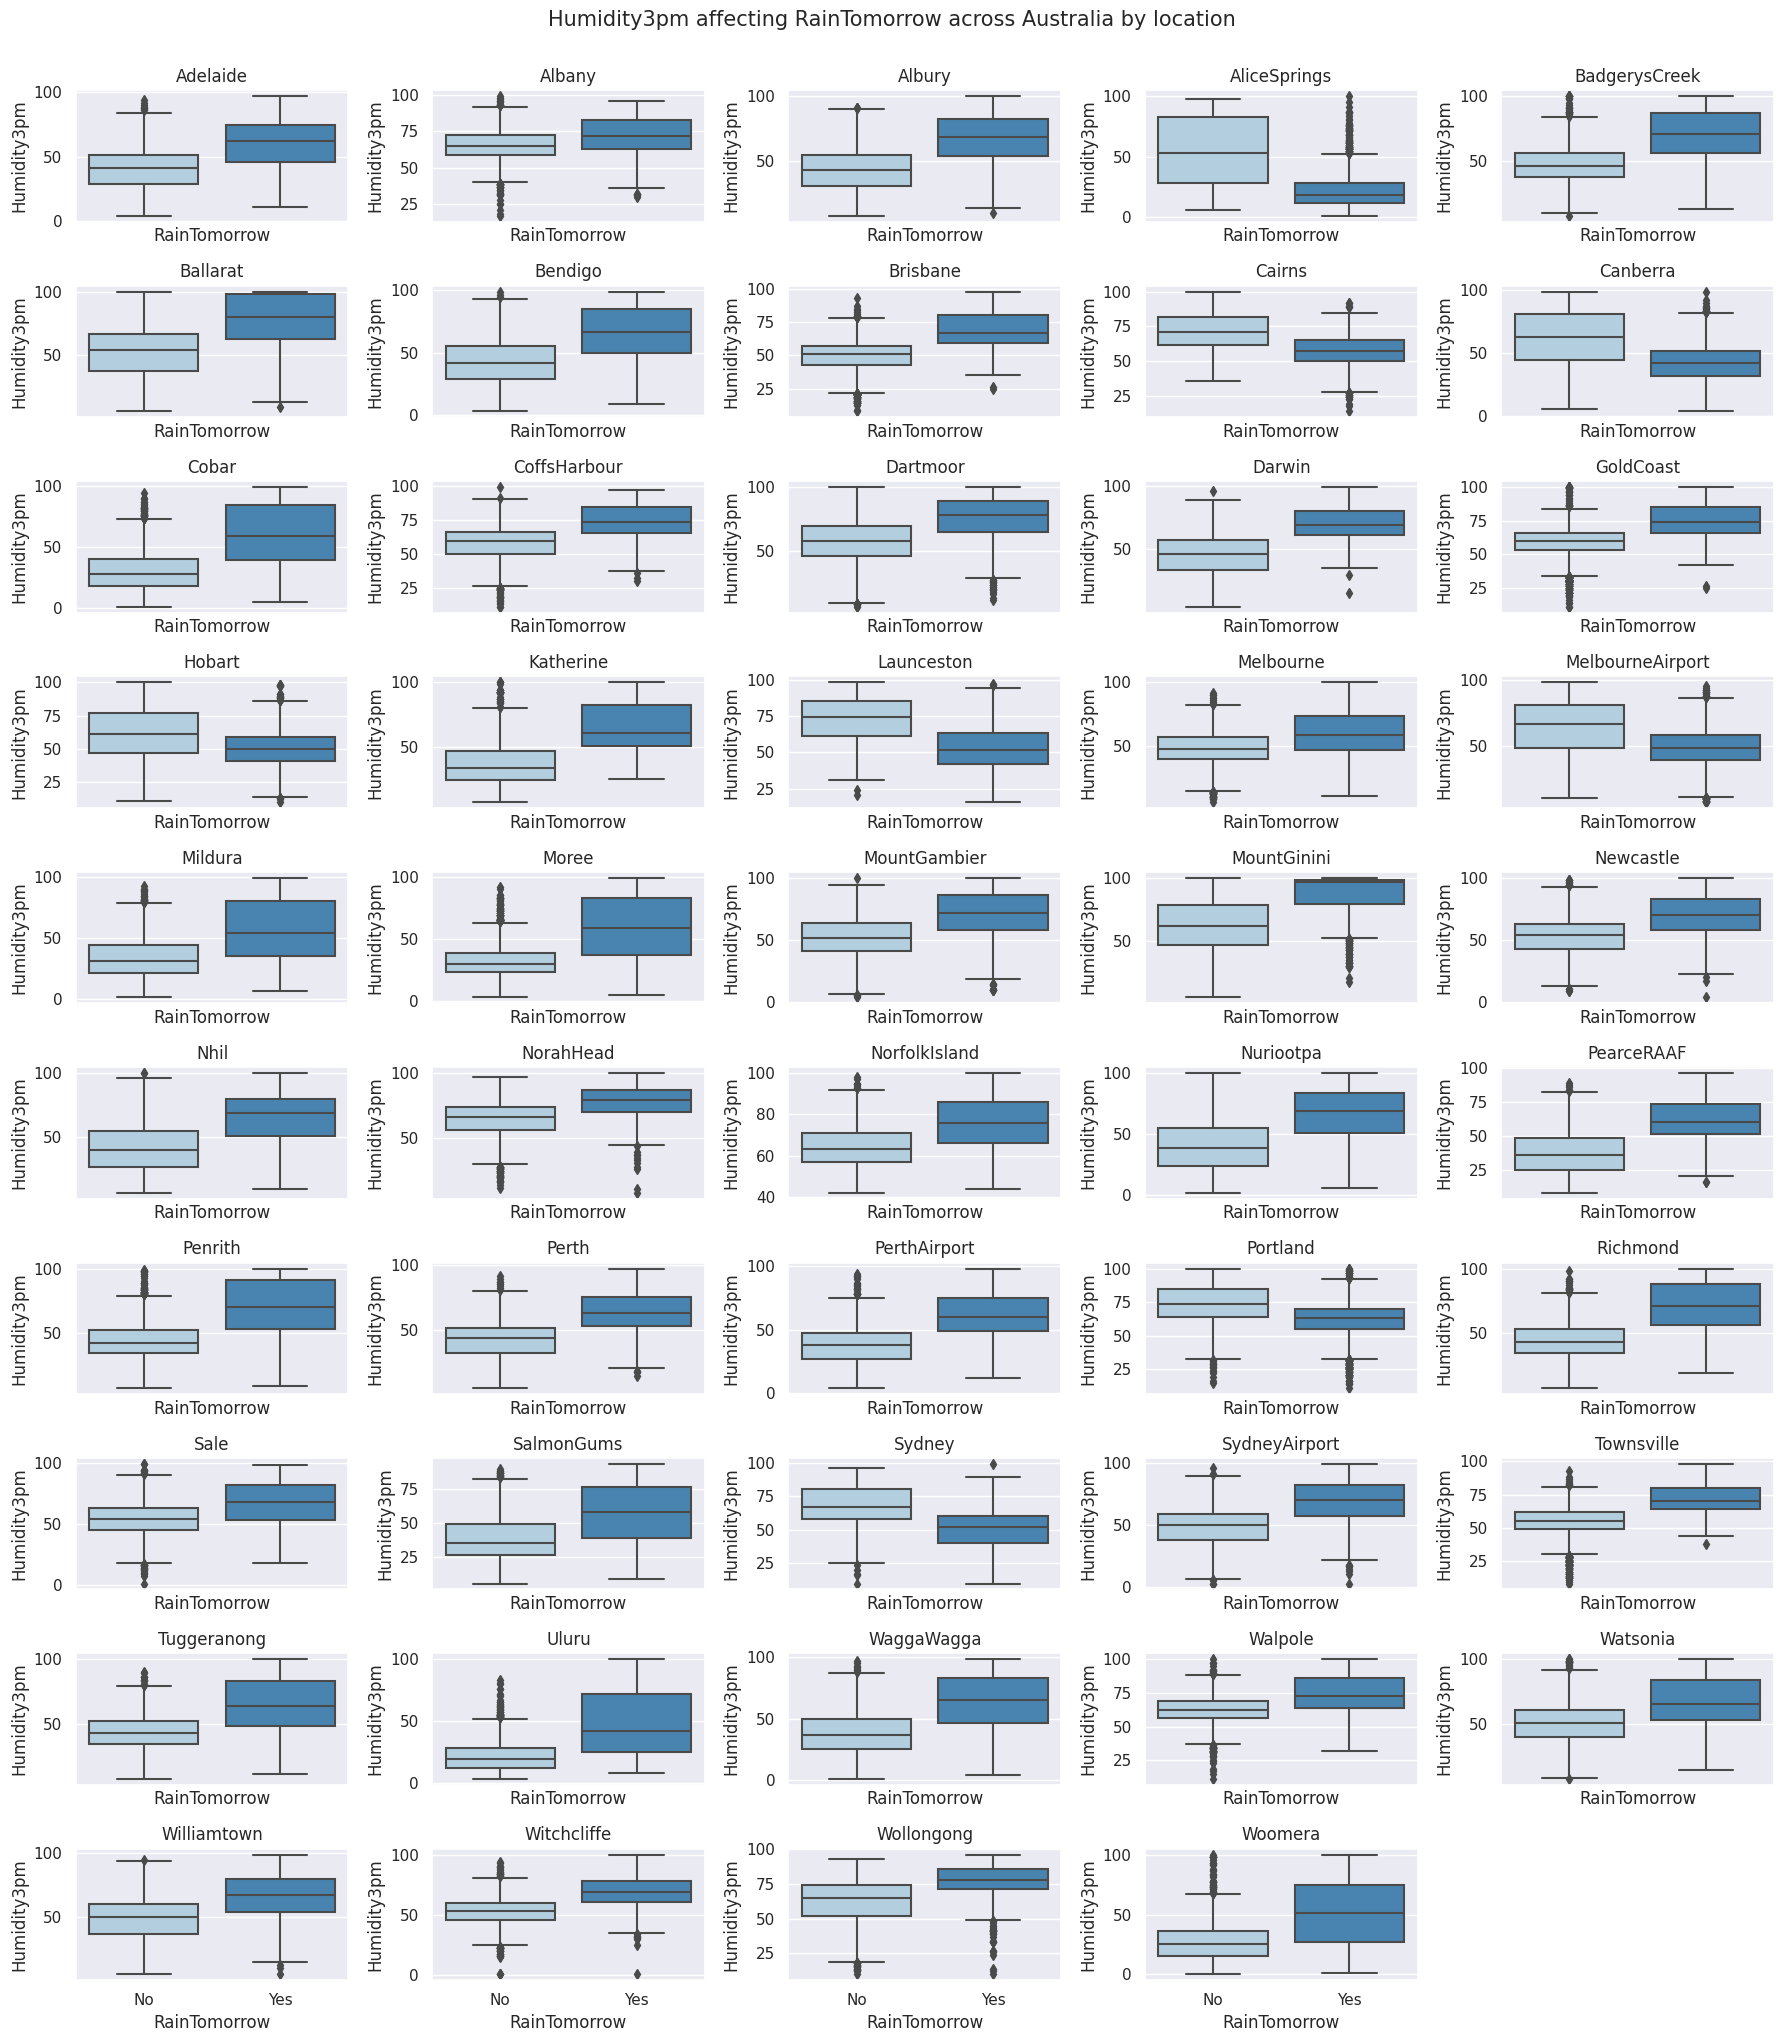

In [ ]:
# Let us see how humidity at 3pm affects rain tomorrow.
#
import warnings
locations = sorted(df['Location'].unique())
fig, axes = plt.subplots(10,5, figsize = (18,20), sharex=True, sharey=False)
axes_ = axes.flat
#Remove last 1 blank axes from the figure.
for i in [-1]:
    fig.delaxes(axes_[i])

feature_name = 'Humidity3pm'   # Our feature has to be numeric
# Change this to numeric feature of your choice that you want to examine

with warnings.catch_warnings():  # ignore the Numpy nan warnings.
    warnings.simplefilter("ignore")
    for i, location in enumerate(locations):
        sns.boxplot(data = df[df.Location == location], x = 'RainTomorrow', y = feature_name, hue_order=['No','Yes'],palette = 'Blues', ax=axes_[i])
        axes_[i].set_title(location)
    plt.tight_layout()
plt.suptitle(f"{feature_name} affecting RainTomorrow across Australia by location", fontsize=15, y=1.02);

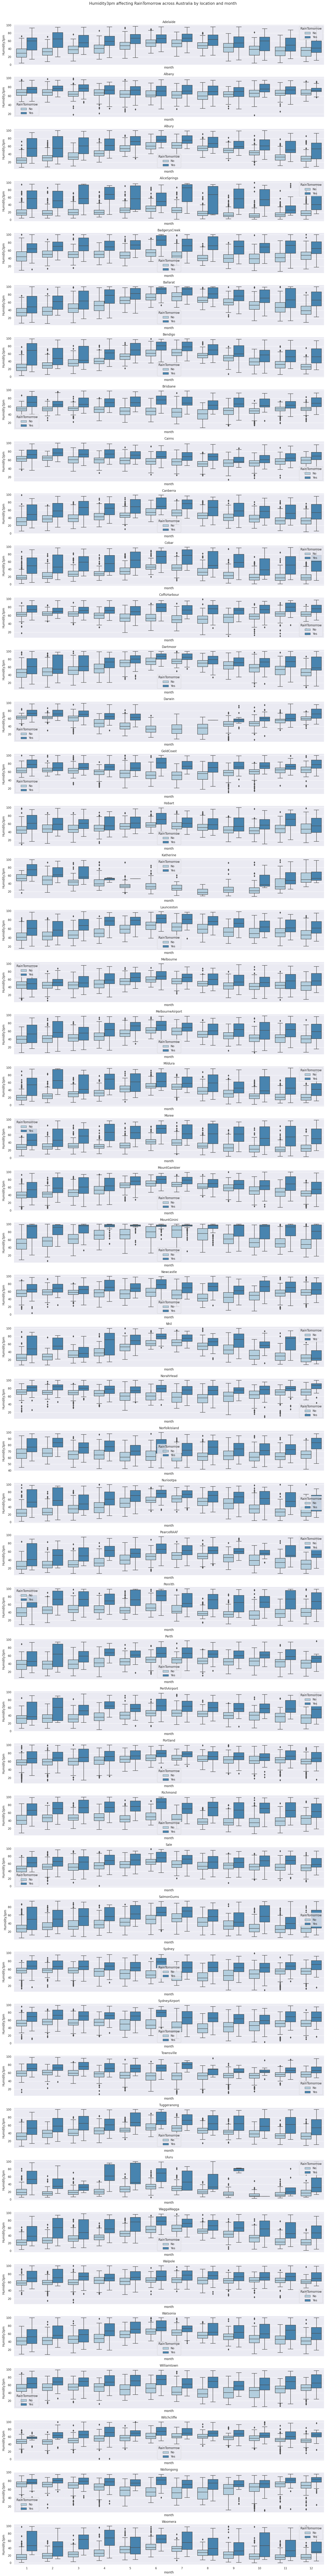

In [ ]:
# Let us see how humidity at 3pm affects rain tomorrow.
#
fig, axes = plt.subplots(49,1, figsize = (18,140), sharex=True, sharey=False)
axes_ = axes.flat

feature_name = 'Humidity3pm'   # Our feature has to be numeric
# Change this to numeric feature of your choice that you want to examine

with warnings.catch_warnings():  # ignore the Numpy nan warnings.
    warnings.simplefilter("ignore")
    for i, location in enumerate(locations[:]):
        sns.boxplot(data = df[df.Location == location], hue = 'RainTomorrow', x = 'month', y = feature_name, hue_order=['No','Yes'], palette = 'Blues', ax=axes_[i])
        axes_[i].set_title(location)
    plt.tight_layout()
plt.suptitle(f"{feature_name} affecting RainTomorrow across Australia by location and month", fontsize=15, y=1.006);

# **DATA PREPROCESSING**

In [ ]:
df_by_location = create_df_dictionary(df, 'Location')
df = create_features(df)
null_counts_df = create_null_counts_df(df_by_location)
null_counts_percentage_df = create_null_counts_percentage_df(df_by_location)

In [ ]:
row_counts = {}

# Lặp qua từng cặp key-value trong từ điển df_by_location
for location, location_df in df_by_location.items():
    # Đếm số lượng hàng trong mỗi dataframe
    row_counts[location] = location_df.shape[0]

# Tạo dataframe từ từ điển row_counts
row_counts_df = pd.DataFrame({'Location': list(row_counts.keys()), 'Row Count': list(row_counts.values())})
row_counts_df

Location  Row Count
0           Adelaide       3193
1             Albany       3040
2             Albury       3040
3       AliceSprings       3040
4      BadgerysCreek       3009
5           Ballarat       3040
6            Bendigo       3040
7           Brisbane       3193
8             Cairns       3040
9           Canberra       3436
10             Cobar       3009
11      CoffsHarbour       3009
12          Dartmoor       3009
13            Darwin       3193
14         GoldCoast       3040
15            Hobart       3193
16         Katherine       1578
17        Launceston       3040
18         Melbourne       3193
19  MelbourneAirport       3009
20           Mildura       3009
21             Moree       3009
22      MountGambier       3040
23       MountGinini       3040
24         Newcastle       3039
25              Nhil       1578
26         NorahHead       3004
27     NorfolkIsland       3009
28         Nuriootpa       3009
29        PearceRAAF       3009
30           Penrith       3039
31             Perth       3193
32      PerthAirport       3009
33          Portland       3009
34          Richmond       3009
35              Sale       3009
36        SalmonGums       3001
37            Sydney       3344
38     SydneyAirport       3009
39        Townsville       3040
40       Tuggeranong       3039
41             Uluru       1578
42        WaggaWagga       3009
43           Walpole       3006
44          Watsonia       3009
45       Williamtown       3009
46       Witchcliffe       3009
47        Wollongong       3040
48           Woomera       3009

In [ ]:
null_counts_percentage_df

Adelaide      Albany      Albury  AliceSprings  \
Date             0.000000    0.000000    0.000000      0.000000   
Location         0.000000    0.000000    0.000000      0.000000   
MinTemp          0.062637    2.072368    0.361842      0.032895   
MaxTemp          0.093956    1.776316    0.361842      0.065789   
Rainfall         3.194488    0.789474    0.953947      0.263158   
Evaporation     46.633260    9.539474  100.000000      7.072368   
Sunshine        44.597557   17.105263  100.000000     17.105263   
WindGustDir      0.814281  100.000000    1.052632      1.677632   
WindGustSpeed    0.814281  100.000000    1.052632      1.677632   
WindDir9am       8.581272    8.125000   17.269737      7.565789   
WindDir3pm       0.501096   25.756579    1.513158      0.131579   
WindSpeed9am     0.156593    2.006579    0.296053      0.065789   
WindSpeed3pm     0.156593   24.111842    0.361842      0.065789   
Humidity9am      0.156593    1.611842    0.296053      0.098684   
Humidity3pm      0.156593   23.552632    0.263158      0.164474   
Pressure9am      0.250548    0.822368    0.164474      0.032895   
Pressure3pm      0.219230    0.822368    0.263158      0.098684   
Cloud9am       100.000000    1.250000   57.598684     10.986842   
Cloud3pm       100.000000   23.388158   53.059211     11.875000   
Temp9am          0.156593    1.282895    0.296053      0.000000   
Temp3pm          0.125274   23.421053    0.263158      0.065789   
RainToday        3.194488    0.789474    0.953947      0.263158   
RainTomorrow     3.225806    0.789474    0.953947      0.296053   
quarter          0.000000    0.000000    0.000000      0.000000   
month            0.000000    0.000000    0.000000      0.000000   
year             0.000000    0.000000    0.000000      0.000000   

               BadgerysCreek    Ballarat     Bendigo  Brisbane     Cairns  \
Date                0.000000    0.000000    0.000000  0.000000   0.000000   
Location            0.000000    0.000000    0.000000  0.000000   0.000000   
MinTemp             1.196411    0.032895    0.065789  0.281867   0.032895   
MaxTemp             0.963775    0.032895    0.164474  0.438459   0.000000   
Rainfall            2.691924    0.394737    0.197368  1.002192   1.710526   
Evaporation       100.000000  100.000000   61.019737  0.595052  12.171053   
Sunshine          100.000000  100.000000  100.000000  1.534607  15.657895   
WindGustDir         2.525756    1.019737    1.348684  1.284059   0.625000   
WindGustSpeed       2.525756    1.019737    1.315789  1.284059   0.592105   
WindDir9am         14.456630    2.993421    8.026316  2.192296   1.414474   
WindDir3pm          2.824859    0.592105    1.414474  1.064829   0.131579   
WindSpeed9am        1.628448    0.263158    0.131579  0.031319   0.032895   
WindSpeed3pm        1.595214    0.131579    0.131579  0.250548   0.032895   
Humidity9am         1.794616    0.690789    0.230263  0.125274   0.032895   
Humidity3pm         1.827850    0.230263    0.065789  0.469778   0.000000   
Pressure9am         5.583250    0.789474    0.493421  0.031319   0.032895   
Pressure3pm         5.749418    0.855263    0.328947  0.250548   0.000000   
Cloud9am          100.000000   17.960526   31.842105  0.031319   6.809211   
Cloud3pm          100.000000   34.473684   25.394737  0.062637   7.565789   
Temp9am             1.362579    0.394737    0.098684  0.125274   0.032895   
Temp3pm             1.462280    0.197368    0.065789  0.469778   0.000000   
RainToday           2.691924    0.394737    0.197368  1.002192   1.710526   
RainTomorrow        2.691924    0.394737    0.197368  1.002192   1.710526   
quarter             0.000000    0.000000    0.000000  0.000000   0.000000   
month               0.000000    0.000000    0.000000  0.000000   0.000000   
year                0.000000    0.000000    0.000000  0.000000   0.000000   

                Canberra  ...  Townsville  Tuggeranong       Uluru  \
Date            0.000000  ...    0.000000     0.000000   

**Nhận xét :**

*   Từ bảng trên, quyết định xóa những thuộc tính bị null quá nhiều không thể xử lý được Evaporation, Sunshine, Cloud9am, Cloud3pm




In [ ]:
df.drop(columns=['Cloud9am','Cloud3pm','Sunshine','Evaporation'], inplace=True)
df_by_location = create_df_dictionary(df, 'Location')

In [ ]:
df.shape

(145460, 22)

## **HANDING MISSING VALUE NUMERICAL**

In [ ]:
#null numerical columns
numerical_null = [var for var in df.columns if df[var].dtype !='O' and df[var].isnull().sum() != 0]
numerical_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
for location, location_df in df_by_location.items():
    for col in numerical_null:
        # Đếm các giá trị của từng cột theo tháng và năm
        counts_per_month = location_df.groupby(['year', 'month', col]).size().reset_index(name='Counts')
        # Đổi tên cột để tránh trùng lặp
        counts_per_month = counts_per_month.rename(columns={col: f'{col}Count'})
        # Sắp xếp lại và chọn ra giá trị xuất hiện nhiều nhất theo từng tháng và năm
        most_common_col_per_month = counts_per_month.sort_values(by=['year', 'month', 'Counts'], ascending=[True, True, False]).groupby(['year', 'month']).first().reset_index()
        # Ghép dataframe và cột giá trị xuất hiện nhiều nhất dựa trên tháng và năm
        location_df = location_df.merge(most_common_col_per_month[['year', 'month', f'{col}Count']], on=['year', 'month'], how='left')
        # Fill NaN
        location_df[col] = location_df[col].fillna(location_df[f'{col}Count'])
        # Xóa đi cột giá trị xuất hiện nhiều nhất theo từng tháng và năm sau khi đã sử dụng
        location_df = location_df.drop(f'{col}Count', axis=1)
        # Lưu lại dataframe
        df_by_location[location] = location_df

## **HANDING MISSING VALUE CATEGORICAL**

In [ ]:
categorical_null = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for location, location_df in df_by_location.items():
    for col in categorical_null:
        # Đếm các giá trị của từng cột theo tháng và năm
        counts_per_month = location_df.groupby(['year', 'month', col]).size().reset_index(name='Counts')
        # Đổi tên cột để tránh trùng lặp
        counts_per_month = counts_per_month.rename(columns={col: f'{col}Count'})
        # Sắp xếp lại và chọn ra giá trị xuất hiện nhiều nhất theo từng tháng và năm
        most_common_col_per_month = counts_per_month.sort_values(by=['year', 'month', 'Counts'], ascending=[True, True, False]).groupby(['year', 'month']).first().reset_index()
        # Ghép dataframe và cột giá trị xuất hiện nhiều nhất dựa trên tháng và năm
        location_df = location_df.merge(most_common_col_per_month[['year', 'month', f'{col}Count']], on=['year', 'month'], how='left')
        # Fill NaN
        location_df[col] = location_df[col].fillna(location_df[f'{col}Count'])
        # Xóa đi cột giá trị xuất hiện nhiều nhất theo từng tháng và năm sau khi đã sử dụng
        location_df = location_df.drop(f'{col}Count', axis=1)
        # Lưu lại dataframe
        df_by_location[location] = location_df

In [ ]:
for location, location_df in df_by_location.items():
    location_df['RainToday'] = location_df['RainToday'].fillna('Yes')
    df_by_location[location] = location_df

In [ ]:
null_counts_percentage_df1 = create_null_counts_percentage_df(df_by_location)
null_counts_percentage_df1

Adelaide      Albany    Albury  AliceSprings  BadgerysCreek  \
Date           0.000000    0.000000  0.000000      0.000000       0.000000   
Location       0.000000    0.000000  0.000000      0.000000       0.000000   
MinTemp        0.000000    0.000000  0.000000      0.000000       0.000000   
MaxTemp        0.000000    0.000000  0.000000      0.000000       0.000000   
Rainfall       0.000000    0.000000  0.000000      0.000000       0.000000   
WindGustDir    0.000000  100.000000  0.000000      0.000000       0.000000   
WindGustSpeed  0.000000  100.000000  0.000000      0.000000       0.000000   
WindDir9am     0.000000    0.000000  0.000000      0.000000       0.000000   
WindDir3pm     0.000000   22.861842  0.000000      0.000000       0.000000   
WindSpeed9am   0.000000    0.000000  0.000000      0.000000       0.000000   
WindSpeed3pm   0.000000   22.861842  0.000000      0.000000       0.000000   
Humidity9am    0.000000    0.000000  0.000000      0.000000       0.000000   
Humidity3pm    0.000000   22.861842  0.000000      0.000000       0.000000   
Pressure9am    0.000000    0.000000  0.000000      0.000000       3.057494   
Pressure3pm    0.000000    0.000000  0.000000      0.000000       3.057494   
Temp9am        0.000000    0.000000  0.000000      0.000000       0.000000   
Temp3pm        0.000000   22.861842  0.000000      0.000000       0.000000   
RainToday      0.000000    0.000000  0.000000      0.000000       0.000000   
RainTomorrow   3.225806    0.789474  0.953947      0.296053       2.691924   
quarter        0.000000    0.000000  0.000000      0.000000       0.000000   
month          0.000000    0.000000  0.000000      0.000000       0.000000   
year           0.000000    0.000000  0.000000      0.000000       0.000000   

               Ballarat   Bendigo  Brisbane    Cairns  Canberra  ...  \
Date           0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Location       0.000000  0.000000  0.000000  0.000000  0.000000  ...   
MinTemp        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
MaxTemp        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Rainfall       0.000000  0.000000  0.000000  0.000000  0.000000  ...   
WindGustDir    0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindGustSpeed  0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindDir9am     0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindDir3pm     0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindSpeed9am   0.000000  0.000000  0.000000  0.000000  6.169965  ...   
WindSpeed3pm   0.000000  0.000000  0.000000  0.000000  6.169965  ...   
Humidity9am    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Humidity3pm    0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Pressure9am    0.000000  0.000000  0.000000  0.000000  6.169965  ...   
Pressure3pm    0.000000  0.000000  0.000000  0.000000  6.169965  ...   
Temp9am        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
Temp3pm        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
RainToday      0.000000  0.000000  0.000000  0.000000  0.000000  ...   
RainTomorrow   0.394737  0.197368  1.002192  1.710526  0.523865  ...   
quarter        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
month          0.000000  0.000000  0.000000  0.000000  0.000000  ...   
year           0.000000  0.000000  0.000000  0.000000  0.000000  ...   

               Townsville  Tuggeranong     Uluru  WaggaWagga   Walpole  \
Date             0.000000     0.000000  0.000000     0.00000  0.000000   
Location         0.000000     0.000000  0.000000     0.00000  0.000000   
MinTemp          0.000000     0.000000  0.000000     0.00000  0.000000   
MaxTemp          0.000000     0.000000  0.000000     0.00000  0.000000   
Rainfall         0.000000     0.000000  0.000000     0.00000  2.029275   
WindGustDir      0.000000     0.000000  0.000000     0.00000  0.000000   
WindGustSpeed    0.000000     0.000000  0.000

## **HANDING MISSING VALUE**

In [ ]:
# Gộp các dataframe nhỏ thành một dataframe duy nhất
df_final = pd.concat(df_by_location.values(), ignore_index=True)
(df_final.isnull().sum() / df_final.shape[0]) * 100

Date             0.000000
Location         0.000000
MinTemp          0.353362
MaxTemp          0.353362
Rainfall         0.395298
WindGustDir      5.366424
WindGustSpeed    5.366424
WindDir9am       0.396673
WindDir3pm       1.330263
WindSpeed9am     0.396673
WindSpeed3pm     1.330263
Humidity9am      0.648288
Humidity3pm      2.059673
Pressure9am      9.938815
Pressure3pm      9.938815
Temp9am          0.353362
Temp3pm          1.764746
RainToday        0.000000
RainTomorrow     2.245978
quarter          0.000000
month            0.000000
year             0.000000
dtype: float64

In [ ]:
df_to_fill = df_final.drop(['Date', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'quarter', 'month', 'year'], axis = 1)
df_to_fill.isnull().sum()

Location            0
Rainfall          575
WindGustDir      7806
WindDir9am        577
WindDir3pm       1935
Humidity9am       943
Humidity3pm      2996
Pressure9am     14457
Pressure3pm     14457
RainToday           0
RainTomorrow     3267
dtype: int64

In [ ]:
df_to_fill = df_to_fill.dropna(subset=df_to_fill.columns.difference(['RainTomorrow']))
df_to_fill.isnull().sum()

Location           0
Rainfall           0
WindGustDir        0
WindDir9am         0
WindDir3pm         0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
RainToday          0
RainTomorrow    2253
dtype: int64

## **HANDING MISSING TARGET VALUE BY DECISIONTREE**

In [ ]:
categorical_col = [var for var in df_to_fill.columns if df_to_fill[var].dtype == 'O']
label_encoder = LabelEncoder()
for col in categorical_col:
  df_to_fill[col] = label_encoder.fit_transform(df_to_fill[col])

<ipython-input-166-5db71bf63b31>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_to_fill

Location  Rainfall  WindGustDir  WindDir9am  WindDir3pm  Humidity9am  \
0              0       5.0            7          12          13         92.0   
1              0       0.8           12          11          12         75.0   
2              0       0.0           13           5          12         81.0   
3              0       0.0            5           5           4         71.0   
4              0       0.0            3           5           4         56.0   
...          ...       ...          ...         ...         ...          ...   
145455        43       0.0            1           2           2         52.0   
145456        43       0.0            5           1           6         48.0   
145457        43       0.0            6           3           7         57.0   
145458        43       0.0           13          15          15         61.0   
145459        43       0.0            3           8           8         87.0   

        Humidity3pm  Pressure9am  Pressure3pm  RainToday  RainTomorrow  
0              67.0       1017.4       1017.7          1             0  
1              52.0       1022.4       1022.6          0             0  
2              56.0       1027.8       1026.5          0             0  
3              46.0       1028.7       1025.6          0             0  
4              67.0       1023.6       1020.2          0             2  
...             ...          ...          ...        ...           ...  
145455         22.0       1027.9       1025.1          0             0  
145456         37.0       1025.8       1022.2          0             0  
145457         31.0       1021.0       1018.2          0             0  
145458         35.0       1019.5       1017.5          0             0  
145459         51.0       1022.5       1021.6          0             2  

[125749 rows x 11 columns]

In [ ]:
df_train = df_to_fill[df_to_fill['RainTomorrow'] !=2]
df_predict = df_to_fill[df_to_fill['RainTomorrow'] == 2]

In [ ]:
df_train['RainTomorrow'].unique()

array([0, 1])

In [ ]:
df_predict['RainTomorrow'].unique()

array([2])

In [ ]:
df_predict.isnull().sum()

Location        0
Rainfall        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
#chia tập dữ liệu
X = df_train.drop('RainTomorrow', axis = 1)
y = df_train['RainTomorrow']
# Khởi tạo đối tượng SMOTE với sampling_strategy đã được điều chỉnh
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Áp dụng SMOTE để tạo ra các mẫu nhân tạo
X_resampled, y_resampled = smote.fit_resample(X, y)
#chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#split train -test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)



In [ ]:
y_resampled.value_counts()

0    96062
1    48031
Name: RainTomorrow, dtype: int64

In [ ]:
depth_values = list(range(1, 35))
best_d = None
best_accuracy = 0
for depth in depth_values:
    # Tạo mô hình cây quyết định với độ sâu cụ thể
    clf = DecisionTreeClassifier(max_depth=depth)

    # Huấn luyện mô hình trên tập huấn luyện
    clf.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = clf.predict(X_test)

    # Đánh giá độ chính xác
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Độ chính xác với độ sâu {depth}: {accuracy* 100:.2f}%")
    # Check if this k value gives a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_d = depth
print(f'best depth: {best_d}')

Độ chính xác với độ sâu 1: 82.11%
Độ chính xác với độ sâu 2: 82.46%
Độ chính xác với độ sâu 3: 83.21%
Độ chính xác với độ sâu 4: 83.24%
Độ chính xác với độ sâu 5: 83.85%
Độ chính xác với độ sâu 6: 83.85%
Độ chính xác với độ sâu 7: 83.86%
Độ chính xác với độ sâu 8: 83.89%
Độ chính xác với độ sâu 9: 83.91%
Độ chính xác với độ sâu 10: 83.89%
Độ chính xác với độ sâu 11: 83.64%
Độ chính xác với độ sâu 12: 83.20%
Độ chính xác với độ sâu 13: 82.87%
Độ chính xác với độ sâu 14: 82.25%
Độ chính xác với độ sâu 15: 81.80%
Độ chính xác với độ sâu 16: 80.83%
Độ chính xác với độ sâu 17: 80.40%
Độ chính xác với độ sâu 18: 79.84%
Độ chính xác với độ sâu 19: 79.54%
Độ chính xác với độ sâu 20: 79.06%
Độ chính xác với độ sâu 21: 78.56%
Độ chính xác với độ sâu 22: 78.39%
Độ chính xác với độ sâu 23: 78.19%
Độ chính xác với độ sâu 24: 78.05%
Độ chính xác với độ sâu 25: 77.87%
Độ chính xác với độ sâu 26: 78.04%
Độ chính xác với độ sâu 27: 77.70%
Độ chính xác với độ sâu 28: 77.79%
Độ chính xác với độ sâu 29: 7

In [ ]:
# Tạo mô hình cây quyết định với độ sâu tối đa đã đặt
clf = DecisionTreeClassifier(max_depth=9)
# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác với độ sâu 8: {accuracy* 100:.2f}%")
# Generate a classification report (includes precision, recall, F1-score, and support)
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report:\n', classification_rep)

Độ chính xác với độ sâu 8: 83.92%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     19270
           1       0.72      0.44      0.55      5430

    accuracy                           0.84     24700
   macro avg       0.79      0.70      0.73     24700
weighted avg       0.83      0.84      0.82     24700



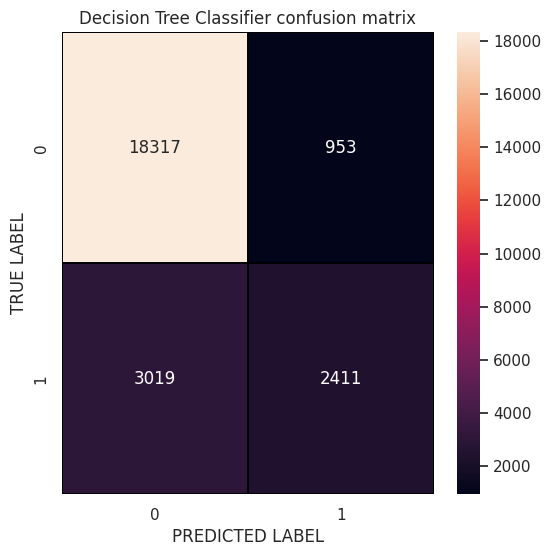

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_dt = confusion_matrix(y_test, y_pred)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
# Tạo mô hình cây quyết định với độ sâu tối đa đã đặt
clf = DecisionTreeClassifier(max_depth=7, class_weight = {0: 1, 1: 2})
# Huấn luyện mô hình trên tập huấn luyện
clf.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác với độ sâu 8: {accuracy* 100:.2f}%")
# Generate a classification report (includes precision, recall, F1-score, and support)
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report:\n', classification_rep)

Độ chính xác với độ sâu 8: 81.96%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     19270
           1       0.58      0.63      0.61      5430

    accuracy                           0.82     24700
   macro avg       0.74      0.75      0.75     24700
weighted avg       0.83      0.82      0.82     24700



In [ ]:
# Tạo scorer dựa trên F1 score
f1_scorer = make_scorer(f1_score)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring=f1_scorer)  # Sử dụng 5-fold cross-validation

# In độ chính xác trung bình và độ chính xác trên từng fold
print("Mean Accuracy:", scores.mean())
print("Accuracy on Each Fold:", scores)

Mean Accuracy: 0.6068845760770266
Accuracy on Each Fold: [0.60885894 0.60198895 0.60667502 0.61577384 0.60112613]


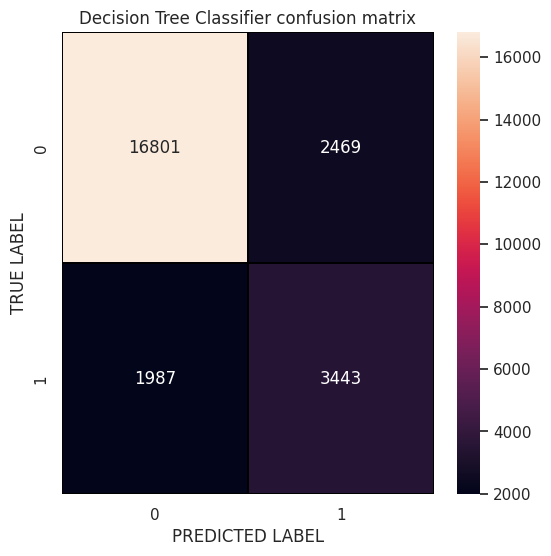

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_dt = confusion_matrix(y_test, y_pred)
x_axis_labels = ["0", "1"]
y_axis_labels = ["0", "1"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
df_predict = df_predict.drop('RainTomorrow', axis = 1)
predictions = clf.predict(df_predict)
df_predict['RainTomorrow'] = predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



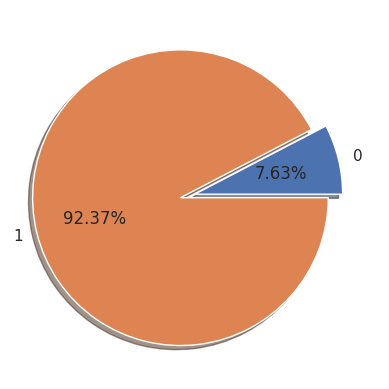

In [ ]:
sizes = [df_predict.RainTomorrow[df_predict['RainTomorrow'] == 0].count(), df_predict.RainTomorrow[df_predict['RainTomorrow'] == 1].count()]
labels = ['0', '1']
plt.pie(sizes, labels=labels, explode=(0, 0.1), shadow=True, autopct='%.2f%%')
plt.show()

In [ ]:
final_df = pd.concat([df_train, df_predict], axis = 0)
print(final_df.shape)
print(final_df.isnull().sum())

(125749, 11)
Location        0
Rainfall        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
RainToday       0
RainTomorrow    0
dtype: int64


In [ ]:
final_df.RainTomorrow.value_counts()

0    96234
1    29515
Name: RainTomorrow, dtype: int64

# **MODELING**

In [ ]:
#chia tập dữ liệu
X_new = final_df.drop('RainTomorrow', axis = 1)
y_new = final_df['RainTomorrow']

#chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled_new = scaler.fit_transform(X_new)

#split train -test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, y_new, test_size=0.2, random_state = 42)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
def evaluate(model, X_test=X_test,y_test=y_test, y_pred=y_pred):
    # Classification Report
    print("TEST RESULTS:\n")
    print('-'*53)
    #Report
    print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))
    res = cross_val_score(clf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
    #Độ chính xác trung bình
    print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
    #Độ lệch chuẩn
    print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
    print('\n')

     # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    print('\n')


## **XGBoost**

***Baseline***

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_new, y_train_new)
y_pred_xgb = xgb.predict(X_test_new)
y_pred_xgb

array([1, 1, 0, ..., 0, 0, 0])

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     19341
           1       0.73      0.53      0.62      5809

    accuracy                           0.85     25150
   macro avg       0.80      0.74      0.76     25150
weighted avg       0.84      0.85      0.84     25150


Average Accuracy:	0.8087

Standard Deviation:	0.0054



Confusion Matrix
-----------------------------------------------------




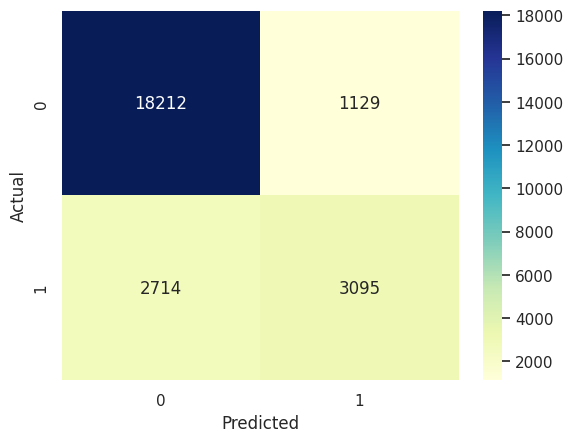

In [ ]:
evaluate(xgb, X_test=X_test_new, y_test=y_test_new, y_pred=y_pred_xgb)

In [ ]:
Accuracy={}
Accuracy_XGBoostClassifier=round((accuracy_score(y_test_new,y_pred_xgb)*100),2)
print("Accuracy_XGBoostClassifier : ",Accuracy_XGBoostClassifier,"%")
Accuracy["XGBoostClassifier"]=Accuracy_XGBoostClassifier

Accuracy_XGBoostClassifier :  84.72 %


**Hyperparameter Tuning**

## **Gradient Boosting**

**Baseline**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(random_state=42)
gdb.fit(X_train_new, y_train_new)
y_pred_gdb = gdb.predict(X_test_new)
y_pred_gdb

array([1, 1, 0, ..., 0, 0, 0])

TEST RESULTS:

-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     19341
           1       0.74      0.48      0.58      5809

    accuracy                           0.84     25150
   macro avg       0.80      0.72      0.74     25150
weighted avg       0.83      0.84      0.83     25150


Average Accuracy:	0.8086

Standard Deviation:	0.0053



Confusion Matrix
-----------------------------------------------------




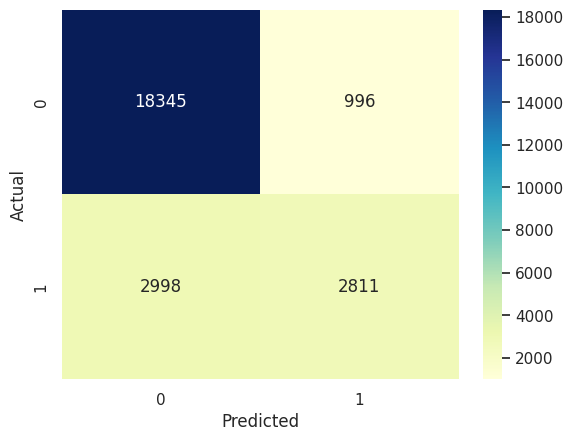

In [ ]:
evaluate(gdb, X_test=X_test_new, y_test=y_test_new, y_pred=y_pred_gdb)

In [ ]:
Accuracy_GradientBoostingClassifier=round((accuracy_score(y_test_new,y_pred_gdb)*100),2)
print("Accuracy_GradientBoostingClassifier : ",Accuracy_GradientBoostingClassifier,"%")
Accuracy["GradientBoostingClassifier"]=Accuracy_GradientBoostingClassifier

Accuracy_GradientBoostingClassifier :  84.12 %


**Hyperparameter Tuning**

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV

# # Khởi tạo mô hình Gradient Boosting
# gdb = GradientBoostingClassifier(random_state=42)

# # Các tham số cần tinh chỉnh
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1.0]
# }


In [ ]:
# # Tạo một GridSearchCV để tìm kiếm siêu tham số tốt nhất
# grid_search = GridSearchCV(estimator=gdb, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_new, y_train_new)

# # In ra các tham số tốt nhất và điểm số đạt được trên tập kiểm tra
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [ ]:
# # Sử dụng mô hình với các tham số tốt nhất để dự đoán trên tập kiểm tra
# best_gdb = grid_search.best_estimator_
# y_pred_gdb = best_gdb.predict(X_test_new)

In [ ]:
# # Đánh giá mô hình
# evaluate(best_gdb, X_test=X_test_new, y_test=y_test_new, y_pred=y_pred_gdb)

In [ ]:
# # Tính toán độ chính xác
# accuracy_gdb = round((accuracy_score(y_test_new, y_pred_gdb) * 100), 2)
# print("Accuracy_GradientBoostingClassifier:", accuracy_gdb, "%")
# Accuracy["GradientBoostingClassifier"] = accuracy_gdb

# **MODEL COMPARISONS**

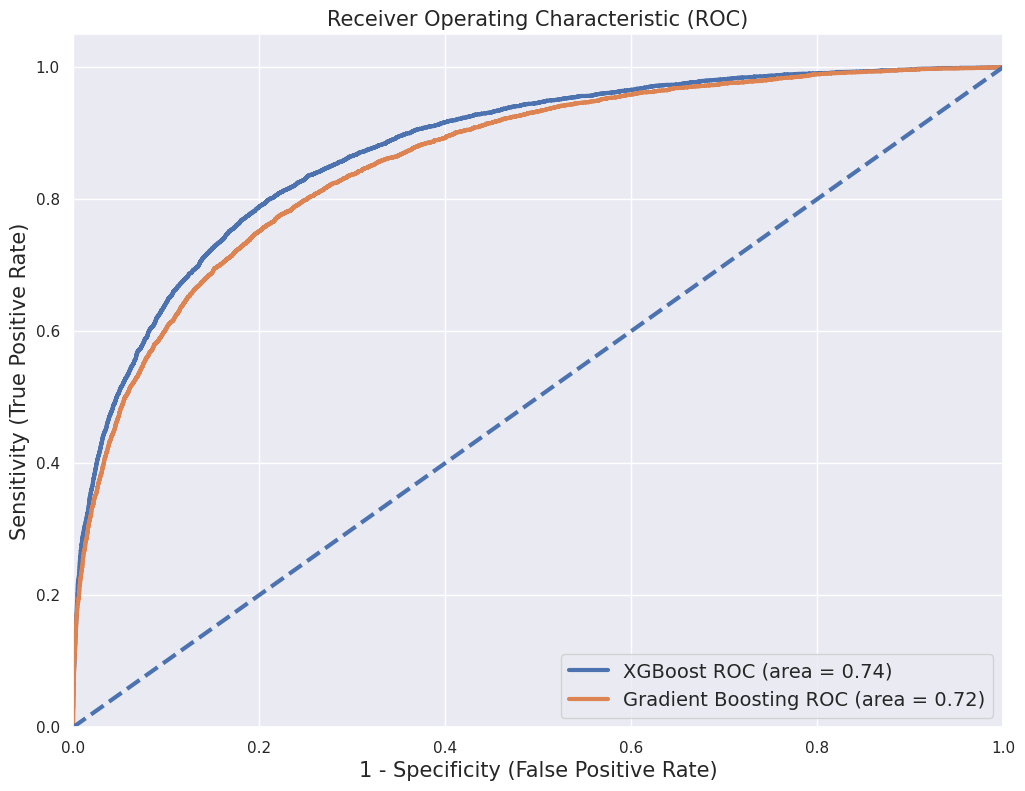

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier

plt.figure(figsize=(12, 9))

models = [
    {
        'label': 'XGBoost',
        'model': XGBClassifier(),
    },
    {
        'label': 'Gradient Boosting',
        'model': gdb,
    }
]

for m in models:
    model = m['model']
    model.fit(X_train_new, y_train_new)
    y_pred = model.predict(X_test_new)
    fpr, tpr, thresholds = roc_curve(y_test_new, model.predict_proba(X_test_new)[:, 1])
    auc = roc_auc_score(y_test_new, model.predict(X_test_new))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
plt.show()